# **Natural Language Processing**

0. Intro
1. Bag-of-Words
2. Topic Modeling
3. Word Embedding
4. RNNs with Attention
5. Preprocessing
6. Transformer
7. Tokenization
8. Byte-Pair Encoding
9. 

# **0. Intro**

## **0.1 NLP란?**

NLP(Natural Language Processing)란 자연어를 컴퓨터와 같은 기계를 이용해서 묘사하도록 연구하는 인공지능 분야입니다. 이는 다시 NLU(Natural Language Understanding)과 NLG(Natural Language Generation)으로 나뉩니다. 

NLU는 문장이나 문단이 주어졌을 때, 이를 이해하고 질의응답이 가능하도록 만드는 분야입니다. NLG는 자동 번역 등 자연스럽게 말이 이어지도록 생성하는 과정입니다. 현재 NLU는 어느 정도 연구가 진행되었다고 여겨지고 NLG에 대한 연구가 더 활발하게 이루어지고 있습니다. 

## **0.2 NLP Applications**

NLP를 사용하는 분야는 많이 있습니다. 이를 하나씩 살펴보겠습니다. 

### **1) Text Classification**

Spam detection, sentiment analysis 등 받은 자연어들로 분류하는 분야입니다. 스팸 메일을 분류하거나 평점을 가지고 긍부정을 나누는 등에 사용됩니다. 

![text_classification](_image/text_classification.PNG)

### **2) QA**

QA(Question Answering)는 말 그대로 질문과 context(위키 등 웹페이지들)가 input으로 주어졌을 때, output으로 답을 내보내는 것입니다. 대표적으로 search engine 등이 있습니다. 밑에서 구글을 보면 질문에 대해 위키에 답을 진하게 표현한 것을 볼 수 있습니다.

![QA](_image/QA.PNG)

이때 답을 찾는 방법은 크게 세 가지가 있습니다.

1. Context 내에서 뽑아냄(위 이미지가 그 예시)
2. 직접 문장을 생성하여 출력
3. 객관식(Multi-Choice)를 사용하여 출력

2번 같은 경우는 context가 주어지지 않고 질문만 주어지는 common sense reasoning입니다.

### **3) Macine Translation**

Machine Translation은 기존 언어(source language)를 번역할 언어(target language)로 바꿔주는 것입니다. 현재 연구, 실무 분야에서 가장 활발하게 진행되고 있습니다. 파파고, 구글 번역 등이 그 예시입니다.

1. pair 사용(같은 의미, 다른 언어의 쌍)
2. unsupervised learning(pair가 없이 학습)

학습 방법은 위에 두 가지 방법이 있습니다. pair는 직관적이지만 하나하나 학습 데이터를 만들기 어렵고 데이터가 너무 커집니다. 그래서 최근 비지도 학습을 이용한 학습이 새로운 방법으로 나오고 있습니다. 

### **4) Chatbot**

Chatbot은 자연어가 input으로 주어졌을 때, 대화가 이어지도록 output이 이어서 주어지는 프로그램입니다. 대화가 계속 이어지기 때문에 맥락을 잘 보는 것이 필요합니다. 그렇기에 직전 한 문장만 input으로 받지 않고 어느 정도 문단을 같이 가져옵니다. input을 template와 generation 중 어떤 것으로 받을지 선택할 수 있습니다. 

### **5) Personal Assistant**

Personal Assistant는 빅스비, 시리와 같이 특정 요청을 수행하는 것들을 말합니다. 아직은 노래 요청, 날씨 등 제한적인 사용만 가능하지만 점차 개발되어지고 있습니다. 음성으로 작동하기 때문에 특정 음성(하이 빅스비, 시리야 등)을 들어야 음성 모드로 들어가게 만들어서 여러 소음에 작동하지 않도록 하고 있습니다.

### **6) Text Summarization**

Text Summarization은 말그대로 글들을 요약해주는 것입니다. 예를 들어 뉴스가 있다면 제목과 내용을 보고 요약해주는 것을 말합니다. 

![text_summarization](_image/text_summarization.PNG)

요약하는 방식은 extractive와 generative로 나뉩니다. extractive는 주어진 내용들을 통해 요약을 해주는 반면 generative는 본문에 없는 말로도 요약할 수 있습니다. 

## **0.3 NLP 연구 필드**

NLP 분야는 ACL, EMNLP, NAACL 등 유력한 컨퍼런스들이 있습니다. (AI는 급변하는 분야이기에 저널을 잘 보지 않습니다.) 이를 더욱 세분화하여 분야를 나눌 수 있습니다.

#### **Low-level parsing**
- Tokenization, stemming(과거형이나 미래형을 기본형으로 바꾸는 것)

#### **Word and pharse level**
- Named entity recognition(NER), part-of-speech(POS) tagging, noun-phrase chunking, dependency parsing, coreference resolution $\Rightarrow$ (언어학자가 만든 체계가 컴퓨터에게는 도움이 되지 않음이 확인되면서 연구가 사그라듬)
- Semantic relation extraction

#### **Sentence level**
- Sentiment analysis, machine translation

#### **Multi-sentence and paragraph level**
- Entailment prediction, question answering, dialog systems, summarization

그 외에도 text mining, information retrieval 등이 있습니다.(PDF 참고)

# **1. Bag-of-Words**

## **1.1 Word Embedding**

Word embedding이란 단어들을 embedding이란 과정을 거쳐 컴퓨터가 이해할 수 있는 숫자로 바꾸는 과정을 말합니다. 이러면 단어들은 벡터가 되는데 이 벡터를 embedding vector라고 합니다.

|구분|Bag-of_Words|언어 모델|분포 가정|
|:---:|:---:|:---:|:---:|
|내용|어떤 단어가 많이 쓰였는가|단어가 어떤 순서로 쓰였는가|어떤 단어가 같이 쓰였는가|
|대표 통계량|TF-IDF|-|PMI|
|대표 모델|Deep Averaging Network|ELMO, GPT|Word2Vec|

단어를 임베딩하여 나오는 벡터들은 어떤 가정을 따르냐에 따라서 위와 같이 구분됩니다. 이를 더 자세히 살펴보면 다음과 같습니다.

### **1) 백 오브 워즈 가정**

백 오브 워즈는 저자의 의도가 단어 사용 여부나 그 빈도에서 드러난다고 보는 과정입니다. 그렇기에 단어의 순서는 고려대상이 아닙니다. 순서에 상관없이 하나의 가방에 단어들을 모두 넣고 빈도수를 확인하는 것입니다. 이때 대표적으로 TF-IDF가 사용됩니다. 

#### **TF-IDF(Term Frequency-Inverse Document Frequency)**
어떤 단어의 주제 예측 능력이 강할수록 가중치가 커지고 반대의 경우 작아집니다. w는 단어, N은 문서의 개수, TF(Term Frequency)는 단락에서의 빈도, DF(Document Frequency)는 문서에서의 빈도입니다. 

$$TF - IDF(w) = TF(w) \times log(\frac{N}{DF(w)})$$

그렇기에 문서 전체에서 빈도가 높은 조사들은 가중치가 줄어들고 특정 문장에서 빈번하게 나오는 단어들은 가중치가 증가합니다. 이에 대해 뒤에서 더 자세히 알아보겠습니다.


#### **Deep Averaging Network(lyyer et al. 2015)**
문장에 속한 단어의 임베딩의 평균을 구해 문장의 임베딩을 만드는 방법입니다.

### **2) 언어 모델**

단어의 등장 순서를 학습해 주어진 단어 시퀀스가 얼마나 자연스러운지 확률을 부여하는 방법입니다. 백 오브 워즈와 달리 등장 순서에 영향을 받기에 '나는 밥을 먹었다'와 '나는 먹었다 밥을'을 다른 문장으로 해석합니다. 

$$P(w_i) \Rightarrow P(w_i|w_{i-1}, w_{i-2}, \cdots, w_0)$$

### **3) 분포 가정**

단어의 의미를 주변 문맥을 통해 유추하는 방법입니다. 가까운 단어들을 통해 의미를 유추합니다.

#### **PMI(Pointwise Mutual Information)**
두 단어 A, B가 얼마나 자주 같이 등장하는지 정보를 수치화하여 유추합니다.

$$ PMI(A, B) = log \frac{P(A, B)}{P(A) \times P(B)}$$

#### **Word2Vec**
특정 단어 주변의 문맥, 즉 분포 정보를 함축하며 벡터로 만들어 사용하는 방법입니다.

## **1.2 Bag-of-Words Representation**

BoW는 문법과 어순은 무시하지만 다중성을 유지하면서 단어의 가방에 단어들을 집어넣습니다. 그리고 이를 고유한 단어의 vocabulary를 만들거나 각 단어들을 one-hot vector로 만들어 사용하게 됩니다. 

## **1.3 Naïve Bayes Classifier**

Naïve Bayes Classifier은 Bayes' theorem을 이용하여 간단한 분류를 하는 classifier입니다. 

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)} \; (\text{Bayes'\, theorem})$$

이제 이를 이용해 Naïve Bayes Classifier을 유추해보겠습니다. 각 document d는 class c를 가지고 있습니다. P(c|d)가 d가 c에 속할 확률입니다. Bayes' theorem을 적용하면 아래와 같은 식이 나옵니다.

$$P(c|d) = \frac{P(d|c)P(c)}{P(d)}$$

근데 여기서 분모는 항상 같기 때문에 분모를 제거해도 괜찮습니다. 그렇기에 아래와 같은 식이 나옵니다.

$$P(c|d) = P(d|c)P(c)$$

$d$는 $words w_1, w_2, \cdots, w_n$로 이루어져 있습니다. 그렇기에 위의 식은 다시 쓰면 다음과 같습니다.

$$P(d|c)P(c) = P(w_1, w_2, \cdots, w_n|c)P(c)$$

이때 우리가 관심이 있는 것은 $P(c|d) = P(c|w_1, w_2, \cdots, w_n)$이다. 이제 여기에 chain rule까지 적용하면 다음과 같이 나옵니다. 이때 확률에 관한 chain rule은 다음과 같습니다.

$$\begin{aligned} P(X_4, X_3, X_2, X_1) &= P(X_4|X_3, X_2, x_1) \cdot P(X_3, X_2, X_1) \\
&= P(X_4|X_3, X_2, X_1) \cdot P(X_3|X_2, X_1) \cdot P(X_2, X_1) \\
&= P(X_4|X_3, X_2, X_1) \cdot P(X_3|X_2, X_1) \cdot P(X_2|X_1) \cdot P(X_1) \end{aligned}$$

$$P(c|d) = P(d|c)P(c) = P(c) \prod_{w_i \in W} P(w_i|c)$$

예시를 통해 알아보겠습니다. 밑에처럼 주어진 document와 word, class가 있습니다.

||No.|Document($d$)|Class($c$)|
|:---:|:---:|:---:|:---:|
|Training|1|me free lottery|Spam|
||2|free get free you|Spam|
||3|you free scholarship|Inbox|
||4|free to contact me|Inbox|
||5|you won award|Inbox|
||6|you ticket loterry|Spam|
|<span style="color:skyblue">Test</span>|<span style="color:skyblue">7</span>|<span style="color:skyblue">you free loterry</span>|<span style="color:skyblue">?</span>|

위와 같이 샘플이 주어져 있고 7번의 문장이 spam인지 아닌지 확인해야 합니다. 우리가 구한 식을 이용하여 식을 세워보겠습니다.

$$P(c_{spam}|d_7) = P(c_{spam})P(w_{you}|c_{spam})P(w_{free}|c_{spam})P(w_{lottery}|c_{spam})$$
$$P(c_{Inbox}|d_7) = P(c_{Inbox})P(w_{you}|c_{Inbox})P(w_{free}|c_{Inbox})P(w_{lottery}|c_{Inbox})$$

만약 $P(c_{spam}|d_7) > P(c_{inbox}|d_7)$이면 스팸이고 $P(c_{spam}|d_7) < P(c_{inbox}|d_7)$이면 inbox로 분류될 것이다. 각 단어의 개수와 클래스 개수를 통해 결과를 보면 다음과 같습니다. 

![spam_result](_image/spam_result.PNG)

이제 결과를 통해 종합적으로 계산하면 다음과 같습니다.

$$P(c_{spam}|d_7) 
= P(c_{spam})P(w_{you}|c_{spam})P(w_{free}|c_{spam})P(w_{lottery}|c_{spam})
= \frac{1}{2} \times \frac{2}{10} \times \frac{3}{10} \times \frac{2}{10} = \frac{6}{1000}$$
$$P(c_{Inbox}|d_7) 
= P(c_{Inbox})P(w_{you}|c_{Inbox})P(w_{free}|c_{Inbox})P(w_{lottery}|c_{Inbox})
= \frac{1}{2} \times \frac{2}{10} \times \frac{2}{10} \times \frac{0}{10} = 0$$

그러므로 7번 문장은 spam입니다.

||No.|Document($d$)|Class($c$)|
|:---:|:---:|:---:|:---:|
|Training|1|me free lottery|Spam|
||2|free get free you|Spam|
||3|you free scholarship|Inbox|
||4|free to contact me|Inbox|
||5|you won award|Inbox|
||6|you ticket loterry|Spam|
|<span style="color:skyblue">Test</span>|<span style="color:skyblue">7</span>|<span style="color:skyblue">you free loterry</span>|<span style="color:red">Spam</span>|

## **실습1. Naïve Bayes Classifier**

### **1) Requirements**

먼저 필요한 라이브러리들을 불러옵니다.

In [25]:
from tqdm import tqdm
from collections import defaultdict
import math

# POS(Part of Speech) tagger
from konlpy import tag

Train data와 test data를 준비하겠습니다.

In [26]:
data = {}

# training data. input text와 정답 label (긍정(1), 부정(0))으로 구성
data['train'] = [{'text': "정말 재미있습니다. 추천합니다."},
                {'text': "기대했던 것보단 별로였네요."},
                {'text': "지루해서 다시 보고 싶다는 생각이 안 드네요."},
                {'text': "완전 최고입니다 ! 다시 보고 싶습니다."},
                {'text': "연기도 연출도 다 만족스러웠습니다."},
                {'text': "연기가 좀 별로였습니다."},
                {'text': "연출도 좋았고 배우분들 연기도 최고입니다."},
                {'text': "기념일에 방문했는데 연기도 연출도 다 좋았습니다."},
                {'text': "전반적으로 지루했습니다. 저는 별로였네요."},
                {'text': "CG에 조금 더 신경 썼으면 좋겠습니다."}
                ]
# test data
data['test'] = [{'text': "최고입니다. 또 보고 싶네요."},
                {'text': "별로였습니다. 되도록 보지 마세요."},
                {'text': "다른 분들께 추천드릴 수 있을 만큼 연출도 연기도 만족했습니다."},
                {'text': "연기가 좀 더 개선되었으면 좋겠습니다."}
                ]

train_labels = [1, 0, 0, 1, 1, 0, 1, 1, 0, 0]
test_labels = [1, 0, 1, 0]

### **2) Data Preprocessing**

KoNLPy에서 제공하는 [꼬꼬마(Kkma) 형태소 분석기](https://konlpy.org/en/v0.5.2/api/konlpy.tag/#module-konlpy.tag._kkma)를 이용하여 tokenize 합니다.

In [27]:
# 형태소 분석기 선언
morph_analyzer = tag.Kkma()

In [28]:
# tokenization 함수 정의
def tokenization(data, morph_analyzer):
    """tokenization 

    Args:
        data (list): list of data examples.
        morph_analyzer (konlpy.tag._kkma.Kkma): morphological analyzer.

    Returns:
        tokenized_data (list): list of tokenized data examples.
    """
    tokenized_data = []
    
    for example in tqdm(data):
        tokens = morph_analyzer.morphs(example['text'])
        tokenized_data.append(tokens)
    
    return tokenized_data

In [29]:
# tokenization 함수를 이용한 데이터 tokenization
tokenized_data = {}

tokenized_data['train'] = tokenization(data['train'], morph_analyzer)
tokenized_data['test'] = tokenization(data['test'], morph_analyzer)

100%|██████████| 4/4 [00:00<00:00, 15.00it/s]


In [30]:
# tokenized_data 확인
tokenized_data['train']

[['정말', '재미있', '습니다', '.', '추천', '하', 'ㅂ니다', '.'],
 ['기대', '하', '었', '더', 'ㄴ', '것', '보다', 'ㄴ', '별', '로', '이', '었', '네요', '.'],
 ['지루', '하', '어서', '다시', '보', '고', '싶', '다는', '생각', '이', '안', '들', '네요', '.'],
 ['완전', '최고', '이', 'ㅂ니다', '!', '다시', '보', '고', '싶', '습니다', '.'],
 ['연기', '도', '연출', '도', '다', '만족', '스럽', '었', '습니다', '.'],
 ['연기', '가', '좀', '별', '로', '이', '었', '습니다', '.'],
 ['연출', '도', '좋', '았', '고', '배우', '분', '들', '연기', '도', '최고', '이', 'ㅂ니다', '.'],
 ['기념일',
  '에',
  '방문',
  '하',
  '었',
  '는데',
  '연기',
  '도',
  '연출',
  '도',
  '다',
  '좋',
  '았',
  '습니다',
  '.'],
 ['전반적',
  '으로',
  '지루',
  '하',
  '었',
  '습니다',
  '.',
  '저',
  '는',
  '별',
  '로',
  '이',
  '었',
  '네요',
  '.'],
 ['CG', '에', '조금', '더', '신경', '쓰', '었', '으면', '좋', '겠', '습니다', '.']]

이제 tokenization 결과를 이용해서 word to index dictionary를 생성합니다.

In [31]:
# train data의 tokenization 결과에서 unique token만 남긴 set으로 변환
tokens = [token for i in range(len(tokenized_data['train'])) for token in tokenized_data['train'][i]]
unique_train_tokens = set(tokens)

# Naïve Bayes Classifier의 input에 들어갈 word의 index를 반환해주는 dictionary를 생성
word2index = defaultdict() # key: word, value: index of word
idx = 0
for token in tqdm(unique_train_tokens):
    word2index[token] = idx
    idx += 1

100%|██████████| 56/56 [00:00<00:00, 55964.03it/s]


### **3) Model Training**

이제 Naïve Bayes Classifier 모델 클래스를 구현하겠습니다.

In [48]:
class NaiveBayesClassifier():
    def __init__(self, word2index, k=0.1):
        """
        Args:
            word2index (dict): mapping a word to a pre-assigned index.
            k (float, optional): constant for smoothing. Defaults to 0.1.
        """
        self.k = k # for smoothing
        self.word2index = word2index
        self.priors = {} # Prior probability for each class, P(c)
        self.likelihoods = {} # Likelihood for each token, P(d|c)
    
    def _set_priors(self, labels):
        """
        Set prior probability for each class, P(c).
        Count the number of each class and caculate P(c) for each class.
        """
        # Count the number of each class
        class_counts = defaultdict(int)
        for label in tqdm(labels):
            class_counts[label] += 1
        
        # For each class, calcuate P(c)
        for label, count in class_counts.items():
            self.priors[label] = class_counts[label] / len(labels)
    
    def _set_likelihoods(self, tokens, labels):
        """
        Set likelihood for each token, P(d|c).
        First, count the number of each class for each token.
        Then, calculate P(d|c) for a given class and token.
        """
        token_dists = {}
        number_of_token_for_class = defaultdict(int)
        
        # Count the number of each class for each token
        for i, label in enumerate(tqdm(labels)):
            count = 0
            for token in tokens[i]:
                # 'token in self.word2index'부분은 안 들어가도 되지 않는가?
                if token not in token_dists and token in self.word2index:
                    token_dists[token] = {0:0, 1:0}
                token_dists[token][label] += 1
                count += 1
            number_of_token_for_class[label] += count

        for token, dist in tqdm(token_dists.items()):
            if token not in self.likelihoods:
                self.likelihoods[token] = {
                    0: (token_dists[token][0] + self.k) / (number_of_token_for_class[0] + len(self.word2index) * self.k),
                    1: (token_dists[token][1] + self.k) / (number_of_token_for_class[1] + len(self.word2index) * self.k),
                }
    
    def train(self, input_tokens, labels):
        """
        Args:
            input_tokens (list): list of tokenized train data.
            labels (): train labels for each sentence/document.
        """
        self._set_priors(labels)
        self._set_likelihoods(input_tokens, labels)
    
    def inference(self, input_tokens):
        """
        Args:
            input_tokens (list): list of tokenized test data.
        """
        log_prob_0 = 0.0
        log_prob_1 = 0.0
        
        for token in input_tokens:
            if token in self.likelihoods:
                log_prob_0 += math.log(self.likelihoods[token][0])
                log_prob_1 += math.log(self.likelihoods[token][1])
        
        log_prob_0 += math.log(self.priors[0])
        log_prob_1 += math.log(self.priors[1])
        
        if log_prob_0 >= log_prob_1:
            return 0
        else:
            return 1

주어진 학습 데이터에 대해 문장 분류 모델을 학습시키겠습니다.

In [49]:
# 문장 분류 모델 선언 및 학습
classifier = NaiveBayesClassifier(word2index)
classifier.train(tokenized_data['train'], train_labels)

100%|██████████| 56/56 [00:00<00:00, 56258.93it/s]


### **4) Evaluation**

각각의 test 데이터에 대해 정답값을 예측하고 Accuracy를 구합니다.

In [50]:
# Test data inference
preds = []
for test_tokens in tqdm(tokenized_data['test']):
    pred = classifier.inference(test_tokens)
    preds.append(pred)

100%|██████████| 4/4 [00:00<00:00, 4164.11it/s]


In [51]:
# Accuracy 측정
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, preds))

1.0


# **2. Topic Modeling**

## **2.1 Bag-of-Words Encoding of Text Documents**

저번 챕터에서 본 Bag-of-Words를 다시 보겠습니다. "John likes movies. Mary likes too."와 "John also likes football."이란 두 문장이 주어졌을 때 각각 bag-of-words vector는 다음과 같습니다.

![4-2-1](_image/4-2-1.PNG)

각 단어를 사전으로 만들고 나타난 빈도수를 저장합니다. 그렇기에 행렬은 (키워드 개수) x (document 개수)의 형태로 나타납니다. 이 행렬을 term-document matrix(TDM)이라고 합니다. 순서 정보는 무시되는 단점이 있지만 많이 사용되고 있습니다.

## **2.2 Topic Modeling**

우선 topic은 가상의 document의 백 오브 워즈 벡터입니다. 그리고 백 오브 워즈 벡터의 값들을 정규화하면 합이 1이 되는 확률분포로 나타낼 수 있습니다. 그렇기에 토픽은 키워드들의 확률분포이자 키워드들의 가중치 조합이라고 할 수 있습니다. 

![4-2-2](_image/4-2-2.PNG)

위 그림을 보면 맨 윗줄은 topic이고 밑에 있는 단어들은 그 topic에 속한 단어들입니다. topic의 제목은 프로그램이 자동으로 정해지며 군집에 속한 단어의 개수가 많으면 topic과 관련된 document라고 추측할 수 있습니다. 그리고 이를 바탕으로 document도 topic에 대해 군집을 만들 수 있습니다. 

밑의 그림은 topic modeling의 전반적 동작을 표현한 것입니다.

<img src = "https://iq.opengenus.org/content/images/2020/01/1_taTOiaCpd_CzGugx_PticQ.png">

## **2.3 Topic Modeling Algorithm**

이제 동작하는 과정들을 상세히 보겠습니다.

먼저 input document들을 bag-of-words vector들로 만듭니다. 이를 열벡터로 합쳐서 단어의 개수 x 문서의 개수 크기의 행렬 $A$를 만듭니다. 그리고 주어진 topic의 개수만큼 열벡터를 임의로 만듭니다. 이를 단어의 개수 x 토픽의 개수 크기의 행렬 $W$라고 하겠습니다. 이제 A를 잘 표현하도록 W에 곱할 행렬 H를 찾습니다. $H$는 토픽의 개수 x 문서의 개수 크기의 행렬일 것입니다. 이를 통해 H를 찾았다면 이제 H를 고정하고 W를 학습합니다. 이를 반복하며 최적의 W와 H를 찾는 것입니다. 이를 통해 행렬 W는 행렬 A가 가진 패턴들 중 빈도가 높은 패턴들로 학습되고 그 패턴들을 topic으로 가져가게 됩니다. 

이때 loss는 프로베니우스 놈으로 구합니다. 

$$\lVert x \rVert_F = (x_1^F + x_2^F + \cdots + x_n^F)^{\frac{1}{f}}$$

벡터의 크기를 구할 때 자주 봤던 식입니다. 이를 통해 각 문서별 loss를 구하고 이것이 최소화되도록 H 안에 각 요소들을 바꿔줍니다. 이때 우리는 대체로 F = 2인 2놈을 자주 사용합니다. 이를 식으로 나타내면 다음과 같습니다. 이때 n은 단어의 개수입니다.

$$\underset{W, H \geq 0}{arg \; min} \lVert A - WH \rVert_2 = (A_1^2 - (W_1 H_1)^2 + \cdots + A_n^2 - (W_nH_n)^2)^{\frac{1}{2}}$$

이제 구해진 topic을 가지고 document를 분류합니다. 여러 topic들의 선형 결합으로 가장 잘 표현할 수 있는 document의 가중치를 찾고 가중치가 가장 높은 topic으로 분류합니다.

밑의 그림은 이를 간단하게 표현한 것입니다.

<img src = "https://iq.opengenus.org/content/images/2020/01/1_2uj6t3gNv76SpHrWf5-z-A.jpeg">

## 실습1. 크롤링한 뉴스 데이터로 Topic Modeling하기

이번 실습은 직접 크롤링한 뉴스 데이터에 대해서 topic modeling을 해보겠습니다. 

간단하게 전 과정을 살펴보면 먼저 네이버에서 뉴스 기사를 간단하게 크롤링합니다.  
기본적인 전처리 이후, Term-Document Matrix를 만들고 이를 non-negative factorization을 이용해 행렬 분해 하여 topic modeling을 수행합니다.   

그 후, t-distributed stochastic neighbor embedding(T-SNE) 기법을 통해 topic별 시각화를 진행합니다.

### **1) Crawiling News**

In [1]:
# 크롤링에 필요한 패키지 불러오기
from bs4 import BeautifulSoup
from newspaper import article
from time import sleep, time
from dateutil.relativedelta import relativedelta
from datetime import datetime
from multiprocessing import Pool
import json
import requests
import re
import sys

이번 실습은 정적 페이지인 네이버 뉴스 신문 기사 웹페이지를 크롤링합니다. 정적 페이지와 HTML에 대해선 [자](https://ko.wikipedia.org/wiki/%EC%A0%95%EC%A0%81_%EC%9B%B9_%ED%8E%98%EC%9D%B4%EC%A7%80)[료](https://opentutorials.org/course/2039)들을 참고해주세요.

In [2]:
def crawl_news(query: str=None, crawl_num: int=1000, workers: int=4):
    """crawl_news 뉴스 기사 텍스트가 담긴 list를 반환합니다.

    Args:
        query (str, optional): 검색어. Defaults to None.
        crawl_num (int, optional): 수집할 뉴스 기사의 개수. Defaults to 1000.
        workers (int, optional): multi-processing 시, 사용할 thread의 개수. Defaults to 4.
    """
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'
    articleList = []
    crawled_url = set()
    keyboard_interrupt = False
    t = time()
    idx = 0
    page = 1
    
    # 서버에 url 요청 결과를 선언
    res = requests.get(url.format(query))
    sleep(0.5)
    # res를 parsing할 parser를 선언
    bs = BeautifulSoup(res.text, 'html.parser')
    
    with Pool(workers) as p:
        while idx < crawl_num:
            table = bs.find('ul', {'class': 'list_news'})
            li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
            area_list = [li.find('div', {'class':'news_area'}) for li in li_list]
            a_list = [area.find('a', {'class':'news_tit'}) for area in area_list]
            
            for n in a_list[:min(len(a_list), crawl_num - idx)]:
                articleList.append(n.get('title'))
                idx += 1
            page += 1
            
            pages = bs.find('div', {'class':'sc_page_inner'})
            next_page_url = [p for p in pages.find_all('a') if p.text == str(page)][0].get('href')
            
            req = requests.get('https://search.naver.com/search.naver' + next_page_url)
            bs = BeautifulSoup(req.text, 'html.parser')
    return articleList

In [14]:
query = '구글'
articleList = crawl_news(query)

In [15]:
articleList[:10]

["공정위 새해도 '플랫폼 갑질' 겨눈다…구글·카카오·쿠팡 사정권",
 '[신간] 구글은 어떻게 디자인하는가',
 "구글, 인터넷뉴스서비스사업자 등록할까…여야 '법안 추진' 논의",
 '비트코인도 뚫는 ‘무한대 성능’… 구글 “2029년 상업용 출시”',
 "구글·카카오 등 플랫폼기업 '갑질' 칼빼든다",
 '[CES 2022] MS·구글·아마존·메타도 안 나온다… 韓 독무대 된 세계 최대 IT쇼',
 '거친 운전에 차멀미가...구글 완전 자율주행차 타보니 [김성민의 실밸 레이더]',
 "구글, UDC 스마트폰 특허 출원.. 차기 '픽셀7' 탑재될까?",
 '구글 트렌드로 본 경제 키워드…‘블루 이코노미’에 주목하라',
 "'적중률 70%' 미라클레터 올해도 10대기술 예측…구글 AR안경·테슬라 로봇"]

### **2) Preprocessing**

이제 tagger를 이용해 한글 명사와 알파벳만 추출해서 tdm을 만들겠습니다.

In [16]:
from konlpy.tag import Okt
from collections import Counter
import json

# Okt 형태소 분석기 선언
t = Okt()

words_list_ = []
vocab = Counter()
tag_set = set(['Noun', 'Alpha'])
stopwords = set(['글자'])

for i, article in enumerate(articleList):
    if i % 100 == 0:
        print(i)
    
    # tagger를 이용한 품사 태깅
    words = t.pos(article, norm=True, stem=True)
    
    # 명사와 알파벳 tag를 가지며 철자 길이가 2이상이고 stopwords에 포함되지 않는 단어들로 리스트 생성
    words = [w for w, t in words if t in tag_set and len(w) > 1 and w not in stopwords]
    
    vocab.update(words)
    words_list_.append((words, article))
    
vocab = sorted([w for w, freq in vocab.most_common(10000)])
word2id = {w: i for i, w in enumerate(vocab)}
words_list = []
for words, article in words_list_:
    words = [w for w in words if w in word2id]
    if len(words) > 10:
        words_list.append((words, article))

del words_list_

0
100
200
300
400
500
600
700
800
900


### **3) Build document-term matrix**

이제 document-term matrix를 만들어보겠습니다. 문서 개수 x 단어 개수의 형태를 가집니다. 

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

dtm = np.zeros((len(words_list), len(vocab)), dtype=np.float32)
for i, (words, article) in enumerate(words_list):
    for word in words:
        dtm[i, word2id[word]] += 1

dtm = TfidfTransformer().fit_transform(dtm)

### **4) Topic Modeling**

이제 document-term matrix를 non-negative factorization(NMF)을 이용해 행렬 분해를 해보겠습니다. 

이때 NMF는 주어진 행렬 non-negative matrix X를 non-negative matrix W와 H로 행렬 분해하는 알고리즘입니다. 이어지는 코드를 통해 W와 H의 의미에 대해 파악하겠습니다. 

참고: [Non-negative Matrix Factorization](https://angeloyeo.github.io/2020/10/15/NMF.html)

In [18]:
# Non-negative Matrix Factorization
from sklearn.decomposition import NMF

K = 5
nmf = NMF(n_components=K, alpha=0.1)

sklearn의 NMF를 이용해 W와 H matrix를 구했습니다. 

W는 document length x K, H는 K x term length의 차원을 갖고 있습니다.  
W 하나의 row는 각각의 feature에 얼만큼의 가중치를 줄 지에 대한 weight입니다.  
H 하나의 row는 하나의 feature를 나타냅니다.  

In [19]:
W = nmf.fit_transform(dtm)
H = nmf.components_

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


우선 하나의 Topic(H의 n번째 row)에 접근해서 해당 topic에 대해 값이 가장 높은 20개의 단어를 출력해보겠습니다.

In [20]:
for k in range(K):
    print(f"{k}th topic")
    for index in H[k].argsort()[::-1][:20]:
        print(vocab[index], end=' ')
    print()

0th topic
결제 인앱 강제 금지법 정책 꼼수 애플 시간 겉도 제출 추가 요구 자료 허용 계획 이행 연내 구글 방통위 방지법 
1th topic
사전 레볼루션 사이트 넷마블 실시 공식 나이 세븐 등록 신작 대작 구글 게임 급등 최소 NFT 론칭 내년 오리진 이상 
2th topic
삼성 미국 전자 픽셀 모뎀 기관 조사 탑재 처음 마이크로소프트 부회장 영진 확인 동맹 이재용 아마존 시장 구글 사운드 공개 
3th topic
애플 규제 경쟁 위원장 저승사자 EU 규칙 촉구 플랫폼 시행 구글 공룡 방지 강화 엄격 적용 테크 넷플릭스 방통위 시급 
4th topic
검색 도전 시장 아마존 클라우드 비즈 확대 과감 위해 글로벌 투자 vs 전쟁 점화 사용자 국내 네이버 테크 구글 메타 


이번에는 W에서 하나의 topic (W의 n번째 column)에 접근해서 해당 topic에 대해 값이 가장 높은 3개의 뉴스 기사 제목을 출력해보겠습니다.

In [21]:
for k in range(K):
    print(f"==={k}th topic===")
    for index in W[:, k].argsort()[::-1][:3]:
        print(words_list[index][1])
    print()

===0th topic===
겉도는 인앱결제 강제금지법… 구글은 결제정책 꼼수, 애플은 시간끌기
겉도는 인앱결제 강제금지법… 구글은 결제정책 꼼수, 애플은 시간끌기
구글은 결제정책 꼼수, 애플은 모르쇠… 힘못쓰는 갑질방지법 [인앱결제강제 금지법 시행 100일]

===1th topic===
넷마블, 기대신작 세븐나이츠 레볼루션...'구글·공식 사이트 사전등록 실시'
넷마블, 기대신작 '세븐나이츠 레볼루션' 구글/공식 사이트 사전등록 실시
넷마블, 기대작 세븐나이츠 레볼루션 구글·공식 사이트 사전등록 실시

===2th topic===
이재용 삼성전자 부회장, 미국에서 '뉴삼성' 동맹 확인..마이크로소프트·아마존·구글 경영진 잇따라 만나
이재용 삼성전자 부회장, 미국에서 '뉴삼성' 동맹 확인..마이크로소프트·아마존·구글 경영진 잇따라 만나
조사기관 “구글 픽셀6에 삼성전자 5G모뎀 탑재, 미국시장에서 처음"

===3th topic===
'구글‧애플 저승사자' EU경쟁위원장, 빅테크 규제 위한 규칙 시행 촉구
'구글‧애플 저승사자' EU경쟁위원장, 빅테크 규제 위한 규칙 시행 촉구
구글·애플·넷플릭스 ‘플랫폼 공룡’ 갑질 방지 강화… 방통위, 규제 엄격 적용

===4th topic===
구글 vs 네이버… 빅테크 ‘검색전쟁’ 재점화 국내시장 1위에 ‘사용자 친화 검색’으로 도전장
구글 vs 네이버… 빅테크 ‘검색전쟁’ 재점화 국내시장 1위에 ‘사용자 친화 검색’으로 도전장
[글로벌 비즈] 구글 클라우드, 시장 확대 위해 과감한 투자…아마존에 도전장



2번째 topic에 대해 가장 높은 가중치를 갖는 제목 5개를 출력하면 다음과 같습니다.

In [22]:
for index in W[:, 2].argsort()[::-1][:5]:
    print(words_list[index][1])

이재용 삼성전자 부회장, 미국에서 '뉴삼성' 동맹 확인..마이크로소프트·아마존·구글 경영진 잇따라 만나
이재용 삼성전자 부회장, 미국에서 '뉴삼성' 동맹 확인..마이크로소프트·아마존·구글 경영진 잇따라 만나
조사기관 “구글 픽셀6에 삼성전자 5G모뎀 탑재, 미국시장에서 처음"
조사기관 “구글 픽셀6에 삼성전자 5G모뎀 탑재, 미국시장에서 처음"
[더벨][뉴삼성 차세대 리더십]소프트웨어 경쟁력 높인다…구글·MS출신 발탁승진


### **5) Visualization**

이제 t-SNE를 이용해 topic별 시각화를 진행하겠습니다. 

t-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터를 데이터간 구조적 특징을 유지한 상태로 저차원(2~3차원) 벡터로 축소하는 방법 중 하나입니다. 주로 고차원 데이터의 시각화를 위해 사용됩니다.

참고: [lovit: t-SNE](https://lovit.github.io/nlp/representation/2018/09/28/tsne/#:~:text=t%2DSNE%20%EB%8A%94%20%EA%B3%A0%EC%B0%A8%EC%9B%90%EC%9D%98,%EC%9D%98%20%EC%A7%80%EB%8F%84%EB%A1%9C%20%ED%91%9C%ED%98%84%ED%95%A9%EB%8B%88%EB%8B%A4.)

참고: [ratsgo: t-SNE](https://ratsgo.github.io/machine%20learning/2017/04/28/tSNE/)

In [23]:
from sklearn.manifold import TSNE

# n_components = 차원 수
tsne = TSNE(n_components=2, init='pca', verbose=1)

# W matrix에 대해 t-sne를 수행합니다.
W2d = tsne.fit_transform(W)

# 각 뉴스 기사 제목마다 가중치가 가장 높은 topic을 저장합니다.
topicIndex = [v.argmax() for v in W]

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 63 nearest neighbors...
[t-SNE] Indexed 64 samples in 0.000s...
[t-SNE] Computed neighbors for 64 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 64 / 64
[t-SNE] Mean sigma: 0.107609
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.561291
[t-SNE] KL divergence after 1000 iterations: -0.062155


In [24]:
from bokeh.models import HoverTool
from bokeh.palettes import Category20
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
output_notebook()

# 사용할 툴들
tools_to_show = 'hover, box_zoom, pan, save, reset, wheel_zoom'
p = figure(plot_width=720, plot_height=580, tools=tools_to_show)

source = ColumnDataSource(data={
    'x': W2d[:, 0],
    'y': W2d[:, 1],
    'id': [i for i in range(W.shape[0])],
    'document': [article for words, article in words_list],
    'topic': [str(i) for i in topicIndex],  # 토픽 번호
    'color': [Category20[K][i] for i in topicIndex]
})
p.circle(
    'x', 'y',
    source=source,
    legend='topic',
    color='color'
)

# interaction
p.legend.location = "top_left"
hover = p.select({'type': HoverTool})
hover.tooltips = [("Topic", "@topic"), ('id', '@id'), ("Article", "@document")]
hover.mode = 'mouse'

show(p)

Loading BokehJS ...

# **3. Word Embedding**

Word Embedding은 단어가 가지는 고유한 벡터를 가지고 의미가 유사하면 유사도가 높도록(내적값이 커지도록) 의미가 작아지면 유사도가 작아지도록(내적값이 작아지도록) 해주는 것입니다.

## **3.1 Word2Vec**

Word2Vec에는 CBOW와 Skip-Grad 두 가지 방식이 있습니다. CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법입니다. 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다. 매커니즘 자체는 거의 비슷합니다. 우선 CBOW에 대해서 알아보겠습니다. 이해를 위해 매우 간소화된 형태의 CBOW로 설명합니다.

**예문: "The fat cat sat on the mat"**

### **1) CBOW**

예를 들어 코퍼스에 위와 같은 문장이 있습니다. {"The", "fat", "cat", "on", "the", "mat"}으로부터 "sat"을 예측하는 것이 CBOW가 할 일입니다. 이 때 예측하는 단어 sat을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 주변 단어(context word)라고 합니다.

중심 단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지 결정했다면 이 범위를 윈도우(window)라고 합니다. 예를 들어 윈도우 크기가 2이고 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat과 cat, 그리고 뒤의 두 단어인 on, the를 참고합니다. 윈도우의 크기가 n이라고 한다면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n이 됩니다.

<img src = "https://wikidocs.net/images/page/22660/%EB%8B%A8%EC%96%B4.PNG">

윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window)라고 합니다. 

위 그림에서 좌측의 중심 단어와 주변 단어의 변화는 윈도우 크기가 2일 때, 슬라이딩 윈도우가 어떤 식으로 이루어지면서 데이터 셋을 만드는지 보여줍니다. 또한 Word2Vec에서 입력은 원-핫 벡터가 되어야 하는데, 우측 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라서 각각 어떤 원-핫 벡터가 되는지를 보여줍니다. 밑의 그림은 결국 CBOW를 위한 전체 데이터 셋을 보여주는 것입니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_1.PNG">

CBOW의 인공 신경망을 간단히 도식화하면 위와 같습니다. 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 필요합니다. 

또한 위 그림에서 알 수 있는 사실은, Word2Vec은 딥 러닝 모델(Deep Learning Model)은 아니라는 점입니다. 보통 딥 러닝이라함은, 입력층과 출력층 사이의 은닉층의 개수가 충분히 쌓인 신경망을 학습할 때를 말하는데 Word2Vec는 입력층과 출력층 사이에 하나의 은닉층만이 존재합니다. 이렇게 은닉층이 1개인 경우에는 일반적으로 심층신경망(Deep Neural Network)이 아니라 얕은신경망(Shallow Neural Network)이라고 부릅니다. 또한 Word2Vec의 은닉층은 일반적인 은닉층과 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 일반적인 은닉층과 구분하기 위해 투사층(projection layer)이라고 부르기도 합니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_2.PNG">

CBOW의 인공신경망을 더 확대하여 알아보겠습니다. 이 그림에서 투사층의 크기가 M이라는 것과 입력층과 투사층 사이의 가중치 W는 V x M이고 투사층과 출력층 사이 가중치 W'의 크기는 M x V임을 주목해야 합니다.

먼저 CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이 됩니다. 다시 말해, 위 그림에서 투사층의 크기는 M = 5이기 때문에 CBOW를 수행하고 나서 얻는 각 단어의 임베딩 벡터의 차원은 5입니다.

두번째로 V는 단어 집합의 크기를 의미합니다. 즉, 위의 그림처럼 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 x 5 행렬이고, W'는 5 x 7 행렬이 될 것입니다. 이때 W와 W'는 동일한 행렬을 전치한 것이 아니라 서로 다른 행렬입니다. 인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 대게 굉장히 작은 랜덤 값을 가지게 됩니다. CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해서 W와 W'를 학습해가는 구조입니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG">

입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W 행렬의 곱이 어떻게 이루어지는지 보겠습니다. 위 그림에서 각 주변 단어의 원-핫 벡터를 $x$로 표기했습니다. 입력 데이터는 원-핫 벡터입니다. 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것(lookup)과 같기에 이 작업을 룩업 테이블(lookup table)이라고 합니다. 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원 크기를 갖는 임베딩 벡터들입니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_4.PNG">

이렇게 각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이들의 평균인 벡터를 구합니다. CBOW는 투사층에서 벡터의 평균을 구하지만 뒤에서 볼 Skip-Gram은 입력이 중심 단어 하나이기에 투사층에서 벡터의 평균을 구하지 않습니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_5.PNG">

이제 투사층에서 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해집니다. 곱셈의 결과는 원-핫 벡터들과 동일한 차원을 가진 벡터로 나옵니다. 

이 벡터에서 CBOW는 소프트맥스 함수를 사용합니다. 출력된 벡터의 총 합은 1이고 이렇게 나온 벡터를 스코어 벡터(score vector)라고 합니다. 스코어 벡터는 각 인덱스번째 단어가 중심 단어일 확률을 나타냅니다. 그리고 스코어 벡터가 우리가 가진 답의 원-핫 벡터와 가까워져야 합니다. 

스코어 벡터를 $\hat{y}$, 중심 단어를 $y$라고 했을 때, CBOW의 손실 함수로 cross-entropy 함수를 사용합니다.

$$H(\hat{y}, y) = -\sum_{j=1}^{\lvert V \rvert} y_j log(\hat{y}_j)$$

cross-entropy 함수에 실제 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 넣고, 이를 식으로 표현하면 위와 같습니다. 

$$H(\hat{y}, y) = -y_i log(\hat{y_i})$$

그런데 y가 원-핫 벡터임을 고려하면, 식을 위와 같이 간소화할 수 있습니다. c를 중심 단어에서 1을 가진 차원의 값의 인덱스라고 한다면 $\hat{y}_c = 1$는 $\hat{y}$가 $y$를 정확하게 예측한 경우가 됩니다. 이를 식에 대입하면 $-1log(1) = 0$이기에 결과적으로 정확히 예측한 경우의 cross-entropy 값은 0이 됩니다. 따라서 위 식을 최소화하는 방향으로 학습해야 하며 loss function으로 사용해도 됩니다.

이제 역전파를 수행하면 W와 W'가 학습되는데, 학습이 다 되었다면 M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지 결정하면 됩니다. 떄로는 W와 W'의 평균치를 가지고 임베딩 벡터를 선택하기도 합니다.

Word2Vec의 알고리즘을 다시 요약해보면 다음과 같습니다.

![4-3-1](_image/4-3-1.PNG)

### **2) Skip-Gram**

Skip-gram은 CBOW를 이해했다면, 매커니즘 자체는 동일하기 때문에 쉽게 이해할 수 있습니다. 앞서 CBOW에선 주변 단어를 통해 중심 단어를 예측했다면, skip-gram은 중심 단어에서 주변 단어를 예측하겠습니다.

<img src = "https://wikidocs.net/images/page/22660/word2vec_renew_6.PNG">

앞서 언급한 동일한 예문에 대해서 인공 신경망을 도식화해보면 위와 같습니다. 이제 중심 단어에 대해서 주변 단어를 예측하기 때문에, 투사층에서 벡터들의 평균을 구하는 과정은 없습니다. 

여러 논문에서 성능 비교를 진행했을 때, 전반적으로 skip-gram이 CBOW보다 성능이 좋다고 알려져 있습니다.

### **3) Negative Sampling**

대체적으로 Word2Vec를 사용한다고 하면 SGNS(Skip-Gram with Negative Sampling)을 사용합니다. 이는 skip-gram 방법에, 네거티브 샘플링이란 방법까지 추가로 사용하는 것입니다. 그렇기에 skip-gram을 전제로 네거티브 샘플링에 대해서 알아보겠습니다.

위에서 배운 Word2Vec 모델은 속도가 문제입니다. 마지막 단계를 봅시다. 출력층에 있는 소프트맥스 함수는 단어 집합 크기의 벡터 내의 모든 값을 0과 1 사이의 값이면서 모두 더하면 1이 되도록 바꾸는 작업을 수행합니다. 그리고 이에 대한 오차를 구하고 모든 단어에 대한 임베딩을 조정합니다. 그 단어가 중심 단어나 주변 단어와 전혀 상관없는 단어라도 마찬가지입니다. 그런데 만약 단어 집합의 크기가 수백만에 달한다면 이 작업은 굉장히 무거워집니다.

여기서 핵심은 모든 단어 집합에 대해서 소프트맥스 함수를 수행하고, 역전파를 수행하므로 주변 단어와 상관 없는 모든 단어까지 워드 임베딩 조정 작업을 수행한다는 것입니다. 만약 '강아지'와 '고양이'와 같은 단어에 집중한다면 '돈가스'나 '컴퓨터'와 같은 연관 관계가 없는 수많은 단어의 임베딩을 조정할 필요가 없습니다. 

그렇다면 전체 단어 집합이 아니라 일부 단어 집합에 대해서만 고려할 수는 없을까요? '강아지', '고양이' 같은 주변 단어들로 일부 단어 집합을 만듭니다. 그리고 여기에 '돈가스', '컴퓨터', '회의실' 같은 무작위로 선택된 주변 단어가 아닌 상관없는 단어들을 일부만 갖고옵니다. 이렇게 전체 단어 집합보다 훨씬 작은 단어 집합을 만들어놓고 마지막 단께를 이진 분류 문제로 바꿔버립니다. 즉, Word2Vec은 주변 단어들을 긍정(positive)으로 두고 무작위로 샘플링 된 단어들을 부정(negative)으로 둔 다음에 이진 분류 문제를 수행합니다. 

이는 기존의 다중 클래스 분류 문제를 이진 분류 문제로 바꾸면서도 연산량에 있어서 훨씬 효율적입니다. 

### **4) Word2Vec Property**

![4-3-2](_image/4-3-2.PNG)
링크: https://ronxin.github.io/wevi/

위 그림은 Word2Vec이 동작하는 것을 보여주는 페이지에 결과입니다. apple과 juice는 관계가 있기에 apple input vector와 juice output vector의 값이 모두 양수가 되는 것을 확인할 수 있습니다. 반대로 rice input vector와 juice output vector는 음수가 많이 나오는 것을 확인할 수 있습니다. 

또한 이렇게 구해진 embedding vector들은 유사한 관계를 가진 벡터쌍끼리 비슷한 관계를 가집니다. 예를 들어 (대한민국, 서울)과 (일본, 도쿄)는 (나라, 수도)의 관계를 가지고 있습니다. 그렇기에 대한민국 - 서울 = 일본 - 도쿄의 식이 성립됩니다. 그 외에도 여러 유사 관계를 밑의 그림에서 확인할 수 있습니다.

![4-3-3](_image/4-3-3.PNG)

이외에도 거의 대부분의 NLP분야에서 사용됩니다.

참고 자료: https://shuuki4.wordpress.com/2016/01/27/word2vec-%EA%B4%80%EB%A0%A8-%EC%9D%B4%EB%A1%A0-%EC%A0%95%EB%A6%AC/  
참고 자료: https://simonezz.tistory.com/35

## **3.2 GloVe**

LSA(Latent Semantic Analysis)는 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론입니다. 반면, Word2Vec는 실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습하는 예측 기반의 방법론입니다. 

LSA는 카운트 기반이기에 전체적인 통계 정보를 고려하기는 하지만, '왕:남자 = 여왕:?'과 같은 단어 의미의 유추 작업(Analogy task)에는 성능이 떨어집니다. Word2Vec는 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못합니다. GloVe는 이러한 기존 방법론들의 각각의 한계를 지적하며 LSA의 매커니즘이었던 카운트 기반의 방법과 Word2Vec의 매커니즘이었던 예측 기반의 방법론을 두 가지 모두 사용합니다. 

### **1) Introduction**

먼저 GloVe에 대해 간단하게 살펴보겠습니다. GloVe는 위에서 이야기했듯 Word2Vec에 카운터 기반의 방법을 합친 것입니다. 그렇기에 단어들의 쌍들이 나오는 개수를 먼저 count하여 행렬로 만듭니다. 그리고 $W_1 \cdot W_2$가 구한 행렬과 같아지도록 학습시키는 것입니다. 이때 the 등의 관사는 빈도수가 너무 높기에 이를 억제하기 위해 log항을 추가합니다. 또한 빈도수에 따라 가중치를 주지만 이 역시 너무 커지지 않도록 f라는 함수를 사용합니다. 임베딩 벡터로는 Word2Vec과 마찬가지로 $W_1$을 사용하거나 두 개의 평균을 임베딩 벡터로 사용합니다. 

밑의 그림은 loss function(bias = 0)과 f함수를 보여줍니다.

![4-3-4](_image/4-3-4.PNG)

이제 구체적으로 GloVe의 동작을 살펴보겠습니다.

### **2) Windoe based Co-occurrence Matrix**

먼저 단어 쌍의 빈도수의 정보를 가지는 윈도우 기반 동시 등장 행렬에 대해 보겠습니다.

단어의 동시 등장 행렬은 행과 열을 전체 단어 집합의 단어들을 구성하고, i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬을 말합니다. 예제를 보겠습니다.

Ex)  
I like deep learning  
I like NLP  
I enjoy flying  

윈도우 크기가 N일 때는 좌, 우에 존재하는 N개의 단어만 참고하게 됩니다. 윈도우 크기가 1일 때, 위 텍스트를 가지고 동시 등장 행렬은 다음과 같습니다.

|카운트|I|like|enjoy|deep|learning|NLP|flying|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|I|0|2|1|0|0|0|0|
|like|2|0|0|1|0|1|0|
|enjoy|1|0|0|0|0|0|1|
|deep|0|1|0|0|1|0|0|
|learning|0|0|0|1|0|0|0|
|NLP|0|1|0|0|0|0|0|
|flying|0|0|1|0|0|0|0|

위 행렬은 행렬을 전치(Transpose)해도 동일한 행렬이 된다는 특징이 있습니다. 그 이유는 i 단어의 윈도우 크기 내에서 k 단어가 등장한 빈도는 반대로 k 단어의 윈도우 크기 내에서 i 단어가 등장한 빈도와 동일하기 때문입니다. 

참고 자료: http://web.stanford.edu/class/cs224n/slides/cs224n-2019-lecture02-wordvecs2.pdf

### **3) Co-occurrence Probability**

이제 동시 등장 확률에 대해서 알아보겠습니다. 아래의 표는 어떤 동시 등장 행렬을 가지고 정리한 동시 등장 확률(Co-occurrence Probability)을 보여줍니다. 여기서 이야기하는 동시 등장 확률 $P(k|i)$는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률입니다. 

$P(k|i)$에서 i를 중심 단어(Center word), k를 주변 단어(Context word)라고 했을 때, 위에서 배운 동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모로 하고 i행 k열의 값을 분자로 한 값이라고 볼 수 있겠습니다. 다음은 GloVe의 제안 논문에서 가져온 동시 등장 확률을 표로 정리한 하나의 예입니다.

|동시 등장 확률과 크기 관계 비(ratio)|k=solid|k=gas|k=water|k=fasion|
|:---:|:---:|:---:|:---:|:---:|
|$P(k \vert ice)$|0.00019|0.000066|0.003|0.000017|
|$P(k \vert steam)$|0.000022|0.00078|0.0022|0.000018|
|$\frac{P(k \vert ice)}{P(k \vert steam)}$|8.9|0.085|1.36|0.96|

위의 표를 통해 알 수 있는 사실은 solid가 등장했을 때, ice가 등장할 확률은 0.00019은 solid가 등장했을 때 steam이 등장할 확률인 0.000022보다 약 8.9배 크다는 사실입니다. 그도 그럴 것이 solid는 '단단한'이라는 의미를 가졌으니까 '증기'라는 의미를 가지는 steam보다는 당연히 '얼음'이라는 의미를 가지는 ice라는 단어와 더 자주 등장할 겁니다.

수식적으로 다시 정리하면 k가 solid일 때, $\frac{P(solid \vert ice)}{P(solid \vert steam)}$를 계산한 값은 8.9가 나옵니다. 이는 1보다 매우 큰 값입니다. 왜냐면 $P(solid \vert ice)$의 값은 크고, $P(solid \vert steam)$의 값은 작기 때문입니다.

그런데 k를 solid가 아니라 gas로 바꾸면 이야기는 완전히 달라집니다. gas는 ice보다는 steam과 더 자주 등장하므로, $\frac{P(gas \vert ice)}{P(gas \vert steam)}$를 계산한 값은 1보다 훨씬 작은 값인 0.085가 나옵니다. 반면, k가 water인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 많으므로 1에 가까운 값이 나오고, k가 fasion인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 적으므로 1에 가까운 값이 나옵니다. 보기 쉽도록 조금 단순화해서 표현한 표는 다음과 같습니다.

|동시 등장 확률과 크기 관계 비(ratio)|k=solid|k=gas|k=water|k=fasion|
|:---:|:---:|:---:|:---:|:---:|
|$P(k \vert ice)$|큰 값|작은 값|큰 값|작은 값|
|$P(k \vert steam)$|작은 값|큰 값|큰 값|작은 값|
|$\frac{P(k \vert ice)}{P(k \vert steam)}$|큰 값|작은 값|1에 가까움|1에 가까움|

### **4) Loss Function**

우선 손실 함수를 설명하기 전에 각 용어를 정리하겠습니다.

- $X$: 동시 등장 행렬(Co-occurrence Matrix)
- $X_{ij}$: 중심 단어 i가 등장했을 때, 윈도우 내 주변 단어 j가 등장하는 횟수
- $X_i$: $\sum_j X_{ij}$: 동시 등장 행렬에서 i행의 값을 모두 더한 값
- $P_{ik}$: $P(k \vert i) = \frac{X_{ik}}{X_i}$: 중심 단어 i가 등장했을 때, 윈도우 내 주변 단어 k가 등장할 확률  
    Ex) $P(solid \vert ice)$ = 단어 ice가 등장했을 때, 단어 solid가 등장할 확률
- $\frac{P_{ik}}{P_{jk}}$: $P_{ik}$를 $P_{jk}$로 나눠준 값  
    Ex) $\frac{P(solid \vert ice)}{P(solid \vert steam)}$ = 8.9
- $w_i$: 중심 단어 i의 임베딩 벡터
- $\bar{w_k}$: 주변 단어 k의 임베딩 벡터


GloVe의 아이디어를 한 줄로 요약하면 **'임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'** 입니다. 즉, 이를 만족하도록 임베딩 벡터를 만드는 것이 목표입니다. 이를 식으로 표현하면 다음과 같습니다.

$dot product(w_i, \bar{w_k}) \approx P(k \vert i) = P_{ik}$

뒤에서 보겠지만, 더 정확히는 GloVe는 아래와 같은 관계를 가지도록 임베딩 벡터를 설계합니다.

$dot product(w_i, \bar{w_k}) \approx log P(k \vert i) = log P_{ik}$

임베딩 벡터들을 만들기 위한 손실 함수를 처음부터 차근차근 설계해보겠습니다. 가장 중요한 것은 단어 간의 관계를 잘 표현하는 함수여야 한다는 것입니다. 이를 위해 앞서 배운 개념인 $P_{ik}/P_{jk}$를 식에 사용합니다. GloVe의 연구진들은 벡터 $w_i, w_j, \bar{w_k}$를 가지고 어떤 함수 $F$를 수행하면 $P_{ik}/P_{jk}$가 나온다는 초기 식으로부터 전개를 시작합니다.

$$F(w_i, w_j, \bar{w_k}) = \frac{P_{ik}}{P_{jk}}$$

아직 이 함수가 $F$가 어떤 식을 가지고 있는지는 정해진 것이 없습니다. 위의 목적에 맞게 근사할 수 있는 함수식은 무수히 많겠으나 최적의 식에 다가가기 위해서 단계별로 디테일을 추가하겠습니다. 함수 $F$는 두 단어 사이의 동시 등장 확률의 크기 관계 비(ratio) 정보를 벡터 공간에 인코딩하는 것이 목적입니다. 이를 위해 GloVe 연구진들은 $w_i$와 $w_j$라는 두 벡터의 차이를 함수 $F$의 입력으로 사용하는 것을 제안합니다.

$$F(w_i - w_j, \bar{w_k}) = \frac{P_{ik}}{P_{jk}}$$

그런데 우변은 스칼라값이고 좌변은 벡터값입니다. 이를 성립하기 위해서 함수 $F$의 두 입력에 내적(dot product)을 수행합니다.

$$F((w_i - w_j)^T \bar{w_k}) = \frac{P_{ik}}{P_{jk}}$$

정리하면, 선형 공간(Linear space)에서 단어의 의미 관계를 표현하기 위해 뺄셈과 내적을 택했습니다. 


여기서 함수 $F$가 만족해야 할 필수 조건이 있습니다. 중심 단어 $w$와 주변 단어 $\bar{w}$라는 선택 기준은 실제로는 무작위 선택이므로 이 둘의 관계는 자유롭게 교환될 수 있도록 해야합니다. 이것이 성립되게 하기 위해서 GloVe 연구진은 함수 $F$가 실수의 덧셈과 양수의 곱셈에 대해서 **준동형(Homomorphism)** 을 만족하도록 합니다. 이를 쉽게 정리하면 $a$와 $b$에 대해서 함수 $F$가 $F(a + b)$가 $F(a)F(b)$와 같도록 만족시켜야 한다는 의미입니다.

식으로 나타내면 다음과 같습니다.

$$F(a + b) = F(a)F(b), \forall a, b \in \mathbb{R}$$

이제 이 준동형식을 현재 전개하던 GloVe 식에 적용할 수 있도록 조금씩 바꿔보겠습니다. 전개하던 GloVe 식에 따르면, 함수 $F$는 결과값으로 스칼라 값($\frac{P_{ik}}{P_{jk}}$)이 나와야 합니다. 준동형식에서 $a$와 $b$가 각각 벡터값이라면 함수 $F$의 결과값으로는 스칼라 값이 나올 수 없지만, $a$와 $b$가 각각 사실 두 벡터의 내적값이라고 하면 결과값으로 스칼라 값이 나올 수 있습니다. 그러므로 위의 준동형식을 아래와 같이 바꿔보겠습니다. 여기서 $v_1, v_2, v_3, v_4$는 각각 벡터값입니다. 아래의 $V$는 벡터를 의미합니다.

$$F(v_1^T v_2 + v_3^T v_4) = F(v_1^T v_2)F(v_3^T v_4), \forall v_1, v_2, v_3, v_4 \in V$$

그런데 앞서 작성한 GloVe 식에서는 $w_i$와 $w_j$라는 두 벡터의 차이를 함수 $F$의 입력으로 받았습니다. GloVe식에 바로 적용을 위해 준동형식을 뺄셈에 대한 준동형식으로 변경합니다. 그러면 곱셈도 나눗셈으로 바뀌게 됩니다.

$$F(v_1^T v_2 - v_3^T v_4) = \frac{F(v_1^T v_2)}{F(v_3^T v_4)}, \forall v_1, v_2, v_3, v_4 \in V$$

이제 이 준동형식을 GloVe 식에 적용하겠습니다. 우선, 함수 $F$의 우변은 다음과 같이 바뀌어야 합니다.

$$F((w_i - w_j)^T \bar{w_k}) = \frac{F(w_i^T \bar{w_k})}{F(w_j^T \bar{w_k})}$$

그런데 이전의 식에 따르면 우변은 본래 $\frac{P_{ik}}{P_{jk}}$였으므로, 결과적으로 다음과 같습니다.

$$\frac{P_{ik}}{P_{jk}} = \frac{F(w_i^T \bar{w_k})}{F(w_j^T \bar{w_k})}$$

$$F(w_i^T \bar{w_k}) = P_{ik} = \frac{X_{ik}}{X_i}$$

좌변을 풀어쓰면 다음과 같습니다.

$$F(w_i^T \bar{w_k} - w_j^T \bar{w_k}) = \frac{F(w_i^T \bar{w_k})}{F(w_j^T \bar{w_k})}$$

이는 뺄셈에 대한 준동형식의 형태와 정확히 일치합니다. 이제 이를 만족하는 함수 $F$를 찾아야 합니다. 그리고 이를 정확하게 만족시키는 함수가 있는데 바로 지수 함수입니다. $F$를 지수 함수 **exp** 라고 해봅시다.

$$exp(w_i^T \bar{w_k} - w_j^T \bar{w_k}) = \frac{exp(w_i^T \bar{w_k})}{exp(w_j^T \bar{w_k})}$$

$$exo(w_i^T \bar{w_k}) = P_{ik} = \frac{X_{ik}}{X_i}$$

위의 두 번째 식으로부터 다음과 같은 식을 얻을 수 있습니다.

$$w_i^T \bar{w_k} = log P_{ik} = log(\frac{X_{ik}}{X_i}) = log X_{ik} - log X_i$$

그런데 여기서 상기해야할 것은 앞서 언급했듯이, 사실 $w_i$와 $\bar{w_k}$는 두 값의 위치를 서로 바꾸어도 식이 성립해야 합니다. $X_{ik}$의 정의를 생각해보면 $X_{ki}$와도 같습니다. 그런데 이게 성립되려면 위의 식에서 $log X_i$ 항이 걸림돌입니다. 이 부분만 없다면 이를 성립시킬 수 있습니다. 그래서 GloVe 연구팀은 이 $log X_i$항을 $w_i$에 대한 편향 $b_i$라는 상수항으로 대체하기로 합니다. 같은 이유로 $\bar{w_k}$에 대한 편향 $\bar{b_k}$를 추가합니다.

$$w_i^T \bar{w_k} + b_i + \bar{b_k} = log X_{ik}$$

이 식이 손실 함수의 핵심이 되는 식입니다. 우변의 값과 차이를 최소화하는 방향으로 좌변의 4개의 항이 학습을 통해 바뀌게 됩니다. 즉, 손실 함수는 다음과 같이 일반화될 수 있습니다.

$$Loss \; function = \sum_{m, n = 1}^V (w_m^T \bar{w_n} + b_m + \bar{b_n} - log X_{mn})^2$$

여기서 $V$는 단어 집합의 크기를 의미합니다. 그런데 아직 최적의 손실 함수라기에는 부족합니다. GloVe 연구진은 $log X_{ik}$에서 $X_{ik}$값이 0이 될 수 있음을 지적합니다. 대안 중 하나는 $log X_{ik}$항을 $log (1 + X_{ik})$로 변경하는 것입니다. 하지만 이렇게 해도 여전히 해결되지 않는 문제가 있습니다.

바로 동시 등장 행렬 $X$는 마치 DTM처럼 희소 행렬일 가능성이 다분하다는 점입니다. 동시 등장 행렬 $X$에는 많은 값이 0이거나, 동시 등장 빈도가 적어서 많은 값이 작은 수치를 가지는 경우가 많습니다. 앞서 빈도수를 가지고 가중치를 주는 고민을 하는 TF-ID나 LSA와 같은 몇 가지 방법들을 본 적이 있습니다. GloVe의 연구진은 동시 등장 행렬에서 동시 등장 빈도의 값 $X_{ik}$이 굉장히 낮은 경우에는 정보에 거의 도움이 되지 않는다고 판단합니다. 그래서 이에 대한 가중치를 주는 고민을 하게 되는데 GloVe 연구팀이 선택한 것은 바로 $X_{ik}$의 값에 영향을 받는 가중치 함수 $f(X_{ik})$를 손실 함수에 도입하는 것입니다. 

GloVe에 도입되는 $f(X_{ik})$의 그래프를 그려보겠습니다.

<img src = "https://wikidocs.net/images/page/22885/%EA%B0%80%EC%A4%91%EC%B9%98.PNG">

$X_{ik}$의 값이 작으면 상대적으로 함수의 값은 작도록 하고, 값이 크면 함수의 값은 상대적으로 크도록 합니다. 하지만 $X_{ik}$가 지나치게 높다고해서 지나친 가중치를 주지 않기 위해 함수의 최대값은 정해져 있습니다. (최대값은 1) 예를 들어 'It is'와 같은 불용어의 동시 등장 빈도수가 높다고해서 지나친 가중을 받아서는 안 됩니다. 이 함수의 값을 손실 함수에 곱해주면 가중치의 역할을 할 수 있습니다.

이 함수 $f(x)$의 식은 다음과 같이 정의됩니다. 

$$f(x) = min(1, (\frac{x}{x_{max}}^{\frac{3}{4}}))$$

최종적으로 다음과 같은 일반화 된 손실 함수를 얻어낼 수 있습니다.

$$Loss \; function = \sum_{m, n = 1}^V f(X_{mn})(w_m^T \bar{w_n} + b_m + \bar{b_n} - log X_{mn})^2$$

### **5) Pre-trained dataset**

[GloVe](https://nlp.stanford.edu/projects/glove/)에선 이미 학습된 임베딩 벡터를 제공합니다. 자료마다 뒤에 설명이 적혀있으니 참고하여 필요한 데이터를 사용하면 됩니다. 예를 들어 Wikipedia 2014 + Gigaword5에 대한 설명은 다음과 같습니다. 

- 6B tokens: 60억개의 토큰(중복 단어 허용)
- 400k vocab: 40만개의 고유 단어(40만개의 one-hot vector)
- uncased: 대소문자 구분 안 함
- 50d, 100d, 200d, & 300d vectors: 50, 100, 200, 300을 target dimension으로 학습된 임베딩 벡터가 있음을 표시

## **3.3 Doc2Vec**

Doc2Vec(Paragraph2Vec)는 기존 Word2Vec에 paragraph vector를 더해 확장한 문서 임베딩 모델입니다. 타켓 단어와 이전 단어 k개가 주어졌을 때, 이전 단어들과 해당 문서의 아이디로 타켓 단어를 예측합니다. 그리고 이 과정에서 문맥이 비슷한 문서 벡터와 단어 벡터가 유사하게 임베딩됩니다.

Doc2Vec은 다량의 코퍼스를 문서 임베딩 할 때 훌룡한 성능을 보여줍니다. Word2Vec이 CBOW와 Skip-Gram우로 나뉘었듯 Doc2Vec도 PV-DM(Distributed Memory version of Paragraph Vector)과 PV-DBOW(Distributed Bag of Words version of Paragraph Vector)로 나눠집니다. 아래와 같은 예시가 있을 때 동작하는 것을 살펴보겠습니다.

- sentence: the cat sat on the mat
- window size: k = 3
- [$\text{paragraph}_1$, the, cat, sat] - on
- [$\text{paragraph}_1$, cat, sat, on] - the
- [$\text{paragraph}_1$, sat, on, the] - mat

Doc2Vec은 paragraph에서 단어를 예측하며 로그 확률 평균을 최대화하는 과정에서 학습됩니다. $\text{paragraph}_{id}$가 학습의 입력 데이터로 들어가기에 문맥이나 단어가 paragraph 벡터에 녹아든다고 볼 수 있습니다. 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbOvRfL%2FbtqBzPhTjCD%2FNeKAov500OG05vrsvraZV0%2Fimg.png" width = "600px" height = "300px"> 

각 문서 paragraph는 별도의 (문서의 수 x d 차원) 크기의 행렬에 담깁니다. 학습이 완료된 후, 이 행렬을 이용하여 paragraph의 임베딩된 벡터를 사용합니다. 즉, paragraph의 정보돠 이전 단어들을 통해 다음 단어를 유추하는 것입니다. 이를 PV-DM이라고 합니다. 

반대로 하나의 $\text{paragraph}_{id}$로 해당 문서 내 단어들을 유추하는 것을 PV-DBOW라고 합니다. 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbx8qpy%2FbtqBzjXPOfy%2FNPzuVPVD1RGp4TxKtIXQoK%2Fimg.png">

이제 예시를 통해 살펴보겠습니다. 

![4-3-5](_image/4-3-5.PNG)

위 그림을 보면 input에 (study, female, 10s)가 들어가 있는 것을 볼 수 있습니다. 이는 단어인 'study'외에도 paragraph와 관련된 정보들이 추가로 들어가 있기 때문입니다. input을 통해 10대 여자가 썼다는 정보를 얻을 수 있습니다. 

![4-3-6](_image/4-3-6.PNG)

입력이 여러개이기에 연산 과정에서 데이터들이 각 가중치에 곱해지고 합해집니다. 이 과정을 통해 단어뿐만 아니라 추가적으로 들어오는 paragraph의 정보들도 함께 학습합니다. 위 상황은 (study, female, 10s)라는 input을 통해 (math)라는 output을 얻은 것입니다. 

반대도 가능합니다. 

![4-3-7](_image/4-3-7.PNG)

위 그림의 경우 단어만 주어지고 이를 통해 다음 단어뿐만 아니라 성별과 나이까지 유추합니다. 그렇기에 loss도 각각 따로 구하고 다른 가중치를 곱하여 합하는 것을 볼 수 있습니다. 소프트맥스를 할 때도 마찬가지로 (i, study, math), (male, female), (10s, 20s, 30s, 40s) 세 분류로 나누어 각각 소프트맥스해줍니다. 

![4-3-8](_image/4-3-8.PNG)

## **3.4 Other Applications of Word2Vec**

Word2Vec을 다른 방향으로 사용할 수도 있습니다. 예를 들어 밑의 그림을 보겠습니다. 

![4-3-9](_image/4-3-9.PNG)

(John, Jane, Michael)이란 사람이 input으로 주어지고 그들이 구매하거나 관심있는 (Galaxy, iPhone, Macbook, iPad)가 output으로 주어집니다. 이를 통해 그 사람이 관심있는 상품들을 묶어 학습시킬 수도 있습니다. 즉 $W_1$은 사용자에 대한 임베딩 벡터, $W_2$는 사용자가 구매한 상품에 대한 임베딩 벡터가 되는 것입니다.

또한 임베딩 벡터를 통하여 비슷한 제품군을 묶고 관련 상품으로 추천할 수도 있습니다.

![4-3-10](_image/4-3-10.PNG)

위 그림을 보면 비슷한 옷끼리 가까운 거리에 위치하는 것을 볼 수 있습니다.

## 실습1. Word2Vec 구현

In [1]:
from tqdm import tqdm
from konlpy.tag import Mecab, Twitter, Okt, Kkma
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

import torch
import copy
import numpy as np

### **1) 데이터 전처리**

먼저 데이터를 확인하고 Word2Vec 형식에 맞게 전처리합니다.

In [2]:
train_data = [
    "정말 맛있습니다. 추천합니다.",
    "기대했던 것보단 별로였네요.",
    "다 좋은데 가격이 너무 비싸서 다시 가고 싶다는 생각이 안 드네요.",
    "완전 최고입니다! 재방문 의사 있습니다.",
    "음식도 서비스도 다 만족스러웠습니다.",
    "위생 상태가 좀 별로였습니다. 좀 더 개선되기를 바랍니다.",
    "맛도 좋았고 직원분들 서비스도 너무 친절했습니다.",
    "기념일에 방문했는데 음식도 분위기도 서비스도 다 좋았습니다.",
    "전반적으로 음식이 너무 짰습니다. 저는 별로였네요.",
    "위생에 조금 더 신경 썼으면 좋겠습니다. 조금 불쾌했습니다."       
]

test_words = ["음식", "맛", "서비스", "위생", "가격"]

Tokenization과 vocab을 만드는 과정은 지난 챕터 실습들과 유사합니다.

In [3]:
tokenizer = Okt()

In [4]:
def make_tokenized(data):
    tokenized = []
    for sent in tqdm(data):
        tokens = tokenizer.morphs(sent, stem=True)
        tokenized.append(tokens)
    return tokenized

In [5]:
train_tokenized = make_tokenized(train_data)

100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


In [6]:
word_count = defaultdict(int)

for tokens in tqdm(train_tokenized):
    for token in tokens:
        word_count[token] += 1

100%|██████████| 10/10 [00:00<?, ?it/s]


In [7]:
word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print(list(word_count))

[('.', 14), ('도', 7), ('이다', 4), ('좋다', 4), ('별로', 3), ('다', 3), ('이', 3), ('너무', 3), ('음식', 3), ('서비스', 3), ('하다', 2), ('방문', 2), ('위생', 2), ('좀', 2), ('더', 2), ('에', 2), ('조금', 2), ('정말', 1), ('맛있다', 1), ('추천', 1), ('기대하다', 1), ('것', 1), ('보단', 1), ('가격', 1), ('비싸다', 1), ('다시', 1), ('가다', 1), ('싶다', 1), ('생각', 1), ('안', 1), ('드네', 1), ('요', 1), ('완전', 1), ('최고', 1), ('!', 1), ('재', 1), ('의사', 1), ('있다', 1), ('만족스럽다', 1), ('상태', 1), ('가', 1), ('개선', 1), ('되다', 1), ('기르다', 1), ('바라다', 1), ('맛', 1), ('직원', 1), ('분들', 1), ('친절하다', 1), ('기념일', 1), ('분위기', 1), ('전반', 1), ('적', 1), ('으로', 1), ('짜다', 1), ('저', 1), ('는', 1), ('신경', 1), ('써다', 1), ('불쾌하다', 1)]


In [8]:
w2i = {}
for pair in tqdm(word_count):
    if pair[0] not in w2i:
        w2i[pair[0]] = len(w2i)

i2w = {v:k for k, v in w2i.items()}

100%|██████████| 60/60 [00:00<?, ?it/s]


In [9]:
print(train_tokenized)
print(w2i)

[['정말', '맛있다', '.', '추천', '하다', '.'], ['기대하다', '것', '보단', '별로', '이다', '.'], ['다', '좋다', '가격', '이', '너무', '비싸다', '다시', '가다', '싶다', '생각', '이', '안', '드네', '요', '.'], ['완전', '최고', '이다', '!', '재', '방문', '의사', '있다', '.'], ['음식', '도', '서비스', '도', '다', '만족스럽다', '.'], ['위생', '상태', '가', '좀', '별로', '이다', '.', '좀', '더', '개선', '되다', '기르다', '바라다', '.'], ['맛', '도', '좋다', '직원', '분들', '서비스', '도', '너무', '친절하다', '.'], ['기념일', '에', '방문', '하다', '음식', '도', '분위기', '도', '서비스', '도', '다', '좋다', '.'], ['전반', '적', '으로', '음식', '이', '너무', '짜다', '.', '저', '는', '별로', '이다', '.'], ['위생', '에', '조금', '더', '신경', '써다', '좋다', '.', '조금', '불쾌하다', '.']]
{'.': 0, '도': 1, '이다': 2, '좋다': 3, '별로': 4, '다': 5, '이': 6, '너무': 7, '음식': 8, '서비스': 9, '하다': 10, '방문': 11, '위생': 12, '좀': 13, '더': 14, '에': 15, '조금': 16, '정말': 17, '맛있다': 18, '추천': 19, '기대하다': 20, '것': 21, '보단': 22, '가격': 23, '비싸다': 24, '다시': 25, '가다': 26, '싶다': 27, '생각': 28, '안': 29, '드네': 30, '요': 31, '완전': 32, '최고': 33, '!': 34, '재': 35, '의사': 36, '있다': 37, '만족스럽다': 38, '상태

### **2) Dataset 클래스 구현**

이제 Word2Vec을 학습시키는 대표적인 방법인 Skip-Gram과 CBOW로 구현하겠습니다. 간단하게 요약하자면 다음과 같은 특징을 가지고 있었습니다.

- CBOW는 주변단어를 이용해 주어진 단어를 예측하는 방법입니다.
- Skip-Gram은 중심 단어를 이용하여 주변 단어를 예측하는 방법입니다. 
- 즉, 두 방법은 input과 output을 어떻게 설정하는지에 대한 차이가 있습니다.

실제 모델에 들어가기 위한 input을 만들기 위해 Dataset 클래스를 먼저 정의합니다.

In [10]:
class CBOWDataset(Dataset):
    def __init__(self, train_tokenized, window_size=2):
        self.x = [] # input word
        self.y = [] # output word
        
        for tokens in tqdm(train_tokenized):
            token_ids = [w2i[token] for token in tokens]
            for i, id in enumerate(token_ids):
                if i - window_size >= 0 and i + window_size < len(token_ids):
                    self.x.append(token_ids[i - window_size:i] + token_ids[i + 1: i + window_size + 1])
                    self.y.append(id)
        self.x = torch.LongTensor(self.x) # (전체 데이터 개수, 2* window_size)
        self.y = torch.LongTensor(self.y) # (전체 데이터 개수)
    
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [11]:
class SkipGramDataset(Dataset):
    def __init__(self, train_tokenized, window_size=2):
        self.x = [] # input word
        self.y = [] # output word
        
        for tokens in tqdm(train_tokenized):
            token_ids = [w2i[token] for token in tokens]
            for i, id in enumerate(token_ids):
                if i - window_size >= 0 and i + window_size < len(token_ids):
                    self.y += (token_ids[i - window_size:i] + token_ids[i + 1: i + window_size + 1])
                    self.x += [id] * 2 * window_size # id로 window_size 내 주변 단어를 모두 유추해야함
        
        self.x = torch.LongTensor(self.x) # (전체 데이터 개수)
        self.y = torch.LongTensor(self.y) # (전체 데이터 개수)
    
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

각 모델에 맞는 Dataset 객체를 생성합니다.

In [12]:
cbow_set = CBOWDataset(train_tokenized)
skipgram_set = SkipGramDataset(train_tokenized)
print(list(skipgram_set))

100%|██████████| 10/10 [00:00<?, ?it/s]

[(tensor(0), tensor(17)), (tensor(0), tensor(18)), (tensor(0), tensor(19)), (tensor(0), tensor(10)), (tensor(19), tensor(18)), (tensor(19), tensor(0)), (tensor(19), tensor(10)), (tensor(19), tensor(0)), (tensor(22), tensor(20)), (tensor(22), tensor(21)), (tensor(22), tensor(4)), (tensor(22), tensor(2)), (tensor(4), tensor(21)), (tensor(4), tensor(22)), (tensor(4), tensor(2)), (tensor(4), tensor(0)), (tensor(23), tensor(5)), (tensor(23), tensor(3)), (tensor(23), tensor(6)), (tensor(23), tensor(7)), (tensor(6), tensor(3)), (tensor(6), tensor(23)), (tensor(6), tensor(7)), (tensor(6), tensor(24)), (tensor(7), tensor(23)), (tensor(7), tensor(6)), (tensor(7), tensor(24)), (tensor(7), tensor(25)), (tensor(24), tensor(6)), (tensor(24), tensor(7)), (tensor(24), tensor(25)), (tensor(24), tensor(26)), (tensor(25), tensor(7)), (tensor(25), tensor(24)), (tensor(25), tensor(26)), (tensor(25), tensor(27)), (tensor(26), tensor(24)), (tensor(26), tensor(25)), (tensor(26), tensor(27)), (tensor(26), tens

### **3) 모델 구현**

차례대로 두 가지 Word2Vec 모델을 구현하겠습니다.

- self.embedding: vocab_size 크기의 one-hot vector를 특정 크기의 dim차원으로 embedding 시키는 layer
- self.linear: 변환된 embedding vector를 다시 원래 vocab_size로 바꾸는 layer

In [13]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, dim):
        super(CBOW, self).__init__()
        self.embedding = nn.Embedding(vocab_size, dim, sparse=True)
        self.linear = nn.Linear(dim, vocab_size)
    
    # B: batch size, W: window size, d_w: word embedding size, V: vocab size
    def forward(self, x): # x:(B, 2W)
        embeddings = self.embedding(x) # (B, 2W, d_w)
        embeddings = torch.sum(embeddings, dim=1) # (B, d_w)
        output = self.linear(embeddings) # (B, V)
        return output

In [14]:
class SkipGram(nn.Module):
    def __init__(self, vocab_size, dim):
        super(SkipGram, self).__init__()
        self.embedding = nn.Embedding(vocab_size, dim, sparse=True)
        self.linear = nn.Linear(dim, vocab_size)
    
    # B: batch size, W: window size, d_w: word embedding size, V: vocab size
    def forward(self, x): # x:(B)
        embeddings = self.embedding(x) # (B, d_w)
        output = self.linear(embeddings) # (B, V)
        return output

In [15]:
cbow = CBOW(vocab_size=len(w2i), dim=256)
skipgram = SkipGram(vocab_size=len(w2i), dim=256)

### **4) 모델 학습**

다음과 같이 하이퍼파라미터를 설정하고 DataLoader 객체를 만듭니다.

In [16]:
batch_size = 4
learning_rate = 5e-4
num_epochs = 5
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

cbow_loader = DataLoader(cbow_set, batch_size=batch_size)
skipgram_loader = DataLoader(skipgram_set, batch_size=batch_size)

먼저 CBOW 모델을 학습하겠습니다.

In [17]:
cbow.train()
cbow = cbow.to(device)
optim = torch.optim.SGD(cbow.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

for e in range(1, num_epochs + 1):
    print("#" * 50)
    print(f"Epoch: {e}")
    for batch in tqdm(cbow_loader):
        x, y = batch
        x, y = x.to(device), y.to(device) # (B, W), (B)
        output = cbow(x) # (B, V)
        
        optim.zero_grad()
        loss = loss_function(output, y)
        loss.backward()
        optim.step()
        
        print(f"Train loss: {loss.item()}")

print("Finished")

##################################################
Epoch: 1


100%|██████████| 16/16 [00:00<00:00, 202.53it/s]


Train loss: 4.517364501953125
Train loss: 5.722186088562012
Train loss: 4.509489059448242
Train loss: 4.71565055847168
Train loss: 5.350027084350586
Train loss: 4.911778926849365
Train loss: 3.9825315475463867
Train loss: 5.044991970062256
Train loss: 4.438126564025879
Train loss: 4.177204132080078
Train loss: 4.603321075439453
Train loss: 5.182714462280273
Train loss: 4.771857738494873
Train loss: 4.823988437652588
Train loss: 4.422669410705566
Train loss: 3.94539213180542
##################################################
Epoch: 2


100%|██████████| 16/16 [00:00<00:00, 372.14it/s]


Train loss: 4.3733344078063965
Train loss: 5.599576473236084
Train loss: 4.3914265632629395
Train loss: 4.599921703338623
Train loss: 5.2240891456604
Train loss: 4.6652021408081055
Train loss: 3.808961868286133
Train loss: 4.932811737060547
Train loss: 4.332380294799805
Train loss: 4.0147881507873535
Train loss: 4.421172142028809
Train loss: 4.863188743591309
Train loss: 4.64410924911499
Train loss: 4.702084064483643
Train loss: 4.267542362213135
Train loss: 3.8243963718414307
##################################################
Epoch: 3


100%|██████████| 16/16 [00:00<00:00, 400.33it/s]


Train loss: 4.231768608093262
Train loss: 5.478585243225098
Train loss: 4.275032043457031
Train loss: 4.485116004943848
Train loss: 5.098927021026611
Train loss: 4.427643775939941
Train loss: 3.6395773887634277
Train loss: 4.822075366973877
Train loss: 4.22916316986084
Train loss: 3.858006238937378
Train loss: 4.246267795562744
Train loss: 4.555294990539551
Train loss: 4.518178939819336
Train loss: 4.5822834968566895
Train loss: 4.115230560302734
Train loss: 3.706716537475586
##################################################
Epoch: 4


  0%|          | 0/16 [00:00<?, ?it/s]

Train loss: 4.092677116394043
Train loss: 5.359189510345459
Train loss: 4.160326957702637
Train loss: 4.371255874633789
Train loss: 4.97455358505249
Train loss: 4.199728012084961
Train loss: 3.4745688438415527
Train loss: 4.712802410125732
Train loss: 4.12832498550415
Train loss: 3.706940174102783
Train loss: 4.078704357147217
Train loss: 4.260048866271973
Train loss: 4.394067764282227

100%|██████████| 16/16 [00:00<00:00, 355.60it/s]



Train loss: 4.464550018310547
Train loss: 3.9659085273742676
Train loss: 3.592409372329712
##################################################
Epoch: 5


100%|██████████| 16/16 [00:00<00:00, 410.21it/s]

Train loss: 3.956080436706543
Train loss: 5.241368293762207
Train loss: 4.047332763671875
Train loss: 4.258368492126465
Train loss: 4.850984573364258
Train loss: 3.9820339679718018
Train loss: 3.314148187637329
Train loss: 4.605008125305176
Train loss: 4.029695510864258
Train loss: 3.5615880489349365
Train loss: 3.9187049865722656
Train loss: 3.978358268737793
Train loss: 4.271775245666504
Train loss: 4.348851680755615
Train loss: 3.8197689056396484
Train loss: 3.4815196990966797
Finished


다음으로 Skip-Gram 모델을 학습하겠습니다.

In [18]:
skipgram.train()
skipgram = skipgram.to(device)
optim = torch.optim.SGD(skipgram.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

for e in range(1, num_epochs + 1):
    print("#" * 50)
    print(f"Epoch: {e}")
    for batch in tqdm(skipgram_loader):
        x, y = batch
        x, y = x.to(device), y.to(device) # (B, W), (B)
        output = skipgram(x) # (B, V)
        
        optim.zero_grad()
        loss = loss_function(output, y)
        loss.backward()
        optim.step()
    
    print(f"Train loss: {loss.item()}")
print("Finished")

##################################################
Epoch: 1


100%|██████████| 64/64 [00:00<00:00, 441.37it/s]


Train loss: 3.7030582427978516
##################################################
Epoch: 2


100%|██████████| 64/64 [00:00<00:00, 481.18it/s]


Train loss: 3.6635866165161133
##################################################
Epoch: 3


100%|██████████| 64/64 [00:00<00:00, 586.99it/s]


Train loss: 3.624561309814453
##################################################
Epoch: 4


100%|██████████| 64/64 [00:00<00:00, 735.62it/s]


Train loss: 3.585994243621826
##################################################
Epoch: 5


100%|██████████| 64/64 [00:00<00:00, 646.31it/s]

Train loss: 3.5478954315185547
Finished


### **5) 테스트**

In [19]:
for word in test_words:
    input_id = torch.LongTensor([w2i[word]]).to(device)
    emb = cbow.embedding(input_id)
    
    print(f"Word: {word}")
    print(emb.squeeze(0))

Word: 음식
tensor([-7.8031e-01,  3.4020e-01,  2.3965e-01,  1.1466e+00, -4.7382e-01,
        -1.1625e-01,  2.5119e+00,  6.0728e-01,  2.4680e+00,  1.2630e-01,
        -2.7188e-02,  3.9423e-01,  9.8465e-01, -5.1491e-01,  9.3773e-01,
        -2.0908e+00,  9.9917e-01, -2.5360e-01, -4.9429e-01,  3.4974e-01,
        -7.9115e-01, -3.7272e-01, -7.2416e-01,  7.1037e-01,  1.3163e-01,
         5.8675e-01, -9.7430e-02,  1.3822e+00, -2.8502e-01, -7.8537e-01,
        -9.5123e-01, -1.0286e+00,  7.6688e-01, -3.2761e-01,  1.3801e-01,
        -4.0390e-01, -8.6721e-01, -1.2883e+00,  1.1042e+00,  2.2619e+00,
         9.7791e-02,  9.4427e-01,  8.9367e-01,  1.3734e+00,  2.7213e-01,
        -7.3901e-01,  3.9341e-01,  6.8423e-01,  1.5472e+00, -1.0421e-01,
        -7.3628e-01, -2.1654e+00,  2.4462e-01,  9.1695e-01, -4.6950e-02,
         5.0610e-03, -4.6465e-01, -7.3774e-01, -1.1797e+00, -8.8331e-01,
         4.4442e-01,  9.0978e-01,  2.5616e+00,  1.6349e-01,  9.5964e-02,
        -8.8922e-02,  1.5621e+00,  5.1451e

In [20]:
for word in test_words:
    input_id = torch.LongTensor([w2i[word]]).to(device)
    emb = skipgram.embedding(input_id)
    
    print(f"Word: {word}")
    print(max(emb.squeeze(0)))

Word: 음식
tensor(2.7317, grad_fn=<UnbindBackward0>)
Word: 맛
tensor(2.5442, grad_fn=<UnbindBackward0>)
Word: 서비스
tensor(3.7710, grad_fn=<UnbindBackward0>)
Word: 위생
tensor(2.9354, grad_fn=<UnbindBackward0>)
Word: 가격
tensor(3.1709, grad_fn=<UnbindBackward0>)


In [21]:
test_words

['음식', '맛', '서비스', '위생', '가격']

In [22]:
def most_similar(word, top_k=5):
    input_id = torch.LongTensor([w2i[word]]).to(device)
    input_emb = skipgram.embedding(input_id)
    score = torch.matmul(input_emb, skipgram.embedding.weight.transpose(1, 0)).view(-1)
    
    _, top_k_ids = torch.topk(score, top_k)
    return [i2w[word_id.item()] for word_id in top_k_ids][1:]

In [23]:
most_similar('가격')

['있다', '완전', '정말', '더']

### **6) Word2Vec 시각화**

In [24]:
from sklearn.decomposition import PCA

In [25]:
import matplotlib.pyplot as plt

# matplotlib 패키지 한글 깨짐 처리
plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic) # mac

In [26]:
pca = PCA(n_components=2)

#### **Skip-Gram 결과**

In [27]:
pc_weight = pca.fit_transform(skipgram.embedding.weight.data.cpu().numpy())

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


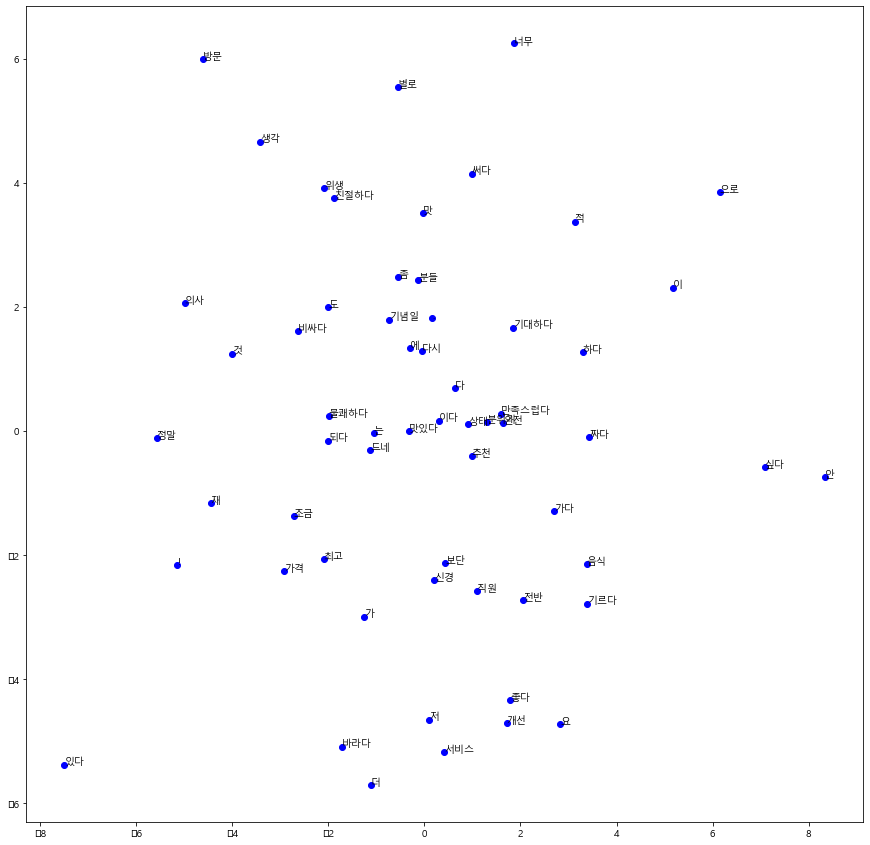

In [28]:
plt.figure(figsize=(15, 15))

for word_id, (x_coordinate, y_coordinate) in enumerate(pc_weight):
    plt.scatter(x_coordinate, y_coordinate, color="blue")
    plt.annotate(i2w[word_id], (x_coordinate, y_coordinate))

#### **CBOW 결과**

In [29]:
pc_weight = pca.fit_transform(cbow.embedding.weight.data.cpu().numpy())

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


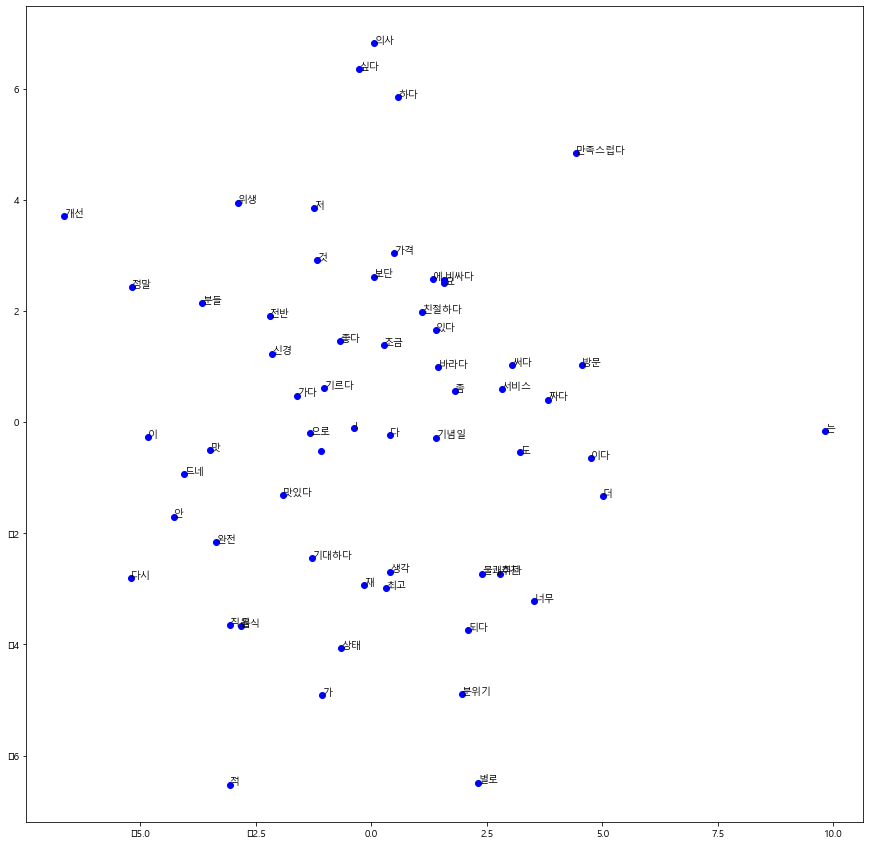

In [30]:
plt.figure(figsize=(15, 15))

for word_id, (x_coordinate, y_coordinate) in enumerate(pc_weight):
    plt.scatter(x_coordinate, y_coordinate, color="blue")
    plt.annotate(i2w[word_id], (x_coordinate, y_coordinate))

# **4. RNNs with Attention**

'3. Deep Learning'에서 배운 Seq2Seq와 Attention에 대해서 간략하게 복습 및 보충하겠습니다. 자세한 건 '3. Deep Learning'을 참고하세요.

## **4.1 Sequence to Sequecne**

![4-4-1](_image/4-4-1.PNG)

위 그림을 보면 알 수 있듯이 시퀀스 투 시퀀스는 입력을 받는 인코더와 출력하는 디코더로  이루어져있습니다. 그리고 인코더와 디코더는 각각의 RNN, LSTM, GRU 중 하나로 구성되어 있습니다. 

문장의 의미를 더욱 정확하게 파악하기 위해서 양방향 RNN을 사용할 수도 있습니다. 문장을 순방향으로 읽는 RNN과 역방향으로 읽는 RNN을 이용해 나온 최종 은닉 상태를 합하여 사용합니다. 이때 디코더는 순방향으로 하나씩 출력해야하므로 디코더에선 양방향을 사용하지 않습니다.

## **4.2 Attention**

Seq2Seq는 큰 문제점을 하나 가지고 있었습니다. 마지막 은닉 상태가 문장의 모든 의미를 함축해야 하는데 문장의 길이가 길어질수록 그것이 불가능하다는 것입니다. 즉, 앞쪽의 의미는 잊어버리게 됩니다. 이를 방지하기 위해 우리는 Attention이란 방법을 도입했었습니다.

간단하게 말하면 인코더에서 구한 은닉 상태의 결과들을 디코더가 필요한 결과들을 위주로 사용하는 방법이었습니다. 예를 들어 곱셈 기반의 attention을 보겠습니다.

![4-4-2](_image/4-4-2.PNG)

먼저 인코더에서 구해진 은닉 상태를 다 저장합니다. 이제 디코더에서 은닉 상태를 거칠 때, 인코더의 은닉 상태들과 내적으로 유사도를 구하여 소프트맥스합니다. 그리고 그 비율을 각각 인코더의 은닉 상태에 곱하여 합한 뒤, 구해진 값을 디코더의 추가 입력값으로 사용합니다.

예를 들어 기계 번역에선 문장에서 나와야 할 품사가 동일할 때 가중치가 더 높게 측정되는 것입니다. 

단어마다 어떤 단어에 가중치가 주어졌는지 그래프로 그려보면 다음과 같습니다. 가로축은 input, 세로축은 output 단어들입니다.

![4-4-3](_image/4-4-3.PNG)

(a)를 보면 중간에 어순이 바뀐 것을 확인할 수 있습니다. 또한 (b)를 보면 어떤 언어에선 하나의 단어가 다른 언어에선 여러 단어로 표현되는 것을 확인할 수 있습니다. 

이 이외도 다른 attention 방법이 있습니다. 예를 들어 concat 기반의 어텐션이 있습니다. 이는 인코더의 각각 은닉 상태들을 디코더의 은닉 상태와 concat하여 fc를 거치게 하고 하나의 노드를 출력으로 받습니다. 모든 인코더의 은닉 상태에게 적용하여 나온 값들을 가중치로 사용하여 적용하는 방법입니다. 

## 실습1. Seq2Seq with Attention

이번 실습은 Seq2Seq 모델을 구현하고 attention 모듈을 추가해보겠습니다.

### **1) Seq2Seq with toy example**

#### **데이터 전처리**

In [6]:
from tqdm import tqdm
from torch import nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.nn import functional as F

import torch
import random

src_data를 trg_data로 바꾸는 번역 task를 수행하기 위한 sample data를 준비합니다.

전체 단어 수는 100개이고 다음과 같이 pad token, start, token, end token의 id도 정의합니다.

In [23]:
vocab_size = 100
pad_id = 0
sos_id = 1 # <sos> : start of sentence
eos_id = 2 # <eos> : end of sentnece

src_data = [
    [3, 77, 56, 26, 3, 55, 12, 36, 31],
    [58, 20, 65, 46, 26, 10, 76, 44],
    [58, 17, 8],
    [59],
    [29, 3, 52, 74, 73, 51, 39, 75, 19],
    [41, 55, 77, 21, 52, 92, 97, 69, 54, 14, 93],
    [39, 47, 96, 68, 55, 16, 90, 45, 89, 84, 19, 22, 32, 99, 5],
    [75, 34, 17, 3, 86, 88],
    [63, 39, 5, 35, 67, 56, 68, 89, 55, 66],
    [12, 40, 69, 39, 49]
]

trg_data = [
    [75, 13, 22, 77, 89, 21, 13, 86, 95],
    [79, 14, 91, 41, 32, 79, 88, 34, 8, 68, 32, 77, 58, 7, 9, 87],
    [85, 8, 50, 30],
    [47, 30],
    [8, 85, 87, 77, 47, 21, 23, 98, 83, 4, 47, 97, 40, 43, 70, 8, 65, 71, 69, 88],
    [32, 37, 31, 77, 38, 93, 45, 74, 47, 54, 31, 18],
    [37, 14, 49, 24, 93, 37, 54, 51, 39, 84],
    [16, 98, 68, 57, 55, 46, 66, 85, 18],
    [20, 70, 14, 6, 58, 90, 30, 17, 91, 18, 90],
    [37, 93, 98, 13, 45, 28, 89, 72, 70]
]

In [24]:
# target data의 각 문장의 시작과 끝에 <sos> token id와 <eos> token id를 추가합니다.
trg_data = [[sos_id] + seq + [eos_id] for seq in tqdm(trg_data)]

100%|██████████| 10/10 [00:00<?, ?it/s]


In [25]:
# 각 문장의 길이를 동일하게 맞춰주기 위해 <pad> token id를 추가하는 padding 함수를 정의합니다.
def padding(data):
    max_len = len(max(data, key=len))
    print(f"Maximum sequence length: {max_len}")
    
    valid_lens = []
    for i, seq in enumerate(tqdm(data)):
        valid_lens.append(len(seq))
        if len(seq) < max_len:
            data[i] = seq + [pad_id] * (max_len - len(seq))
    
    return data, valid_lens, max_len

In [26]:
src_data, src_lens, src_max_len = padding(src_data)
trg_data, trg_lens, trg_max_len = padding(trg_data)

Maximum sequence length: 15


100%|██████████| 10/10 [00:00<00:00, 10017.44it/s]


Maximum sequence length: 22


100%|██████████| 10/10 [00:00<?, ?it/s]


In [27]:
# B: batch size,
# S_L: source maximum sequence length
# T_L: target maximum sequence length

src_batch = torch.LongTensor(src_data) # (B, S_L)
src_batch_lens = torch.LongTensor(src_lens) # (B)
trg_batch = torch.LongTensor(trg_data) # (B, T_L)
trg_batch_lens = torch.LongTensor(trg_lens) # (B)

print(src_batch.shape)
print(src_batch_lens.shape)
print(trg_batch.shape)
print(trg_batch_lens.shape)

torch.Size([10, 15])
torch.Size([10])
torch.Size([10, 22])
torch.Size([10])


In [28]:
src_batch_lens, sorted_idx = src_batch_lens.sort(descending=True)
src_batch = src_batch[sorted_idx]
trg_batch = trg_batch[sorted_idx]
trg_batch_lens = trg_batch_lens[sorted_idx]

print(src_batch)
print(src_batch_lens)
print(trg_batch)
print(trg_batch_lens)

tensor([[39, 47, 96, 68, 55, 16, 90, 45, 89, 84, 19, 22, 32, 99,  5],
        [41, 55, 77, 21, 52, 92, 97, 69, 54, 14, 93,  0,  0,  0,  0],
        [63, 39,  5, 35, 67, 56, 68, 89, 55, 66,  0,  0,  0,  0,  0],
        [ 3, 77, 56, 26,  3, 55, 12, 36, 31,  0,  0,  0,  0,  0,  0],
        [29,  3, 52, 74, 73, 51, 39, 75, 19,  0,  0,  0,  0,  0,  0],
        [58, 20, 65, 46, 26, 10, 76, 44,  0,  0,  0,  0,  0,  0,  0],
        [75, 34, 17,  3, 86, 88,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [12, 40, 69, 39, 49,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [58, 17,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [59,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])
tensor([15, 11, 10,  9,  9,  8,  6,  5,  3,  1])
tensor([[ 1, 37, 14, 49, 24, 93, 37, 54, 51, 39, 84,  2,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 1, 32, 37, 31, 77, 38, 93, 45, 74, 47, 54, 31, 18,  2,  0,  0,  0,  0,
          0,  0,  0,  0],
        [ 1, 20, 70, 14,  6, 58, 90,

#### Encoder 구현
- Embedding layer, output layer, GRU cell을 포함한 encoder 모듈을 구현합니다.

In [29]:
embedding_size = 256
hidden_size = 512
num_layers = 2
num_dirs = 2 # 2 if bidirectional=True otherwise 1
dropout = 0.1

In [30]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.gru = nn.GRU(
            input_size=embedding_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            bidirectional=True if num_dirs > 1 else False,
            dropout=dropout,
        )
        self.linear = nn.Linear(num_dirs * hidden_size, hidden_size)
    
    def forward(self, batch, batch_lens): # batch: (B, S_L), batch_lens: (B)
        # d_w: word embedding size
        batch_emb = self.embedding(batch) # (B, S_L, d_w)
        batch_emb = batch_emb.transpose(0, 1) # (S_L, B, d_w)
        
        packed_input = pack_padded_sequence(batch_emb, batch_lens)
        
        h_0 = torch.zeros((num_layers * num_dirs, batch.shape[0], hidden_size)) # (num_dirs*num_layers, B, d_h) = (4, B, d_h)
        packed_outputs, h_n = self.gru(packed_input, h_0) # h_n: (4, B, d_h)
        outputs = pad_packed_sequence(packed_outputs)[0] # outputs: (S_L, B, 2d_h)
        outputs = torch.tanh(self.linear(outputs)) # (S_L, B, d_h)
        
        forward_hidden = h_n[-2, :, :]
        backward_hidden = h_n[-1, :, :]
        hidden = torch.tanh(self.linear(torch.cat((forward_hidden, backward_hidden), dim=-1))).unsqueeze(0) # (1, B, d_h)
        
        return outputs, hidden

In [31]:
encoder = Encoder()

### **2) Dot-product Attention 구현**

attention 중 대표적 형태인 dot-product attention을 구현하겠습니다.

In [32]:
class DotAttention(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, decoder_hidden, encoder_outputs): # (1, B, d_h), (S_L, B, d_h)
        query = decoder_hidden.squeeze(0) # (B, d_h)
        key = encoder_outputs.transpose(0, 1) # (B, S_L, d_h)
        
        energy = torch.sum(torch.mul(key, query.unsqueeze(1)), dim=-1) # (B, S_L)
        
        attn_scores = F.softmax(energy, dim=-1) # (B, S_L)
        attn_values = torch.sum(torch.mul(encoder_outputs.transpose(0, 1), attn_scores.unsqueeze(2)), dim=1) # (B, d_h)
        
        return attn_values, attn_scores

In [33]:
dot_attn = DotAttention()

이제 attention 모듈을 가지는 decoder 클래스를 구현하겠습니다.

In [34]:
class Decoder(nn.Module):
    def __init__(self, attention):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.attention = attention
        self.rnn = nn.GRU(
            embedding_size,
            hidden_size,
        )
        self.output_linear = nn.Linear(2 * hidden_size, vocab_size)
    
    def forward(self, batch, encoder_outputs, hidden):
        """
        Args:
            batch : (B)
            encoder_outputs: (L, B, d_h)
            hidden: (1, B, d_h)
        """
        batch_emb = self.embedding(batch) # (B, d_w)
        batch_emb = batch_emb.unsqueeze(0) # (1, B, d_w)
        
        outputs, hidden = self.rnn(batch_emb, hidden) # (1, B, d_h), (1, B, d_h)
        attn_values, attn_scores = self.attention(hidden, encoder_outputs) # (B, d_h), (B, S_L)
        concat_outputs = torch.cat((outputs, attn_values.unsqueeze(0)), dim=-1) # (1, B, 2d_h)
        
        return self.output_linear(concat_outputs).squeeze(0), hidden # (B, V), (1, B, d_h)

In [35]:
decoder = Decoder(dot_attn)

### **3) Seq2Seq 모델 구축**

In [36]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, src_batch, src_batch_lens, trg_batch, teacher_forcing_prob=0.5):
        # src_batch: (B, S_L), src_batch_lens: (B), trg_batch: (B, T_L)
        
        # encoder_outputs: (S_L, B, d_h), hidden: (1, B, d_h)
        encoder_outputs, hidden = self.encoder(src_batch, src_batch_lens) 
        
        input_ids = trg_batch[:, 0] # (B)
        batch_size = src_batch.shape[0]
        outputs = torch.zeros(trg_max_len, batch_size, vocab_size) # (T_L, B, V)
        
        for t in range(1, trg_max_len):
            # decoder_outputs: (B, V), hidden: (1, B, d_h)
            decoder_outputs, hidden = self.decoder(input_ids, encoder_outputs, hidden)
            
            outputs[t] = decoder_outputs
            _, top_ids = torch.max(decoder_outputs, dim=-1) # top_ids: (B)
            
            input_ids = trg_batch[:, t] if random.random() > teacher_forcing_prob else top_ids
        
        return outputs

In [37]:
seq2seq = Seq2Seq(encoder, decoder)

### **4) 모델 사용하기**

In [38]:
# V: vocab size
outputs = seq2seq(src_batch, src_batch_lens, trg_batch) # (T_L, B, V)
print(outputs)
print(outputs.shape)

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-0.0476, -0.0706, -0.0480,  ..., -0.0360, -0.1264, -0.1105],
         [-0.0360, -0.0926, -0.0160,  ..., -0.0398, -0.1155, -0.0975],
         [-0.0370, -0.0307, -0.0097,  ..., -0.0366, -0.1466, -0.0853],
         ...,
         [-0.0619, -0.0664, -0.0315,  ..., -0.0459, -0.1248, -0.0681],
         [-0.0397, -0.0941, -0.0628,  ..., -0.0383, -0.1492, -0.1058],
         [-0.0464, -0.0722, -0.0397,  ..., -0.0575, -0.1219, -0.1070]],

        [[ 0.0566,  0.0247,  0.0921,  ..., -0.0740, -0.1147, -0.0941],
         [ 0.1006, -0.1363, -0.0872,  ..., -0

In [39]:
sample_sent = [4, 10, 88, 46, 72, 34, 14, 51]
sample_len = len(sample_sent)

sample_batch = torch.LongTensor(sample_sent).unsqueeze(0) # (1, L)
sample_batch_len = torch.LongTensor([sample_len]) # (1)

encoder_output, hidden = seq2seq.encoder(sample_batch, sample_batch_len) # hidden: (4, 1, d_h)

In [40]:
input_id = torch.LongTensor([sos_id]) # (1)
output = []

for t in range(1, trg_max_len):
    # decoder_output: (1, V), hidden: (4, 1, d_h)
    decoder_output, hidden = seq2seq.decoder(input_id, encoder_output, hidden)
    
    _, top_id = torch.max(decoder_output, dim=-1) # top_ids: (1)
    
    if top_id == eos_id:
        break
    else:
        output += top_id.tolist()
        input_id = top_id

In [41]:
output

[31,
 80,
 84,
 40,
 95,
 40,
 88,
 40,
 65,
 34,
 73,
 28,
 10,
 24,
 91,
 26,
 12,
 12,
 12,
 12,
 12]

### **5) Concat Attention 구현**

Bahdanau Attention이라고도 불리는 Concat Attention을 구현해보겠습니다.
- self.w: concat한 query와 key 벡터를 1차적으로 linear transformation.
- self.v: attention logit 값을 계산.

In [42]:
class ConcatAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Linear(2 * hidden_size, hidden_size, bias=False)
        self.v = nn.Linear(hidden_size, 1, bias=False)
    
    def forward(self, decoder_hidden, encoder_outputs): # (1, B, d_h), (S_L, B, d_h)
        src_max_len = encoder_outputs.shape[0]
        
        decoder_hidden = decoder_hidden.transpose(0, 1).repeat(1, src_max_len, 1) # (B, S_L, d_h)
        encoder_outputs = encoder_outputs.transpose(0, 1) # (B, S_L, d_h)
        
        concat_hiddens = torch.cat((decoder_hidden, encoder_outputs), dim=2) # (B, S_L, 2d_h)
        energy = torch.tanh(self.w(concat_hiddens)) # (B, S_L, d_h)
        
        attn_scores = F.softmax(self.v(energy), dim=1) # (B, S_L, 1)
        attn_values = torch.sum(torch.mul(encoder_outputs, attn_scores), dim=1) # (B, d_h)
        
        return attn_values, attn_scores

In [43]:
concat_attn = ConcatAttention()

In [44]:
class Decoder(nn.Module):
    def __init__(self, attention):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.attention = attention
        self.rnn = nn.GRU(
            embedding_size + hidden_size,
            hidden_size,
        )
        self.output_linear = nn.Linear(hidden_size, vocab_size)
    
    def forward(self, batch, encoder_outputs, hidden): 
        # batch: (B), encoder_outputs: (S_L, B, d_h), hidden: (1, B, d_h)
        batch_emb = self.embedding(batch) # (B, d_w)
        batch_emb = batch_emb.unsqueeze(0) # (1, B, d_w)
        
        attn_values, attn_scores = self.attention(hidden, encoder_outputs) # (B, d_h), (B, S_L)
        concat_emb = torch.cat((batch_emb, attn_values.unsqueeze(0)), dim=-1) # (1, B, d_w + d_h)
        outputs, hidden = self.rnn(concat_emb, hidden) # (1, B, d_h), (1, B, d_h)
        
        return self.output_linear(outputs).squeeze(0), hidden # (B, V), (1, B, d_h)

In [45]:
decoder = Decoder(concat_attn)
seq2seq = Seq2Seq(encoder, decoder)

In [46]:
outputs = seq2seq(src_batch, src_batch_lens, trg_batch)
print(outputs)
print(outputs.shape)

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.1234, -0.0919,  0.0954,  ...,  0.0174, -0.0957,  0.0635],
         [ 0.0748, -0.0693,  0.0969,  ...,  0.0345, -0.0742,  0.0858],
         [ 0.0761, -0.0433,  0.0738,  ..., -0.0406, -0.1071,  0.0789],
         ...,
         [ 0.0550, -0.0180,  0.0806,  ..., -0.0030, -0.0848,  0.1004],
         [ 0.0797, -0.0439,  0.1005,  ...,  0.0147, -0.0971,  0.0638],
         [ 0.0514, -0.0450,  0.1144,  ...,  0.0259, -0.1010,  0.0609]],

        [[-0.0212,  0.0125,  0.0370,  ..., -0.0458, -0.0731, -0.0334],
         [-0.0589,  0.0125,  0.0457,  ..., -0

# **5. Preprocessing**

자연어 처리 과정의 맥락을 간단하게 살펴보면 다음과 같습니다.

$$raw\;data \overset{pre-processing}{\longrightarrow} pre-processed\;data \overset{tokenization}{\longrightarrow} token \; idx \overset{input}{\longrightarrow} output \overset{post-processing}{\longrightarrow} result$$

#### **Normalization**
preprocessing 과정이며 일반적으론 특정 범위에 값이 모두 들어가도록 처리하는 일련의 과정을 말합니다. nlp에선 입력받은 raw data를 가공하는 것을 말합니다. 예를 들어 문장의 좌우 공백 제거, utf-8로 변환, 온점을 문장과 뗴어놓기 등 필요에 따라 다양한 normalization을 할 수 있습니다. 

#### **Pre-tokenization**
normalization을 거쳐도 바로 tokenization을 진행하기엔 무리가 있습니다. 특히 한국어는 띄어쓰기만으로 전처리를 해도 tokenization이 불가능하기에 문장을 더 작은 객체들로 나눠주는 pre-tokenization을 거쳐야합니다. 

#### **Tokenization**
이제 전처리가 모두 끝난 객체(단어)들에 인덱싱하여 token으로 만들어 저장합니다. 이에 관련해선 이후 자세하게 배웁니다.

#### **Post-processing**
모델에 들어가 output이 나오면 이것을 우리가 받을 결과로 후처리하여 결과를 얻게 됩니다.

## **5.1 Normalization**

Normalization은 크게 **Cleaning**과 **Normalization**으로 이루어집니다. Cleaning은 noise를 제거하는 것이고 Normalization은 단어들을 정규화하는 것입니다. 위에서 이야기했듯 정규화하는 방법과 종류는 다양합니다. 

#### **Cased / Uncased**
Cased / Uncased는 대소문자를 구분할 지, 구분하지 않을지를 결정합니다. uncased를 사용해 대소문자 구분을 하지 않으면 단어의 수가 줄어들어 메모리를 확보할 수 있으나 자칫 여러 의미가 하나의 단어로 정의되어 성능이 떨어질 수 있습니다.

하지만 현재 여러 언어들을 입력받아도 동작이 잘 되도록 하는 연구가 트렌드이고 단어가 많아질수록 사전의 비중이 너무 커져 막상 파라미터의 비중이 줄어드는 등의 이유로 uncased를 많이 사용합니다. 또한 두 개의 성능이 눈에 띄게 크기 않는 이유도 있습니다. 물론 어떤 목적이냐에 따라 cased가 더 효과적일 수도 있습니다. 그렇기에 두 개의 경우를 모두 확인하고 더 좋은 것을 사용하는 것이 일반적입니다.


#### **Stemming, Lemmatization**
Stemming은 단어들을 원형으로 바꿔주는 것을 의미합니다. 예를 들어 '먹었다'라는 과거형이 들어오면 '먹다'라는 일반형으로 바꿔준느 것입니다. 특별한 필요가 있을 때 사용하지만 대체적으로 사용하지 않습니다. 인위적으로 data를 바꾸는 것이 새로운 noise를 만들고 성능을 저하시키기 때문입니다.


#### **불필요한 단어 제거**
관심이 없는 단어이거나 의미가 없는 빈칸, 개별적 문자로 채워진 것들을 제거합니다.


#### **Regular expression**
개인 정보 등 데이터에서 공개되면 안 되는 것이 있을 때, 그것을 가리거나 제거하는 것을 말합니다. 예를 들어 신상정보가 있다면 그것을 x로 표시하거나 빈칸으로 대체하는 것을 말합니다. 이 역시 필요할 때만 사용합니다. 

대체적으로 파이썬의 re 패키지를 이용해 정규식으로 regular expression을 수행합니다. re 패키지를 사용할 때, 먼저 re.compile()을 사용하면 속도나 성능을 조금 끌어올릴 수 있습니다. (다른 re.함수들이 시작할 때마다 compile을 불러오지 않아도 됨으로) 다른 방법으로 NLTK도 있으나 거의 쓰이지 않는 추세입니다. 

## **5.2 Pre-tokenization**

토큰화 작업 전 데이터를 가공할 땐, 기본적으로 특수 문자 제거와 공백에 따른 분리를 목표로 합니다. 물론 상황에 따라 안 하거나 다르게 할 수 있습니다. 예를 들어 aren't를 are not으로 바꾸는 것입니다. 

한국어의 경우 공백만으로 token을 나눌 수 없습니다. 그렇기에 띄어쓰기를 고치고 형태소 분석기를 사용하여 토큰화 전처리를 합니다. 지도학습 기반의 KoNLPy, Khaiii와 비지도학습 기반의 soynlp가 있습니다. 간단하게 여러 text 전처리 툴을 살펴보겠습니다.

### **0) Regular Expression**

정규식 표현은 nlp에서 기본적으로 데이터 가공할 때 사용됩니다. 

> Reference: https://wikidocs.net/21703

In [47]:
import re

. 기호

In [49]:
# 임의의 한 개의 문자를 나타내는 .
r = re.compile("a.c")
r.search("ab")

In [50]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

? 기호

In [51]:
# ? 앞의 문자가 존재할 수도 있고, 존재하지 않을 수도 있는 경우
r = re.compile("a?c")
r.search("bc")

<re.Match object; span=(1, 2), match='c'>

In [52]:
# 존재 하는 경우의 매칭
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [53]:
# 존재하지 않는 경우의 매칭
r.search("abc")

<re.Match object; span=(2, 3), match='c'>

\* 기호

In [54]:
# *은 바로 앞의 문자가 0개 이상일 경우
r = re.compile("ab*c") # b가 하나도 없거나, 여러 개인 경우
r.search("a")

In [55]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [57]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [56]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

\+ 기호

In [58]:
# + 앞의 문자가 최소 1개 이상 있을 경우
r = re.compile("ab+c")
r.search("ac")

In [59]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [60]:
r.search("abbbc")

<re.Match object; span=(0, 5), match='abbbc'>

^ 기호

In [61]:
# ^ 시작되는 글자를 지정함
r = re.compile("^a")
r.search("bbc")

In [62]:
r.search("ab")

<re.Match object; span=(0, 1), match='a'>

{숫자} 기호

In [63]:
# 앞 문자를 해당 숫자만큼 반복해야 함.
r = re.compile("ab{2}c")
r.search("ac")

In [64]:
r.search("abc")

In [65]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

{숫자1, 숫자2} 기호

In [70]:
# 앞 문자를 숫자1 ~ 숫자2 만큼 반복해야 함
r = re.compile("ab{2,8}c") # 띄어쓰기 하면 안 됨
r.search("ac") 

In [71]:
r.search("abc")

In [72]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [73]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [74]:
r.search("abbbbbbbbbc")

{숫자,} 기호

In [75]:
# 앞 문자를 숫자 이상만큼 반복해야 함
r = re.compile("a{2,}bc")
r.search("abc")

In [78]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

[] 기호

In [79]:
# [] 안에 있는 문자들 중 한 개의 문자와 매치
# 범위를 지정할 수도 있음. 예) a-z, A-Z, 0-9
r = re.compile('[abc]')
r.search("dd")

In [80]:
r.search("ad")

<re.Match object; span=(0, 1), match='a'>

In [83]:
r.search("adb")

<re.Match object; span=(0, 1), match='a'>

[^문자] 기호

In [84]:
# ^ 기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치함
r = re.compile("[^abc]") # abc를 제외한 모든 문자
r.search("ab")

In [85]:
r.search("abcd")

<re.Match object; span=(3, 4), match='d'>

In [86]:
r.search("abcedf")

<re.Match object; span=(3, 4), match='e'>

### **1) KoNLPy**

[KoNLPy](https://konlpy.org/en/latest/)는 Hannanum, Kkma, Komoran, Mecab, Okt 등 다양한 형태소 분석기를 제공합니다. 그리고 형태소로 나누는 함수, 명사만 뽑아내는 함수, 형태소와 묶어서 분리하는 함수 등 다양한 함수들이 있습니다.

In [87]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
text = '환영합니다! 자연어 처리 수업은 재미있게 듣고 계신가요?'
print(hannanum.morphs(text))  # Parse phrase to morphemes
print(hannanum.nouns(text))   # Noun extractors
print(hannanum.pos(text))     # POS tagger

['환영', '하', 'ㅂ니다', '!', '자연어', '처리', '수업', '은', '재미있', '게', '듣', '고', '계시', 'ㄴ가', '요', '?']
['환영', '자연어', '처리', '수업']
[('환영', 'N'), ('하', 'X'), ('ㅂ니다', 'E'), ('!', 'S'), ('자연어', 'N'), ('처리', 'N'), ('수업', 'N'), ('은', 'J'), ('재미있', 'P'), ('게', 'E'), ('듣', 'P'), ('고', 'E'), ('계시', 'P'), ('ㄴ가', 'E'), ('요', 'J'), ('?', 'S')]


In [88]:
from konlpy.tag import Kkma
kkma = Kkma()
text = '환영합니다! 자연어 처리 수업은 재미있게 듣고 계신가요?'
print(kkma.morphs(text))  # Parse phrase to morphemes
print(kkma.nouns(text))   # Noun extractors
print(kkma.pos(text))     # POS tagger

['환영', '하', 'ㅂ니다', '!', '자연어', '처리', '수업', '은', '재미있', '게', '듣', '고', '계시', 'ㄴ가요', '?']
['환영', '자연어', '처리', '수업']
[('환영', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EFN'), ('!', 'SF'), ('자연어', 'NNG'), ('처리', 'NNG'), ('수업', 'NNG'), ('은', 'JX'), ('재미있', 'VA'), ('게', 'ECD'), ('듣', 'VV'), ('고', 'ECE'), ('계시', 'VXA'), ('ㄴ가요', 'EFQ'), ('?', 'SF')]


### **2) Khaiii**

[Khaiii](https://tech.kakao.com/2018/12/13/khaiii/)(Kakao Hangul Analyzer III)는 카카오의 딥러닝 기반 형태소 분석기입니다. 국립국어원에서 배포한 세종코퍼스로 학습하였습니다. 한국어에서 형태소 분석은 가장 기본적 전처리 과정으로 속도가 매우 중요하다는 판단하에 nlp에서 자주 쓰이는 LSTM이나 RNN을 제외하고 CNN을 사용하여 구현되었습니다. 

<img src = "https://t1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/1oU7/image/DXlTnCNYfeYzWIR4kN428VouYKQ.png">

[Khaiii github](https://github.com/kakao/khaiii)

윈도우는 지원하지 않기에 ubuntu 상에서 확인했습니다. 

ubuntu에서 `jupyter notebook` 명령어로 실행하여 확인하면 됩니다.

[윈도우에서 khaiii 설치 방법](https://sy-log.tistory.com/55)

### **3) PyKoSpacing**

[PyKoSpacing](https://github.com/haven-jeon/PyKoSpacing)은 띄어쓰기가 되어있지 않은 문장에 띄어쓰기를 적용해줍니다. 

In [4]:
from pykospacing import Spacing

spacing = Spacing()

sent = "구름 자연어 처리 전문가 양성 과정 2기에 오신 여러분을 환영합니다!"
new_sent = sent.replace(" ", "")
kospacing_sent = spacing(new_sent)

print("띄어쓰기가 없는 문장:\n", new_sent)
print("정답:\n", sent)
print("띄어쓰기 교정 후:\n", kospacing_sent)

띄어쓰기가 없는 문장:
 구름자연어처리전문가양성과정2기에오신여러분을환영합니다!
정답:
 구름 자연어 처리 전문가 양성 과정 2기에 오신 여러분을 환영합니다!
띄어쓰기 교정 후:
 구름자연어 처리 전문가 양성과정 2기에 오신 여러분을 환영합니다!


### **4) Py-Hanspell**

네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지입니다.

In [2]:
from hanspell import spell_checker

result = spell_checker.check(u'안녕 하세요. 저는 한국인 입니다. 이문장은 한글로 작성됬습니다.')
result.as_dict()

{'result': True,
 'original': '안녕 하세요. 저는 한국인 입니다. 이문장은 한글로 작성됬습니다.',
 'checked': '안녕하세요. 저는 한국인입니다. 이 문장은 한글로 작성됐습니다.',
 'errors': 4,
 'words': OrderedDict([('안녕하세요.', 2),
              ('저는', 0),
              ('한국인입니다.', 2),
              ('이', 2),
              ('문장은', 2),
              ('한글로', 0),
              ('작성됐습니다.', 1)]),
 'time': 0.13100790977478027}

In [3]:
sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


### **5) soynlp**

[soynlp](https://github.com/lovit/soynlp)는 한국어와 관련된 전처리 함수와 여러 함수들이 모아져있는 라이브러리입니다. 비지도학습 기반이기에 어느 정도 규모가 있는 동일한 집단 문서에서 잘 작동합니다. 예를 들어 영화댓글이나 뉴스 기사 등이 있습니다. 

Noun extractor, word extraction, tokenizer, part of speech tagger, vectorizer, normalizer 등의 기능을 가진 함수들이 있습니다. 밑에는 그 중 normalization의 함수를 사용한 것입니다.

In [5]:
from soynlp.normalizer import *

print(emoticon_normalize('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ쿠ㅜㅜㅜㅜㅜㅜ', num_repeats=3))

print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))

print(only_hangle('가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜabcd123!!아핫'))

print(only_hangle_number('가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜabcd123!!아핫'))

print(only_text('가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜabcd123!!아핫'))

ㅋㅋㅋㅜㅜㅜ
와하하핫
가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜ 아핫
가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜ 123 아핫
가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜabcd123!!아핫


더 다양한 것은 각 라이브러리 홈페이지를 참고하면 됩니다.

## 실습1. 네이버 영화 감상평을 크롤링하고 전처리하기

네이버 영화 감상평을 크롤링하고 전처리 과정을 거쳐 보겠습니다.

In [4]:
from urllib.request import urlopen # 웹서버에 접근하는 모듈
from bs4 import BeautifulSoup # 웹페이지 내용구조를 분석하는 모듈

### **1) 네이버 영화 감상평 크롤링**

In [5]:
url='https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=187348&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1'
html=urlopen(url)
html_source = BeautifulSoup(html,'html.parser',from_encoding='utf-8') # 댓글 페이지를 utf-8형식으로 html 소스가져오기

In [7]:
print(html_source)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>네이버 영화</title>
<link href="https://ssl.pstatic.net/static/m/movie/icons/naver_movie_favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/common.css?20220110163618" rel="stylesheet" type="text/css">
<link href="/css/movie_tablet.css?20220110163618" rel="stylesheet" type="text/css"/>
<link href="/css/movie_end.css?20220110163618" rel="stylesheet" type="text/css"/>
<script src="/js/deploy/movie.all.js?20220110163618" type="text/javascript"></script>
</link></head>
<body>
<!-- content -->
<input id="movieCode" name="movieCode" type="hidden" value="187348"/>
<input id="onlyActualPointYn" name="onlyActualPointYn" type="hidden" value="N"/>
<input id="includeSpoilerYn" name="includeSpoilerYn" type="hidden" value="N"/>
<input id="order" name="order" type="hidden" value="sympathyScore"/>
<input id="page" name="page" type="hidden" value="1"/>
<div clas

댓글 부분에 해당하는 요소를 확인하고 내용을 추출합니다.

In [9]:
# 첫 번째 리뷰
html_reviews = html_source.find('span', {'id': '_filtered_ment_0'})
print(html_reviews)

<span id="_filtered_ment_0">
														
															
															
																명품 브랜드라 믿고 샀는데 안에 made in china가 적혀있었다 
															
														
														
													</span>


In [10]:
for i in range(10):
    html_reviews = html_source.find('span', {'id': '_filtered_ment_' + str(i)})
    print(html_reviews)

<span id="_filtered_ment_0">
														
															
															
																명품 브랜드라 믿고 샀는데 안에 made in china가 적혀있었다 
															
														
														
													</span>
<span id="_filtered_ment_1">
<span class="_unfold_ment" id="_unfold_ment1">
<a data-src="자세히 보면 중국 문화 올려치는 영화입니다. 초반부터 똥양계는 무조건 한국인 취급하는데 우리는 당당히 중국인이다. ㅇㅈㄹ하고요. 깊고 정통한 중국 문화는 대를 이어서 간다. 마카오에서 K-POP 댄스 추는 거 보고 무조건 힙하지? 우리 중국 문화야 ㅋ 구미호, 기린, 용은 우리 문화다. 사람 죽으면 물에 연등 띄우는 거? 우리 중국 문화다. 동북공정 영화입니다. 영화는 자세히 보세요. 의도가 있습니다. " href="javascript:void(0);" onclick="unfoldPointMent(this);">
																		자세히 보면 중국 문화 올려치는 영화입니다. 초반부터 똥양계는 무조건 한국인 취급하는데 우리는 당당히 중국인이다. ㅇㅈㄹ하고요. 깊고 정통한 중국 문화는 대를 이어서 간다. 마카오에서 K-POP 댄스 추는 거 보고 ...
																	</a>
</span>
</span>
<span id="_filtered_ment_2">
														
															
															
																마블의 중국산 D-War 
															
														
														
													</span>
<span id="_filtered_ment_3">
<span class="_unfold_ment" id="_unfold_

In [12]:
# 10명 리뷰 확인, 불필요한 HTML 태그 제거
for i in range(10):
    html_reviews = html_source.find('span', {'id': '_filtered_ment_' + str(i)})
    print(html_reviews.text.strip())

명품 브랜드라 믿고 샀는데 안에 made in china가 적혀있었다
자세히 보면 중국 문화 올려치는 영화입니다. 초반부터 똥양계는 무조건 한국인 취급하는데 우리는 당당히 중국인이다. ㅇㅈㄹ하고요. 깊고 정통한 중국 문화는 대를 이어서 간다. 마카오에서 K-POP 댄스 추는 거 보고 ...
마블의 중국산 D-War
세계관이나 설정들이 너무 붕 떠있고 개연성은 밥말아 먹어놓고 억지 신파 끼워넣기에 주인공은 무색무취 아무 매력 없음. 10초전 까지 죽일듯이 싸우던 애들이 갑자기 우리 함께 싸우자 ㅇㅈㄹ 하질 않나. 아부지 행동들 ...
마블의 탈을 쓴 중국 무협영화. 중국 시장과 자본을 지나치게 의식한 디즈니의 연이은 헛발질. CG 범벅에 협소한 공간에서 몇 안되는 인원들의 액션 등 스케일마저 왜 이리 작아진 건지...
하 정말 재미없네요..
마블 영화를 본 건지 중국 영화를 본 건지 모르겠지만 양조위는 너무 멋있더라....
마블의 새로운 시작이다… 재밌어요
아부지를 왜케 미워하는거지 훈련빡시케 시켰다고 그러는건가아부지를 죽인댔다가 갑자기 필요하다하고 개연성이 좀 부족..텐링즈의 전설이란 제목도 뭐 굳이...
마블영화보면서 처음으로 졸았습니다 ㅜㅜ


In [13]:
# 10페이지에 대해 댓글 수집
reviews_list = []
for j in range(1, 11):
    url='https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=187348&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='+str(j)
    html = urlopen(url)
    html_source = BeautifulSoup(html, 'html.parser', from_encoding='utf-8') # 댓글 페이지를 utf-8 형식으로 html 소스 가져오기
    
    for i in range(10):
        html_reviews = html_source.find('span', {'id':'_filtered_ment_' + str(i)})
        reviews_list.append(html_reviews.text.strip())

file = open('data/reviews.txt', 'w', encoding='utf-8')
for review in reviews_list: # 요소를 1개의 행으로 저장되도록 개행문자 추가
    file.write(review + '\n') # 개행 문자 추가 --> Enter, 줄바꿈 효과
file.close()

### **2) 크롤링한 데이터 전처리**

In [14]:
with open('data/reviews.txt', 'r', encoding='utf-8') as f:
    review_data = f.readlines()

f.close()

In [15]:
len(review_data)

100

In [16]:
review_data

['명품 브랜드라 믿고 샀는데 안에 made in china가 적혀있었다\n',
 '자세히 보면 중국 문화 올려치는 영화입니다. 초반부터 똥양계는 무조건 한국인 취급하는데 우리는 당당히 중국인이다. ㅇㅈㄹ하고요. 깊고 정통한 중국 문화는 대를 이어서 간다. 마카오에서 K-POP 댄스 추는 거 보고 ...\n',
 '마블의 중국산 D-War\n',
 '세계관이나 설정들이 너무 붕 떠있고 개연성은 밥말아 먹어놓고 억지 신파 끼워넣기에 주인공은 무색무취 아무 매력 없음. 10초전 까지 죽일듯이 싸우던 애들이 갑자기 우리 함께 싸우자 ㅇㅈㄹ 하질 않나. 아부지 행동들 ...\n',
 '마블의 탈을 쓴 중국 무협영화. 중국 시장과 자본을 지나치게 의식한 디즈니의 연이은 헛발질. CG 범벅에 협소한 공간에서 몇 안되는 인원들의 액션 등 스케일마저 왜 이리 작아진 건지...\n',
 '하 정말 재미없네요..\n',
 '마블 영화를 본 건지 중국 영화를 본 건지 모르겠지만 양조위는 너무 멋있더라....\n',
 '마블의 새로운 시작이다… 재밌어요\n',
 '아부지를 왜케 미워하는거지 훈련빡시케 시켰다고 그러는건가아부지를 죽인댔다가 갑자기 필요하다하고 개연성이 좀 부족..텐링즈의 전설이란 제목도 뭐 굳이...\n',
 '마블영화보면서 처음으로 졸았습니다 ㅜㅜ\n',
 '일라오이 VS 사일러스\n',
 '진짜 개노잼이다 와 이렇게 재미없는 마블영화도 첨\n',
 '마블 영화라 믿기지 않을 정도로 지루해.. 졸려 죽는 줄 알았다ㅠ\n',
 '노잼, 개연성 제로, 중국산 웹툰 느낌\n',
 '이게뭐냐 진짜 마블 실망\n',
 '전형적인 서양에서 생각하는 온갖 동양 클리셰는 몽따 넣은 영화 .. 보면서 불편\n',
 '보는내내ㅠ드는 생각....왜 총안씀...?\n',
 '솔직히 샹치 캐릭터의 매력이 뭔지 잘모르겠고 용타고 날라다닐땐 마블이 왜 저러나싶음...샹치 표정연기 못해서 캐릭터 몰입안됨..미스캐스팅....연기도 별로...캐릭들의 감정 이입도 어색하고(양조위 제외) 진행 전개도

### **3) 한글만 남기고 다른 글자 제거**

In [17]:
import re

tmp = re.sub('[^가-힣]', '', review_data[8])
print(tmp)

아부지를왜케미워하는거지훈련빡시케시켰다고그러는건가아부지를죽인댔다가갑자기필요하다하고개연성이좀부족텐링즈의전설이란제목도뭐굳이


In [18]:
tmp = re.sub(' +', ' ', tmp)
print(tmp)

아부지를왜케미워하는거지훈련빡시케시켰다고그러는건가아부지를죽인댔다가갑자기필요하다하고개연성이좀부족텐링즈의전설이란제목도뭐굳이


In [19]:
from pykospacing import Spacing

spacing = Spacing()
kospacing_sent = spacing(tmp)

print(kospacing_sent)

아부지를 왜 케미워하는 거지 훈련 빡시케시켰다고 그러는 건가 아부지를 죽인 댔다가 갑자기 필요하다 하고 개연성이 좀 부족텐링즈의 전설이란 제목도 뭐 굳이


In [22]:
from hanspell import spell_checker

spelled_sent = spell_checker.check(kospacing_sent)
hanspell_sent = spelled_sent.checked
print(hanspell_sent)

아버지를 왜 게 미워하는 거지 훈련 빡세 케시 켰다고 그러는 건가 아버지를 죽인 댔다가 갑자기 필요하다 하고 개연성이 좀 부족텐링즈의 전설이란 제목도 뭐 굳이


# **6. Transformer**

## **6.1 Intro**

Transformer는 2017년 구글이 발표한 논문인 [Attention is all you need](https://arxiv.org/abs/1706.03762)에서 나온 모델로 기존의 seq2seq의 구조인 인코더-디코더의 구조는 따르면서 attention만으로 구현한 모델입니다. 이 모델은 RNN을 사용하지 않았음에도 RNN보다 더 좋은 성능을 보여줍니다. 

시작에 앞서 트랜스포머의 하이퍼파라미터를 정의하겠습니다. 하이퍼파라미터에 대한 설명은 뒤에 이어 나오고 여기선 정의만 먼저 하겠습니다. 수치는 논문에서 제의한 수치이고 사용자가 임의로 변경할 수 잇는 값들입니다.

* $d_{model}$ = 512  
트랜스포머의 인코더와 디코더에서 정해진 입력과 출력의 크기를 의미합니다. 임베딩 벡터의 차원 또한 $d_{model}$이며, 각 인코더와 디코더가 다음 층의 인코더와 디코더로 값을 보낼 때에도 이 차원을 유지합니다. 논문에선 512로 정의했습니다.  

$$ $$

* num_layers = 6  
트랜스포머에서 하나의 인코더와 디코더를 층으로 생각했을 때, 트랜스포머 모델에서 인코더와 디코더가 총 몇 층으로 구성되었는지를 의미합니다. 논문에선 6으로 정의했습니다.

$$ $$

* num_heads = 8  
트랜스포머에선 어텐션을 병령로 수행하는데 이때 병렬의 개수를 의미합니다. 논문에선 8로 정의했습니다.

$$ $$

* $d_{ff}$ = 2048  
트랜스포머 내부에는 피드 포워드 신경망이 존재하며 해당 신경망의 은닉층의 크기를 의미합니다. 피드 포워드 신경망의 입력층과 출력층의 크기는 $d_{model}$입니다.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context(context="talk")
%matplotlib inline

In [59]:
def clones(module, N):
    "Produce N identical layers."
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])

## **6.2 Transformer**

<img src = "http://jalammar.github.io/images/t/The_transformer_encoders_decoders.png">

트랜스포머는 RNN을 사용하지 않지만 기존 seq2seq처럼 인코더에서 입력 시퀀스를 입력받고 디코더에서 출력 시퀀스를 출력하는 인코더-디코더 구조를 유지하고 있습니다. 이전 seq2seq 구조에서 인코더와 디코더가 각각 하나의 RNN이 t개의 시점을 가지는 구조였다면 이번에는 인코더와 디코더라는 단위가 N개로 구성되는 구조입니다. 논문은 각각 6개로 설정했습니다.

<img src = "http://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png">

위 그림이 인코더와 디코더가 6개씩 존재하는 트랜스포머의 구조를 보여줍니다. 

![transformer](_image/4-6-1.PNG)

트랜스포머의 전체적 구조는 위와 같습니다. 복잡하고 어려운 것들이 많아 보이지만 하나씩 뜯어가며 살펴보겠습니다. 

## **6.3 Positional Encoding**

트랜스포머의 내부를 보기 전에 입력을 먼저 알아보겠습니다. RNN은 단어의 위치에 따라 순차적으로 입력을 받기에 자연스레 위치 정보를 가질 수 있다는 장점이 있었습니다. 

하지만 트랜스포머는 단어의 입력을 순차적으로 받지 않기에 위치 정보를 저장하지 못합니다. 그렇기에 포지셔널 인코딩(positional encoding)을 통해 위치 정보를 더하여 입력으로 사용하게 됩니다. 

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_positional_encoding_vectors.png">

위 그림을 보면 입력이 들어가기 전에 입력값인 임베딩 벡터에 포지셔널 인코딩이 더해지는 것을 볼 수 있습니다. 

만약 임베딩 크기가 4라고 가정한다면, 실제로 각 위치에서 따른 포지녀설 인코딩은 아래와 같이 계산됩니다.

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_positional_encoding_example.png">

이때 포지셔널 인코딩 벡터를 정하기 위해 아래의 두 함수를 사용합니다. (이것은 Sinusoidal Position Embedding이라고 합니다.)

$$PE_{(pos, 2i)} = sin(pos/10000^{2i/d_{model}})$$
$$PE_{(pos, 2i + 1)} = cos(pos/10000^{2i/d_{model}})$$

sin과 cos함수의 값을 더해주므로 단어의 순서 정보를 더해주는 것입니다. 밑의 그래프는 임베딩 크기가 4일 때, 포지셔닝 인코딩을 해주기 위해 구한 사인과 코사인 함수의 그래프입니다.

<img src = "http://nlp.seas.harvard.edu/images/the-annotated-transformer_49_0.png">

위에서 x축은 단어의 순서입니다. 이를 기준으로 결정되는 4개의 값(임베딩 크기가 4이므로 그래프가 4개)으로 포지셔닝 인코딩 벡터를 만들어 더해주는 것입니다. 

좀 더 자세히 살펴보겠습니다. 

<img src = "https://wikidocs.net/images/page/31379/transformer7.PNG">

pos는 입력 문장에서 임베딩 벡터의 위치를 나타내며 i는 임베딩 벡터 내의 차원 인덱스를 의미합니다. 위 식을 보면 알 수 있듯 인덱스가 짝수인 곳은 sin 함수, 인덱스가 홀수인 곳은 cos 함수를 사용합니다. 또한 위 식에서 $d_{model}$은 트랜스포머의 모든 층의 출력 차원을 의미하는 하이퍼파라미터입니다. 임베딩 벡터 또한 $d_{model}$의 크기를 가지며 위 그림에선 4, 논문에선 512로 정의되어있습니다. 

이렇게 같은 단어가 들어와도 순서 정보가 합쳐져 다른 임베딩 벡터가 만들어지게 됩니다. 이를 코드로 구현하면 다음과 같습니다.

In [2]:
class PositionalEncoding(nn.Module):
    """Implement the PE function"""
    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x += Variable(self.pe[:, :x.size(1)], requires_grad=False)
        return self.dropout(x)

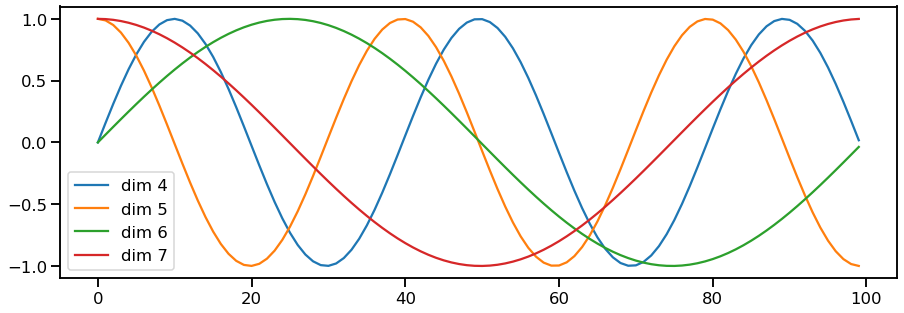

In [3]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe.forward(Variable(torch.zeros(1, 100, 20)))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d"%p for p in [4, 5, 6, 7]])

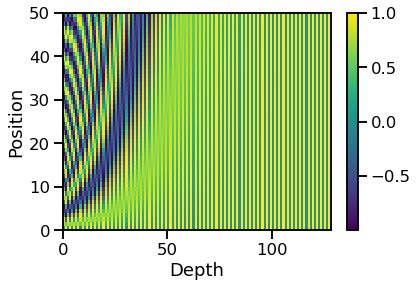

In [26]:
# 임베딩 벡터의 차원 128, 문장의 길이 50
sample_pos_encoding = PositionalEncoding(128, 0, 50)

y = sample_pos_encoding.forward(Variable(torch.zeros(1, 50, 128)))
plt.pcolormesh(y[0])
plt.xlabel("Depth")
plt.xlim((0, 128))
plt.ylabel("Position")
plt.colorbar()
plt.show()

## **6.4 Trasformer에서 사용되는 Attention**

<img src = "https://wikidocs.net/images/page/31379/attention.PNG">

트랜스포머에선 위 그림에 나타난 세 가지 어텐션을 사용합니다. 첫번째 어텐션은 인코더에서, 두번째와 세번째 어텐션은 디코더에서 사용됩니다. 셀프 어텐션은 본질적으로 쿼리(Query), 키(Key), 값(Value)가 동일한 경우(출처가 같다)를 말합니다. 그렇기에 세번째 어텐션의 경우 쿼리는 디코더의 벡터, 키와 값는 인코더의 벡터이므로 셀프 어텐션이 아닙니다. 

<img src = "https://wikidocs.net/images/page/31379/transformer_attention_overview.PNG">

위 그림은 각각의 어텐션이 위치하는 곳을 표시한 것입니다.

## **6.5 Encoder**

이제 인코더에 대해서 알아보겠습니다.

![encoder](_image/4-6-2.PNG)

트랜스포머는 하이퍼파라미터인 num_layers(위 그림에서 N) 개수의 인코더 층을 쌓습니다. 논문은 6개의 층을 쌓았습니다. 하나의 인코더 층은 크게 attention과 feed forward 두 개의 서브층(sublayer)으로 나뉘어집니다. 

### **1) Self-Attention**

어텐션 함수는 주어진 쿼리에 대해서 모든 키와의 유사도를 구합니다. 그리고 구한 유사도를 가중치로 사용하여 키와 맵핑되어있는 각각의 값에 반영합니다. 그리고 유사도가 반영된 값을 모두 가중합하여 출력합니다.

<img src = "https://wikidocs.net/images/page/22893/%EC%BF%BC%EB%A6%AC.PNG">

이것이 앞서 배운 어텐션의 기본 개념입니다. 여기서 주어진 쿼리, 키, 값의 의미는 다음과 같습니다.

- Q(Query): 모든 시점의 디코더 셀에서의 은닉 상태들
- K(Keys): 모든 시점의 인코더 셀의 은닉 상태들
- V(Values): 모든 시점의 인코더 셀의 은닉 상태들

기존 어텐션은 위처럼 Q와 K가 다른 값을 가지고 있었습니다. 그러나 셀프 어텐션(self-attention)은 Q, K, V가 모두 동일합니다. 그렇기에 트랜스포머에서 Q, K, V는 다음과 같습니다.

- Q(Query): 입력 문장의 모든 단어 벡터들
- K(Keys): 입력 문장의 모든 단어 벡터들
- V(Values): 입력 문장의 모든 단어 벡터들

이를 도입한 이유는 모델이 단어들을 인코딩할 때, 다른 단어들을 보고 더 정확한 인코딩을 하도록 만들기 위함입니다. 예를 들어 "The animal didn't cross the street because it was too tired."라는 문장이 있을 때, "it"은 무엇일까요? 사람은 "animal"이란 것을 알 수 있지만 기계는 "animal"과 "street" 중 쉽게 고르지 못합니다. 이를 방지하기 위해 현재 처리 중인 단어와 연관 있는 다른 단어들의 맥락을 고려하여 임베딩하는 것입니다.

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_self-attention_visualization.png">

### **2) Scaled dot-product Attention**

**Q, K, V 벡터 생성**

셀프 어텐션은 첫번째로 인코더에 입력된 벡터로부터 Q, K, V라는 3개의 벡터를 만들어냅니다. 이 벡터들은 입력 벡터에 대해서 세 개의 학습 가능한 행렬들을 각각 곱함으로 만들어집니다.

이때 Q, K, V 벡터들은 초기 입력인 $d_{model}$보다 작은 차원을 가집니다. 논문에선 $d_{model}$이 512인데 반해 새로운 벡터들의 차원은 64입니다. 그러나 꼭 작아야하는 것은 아닙니다. 여기서 새로운 벡터들의 차원을 작게 한 이유는 multi-head attention의 계산 복잡도를 일정하게 만들기 위함일 뿐입니다.  

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_self_attention_vectors.png">

위 그림에서 $x_1$에 가중치 행렬 $W_Q$를 곱하여 현재 단어와 연관된 쿼리 벡터 $q_1$을 생성합니다. 마찬가지로 다른 $q_1, \; k_1, \; v_1$ 벡터도 만들어집니다. 이때 각 가중치 행렬은 $d_{model} \times (d_{model}\;/num\_heads)$의 크기를 가집니다. 논문과 같다면 $d_{model}=512, \; num\_heads=8$로 64의 크기를 가지는 $q_1, \; k_1, \; v_1$벡터가 만들어집니다. 

**어텐션 점수 계산**

두번째로 어텐션 점수를 계산합니다. 아래 예시의 첫번째 단어인 "Thinking"에 대해 계산한다고 하겠습니다. 그렇다면 "Thinking"과 입력 문장 속 다른 모든 단어들에 대해서 점수를 구해야 합니다. 이 점수가 추후 인코딩할 때, 다른 단어들에 대해 얼마나 집중해야 할 지 결정합니다.

점수는 현재 단어의 쿼리 벡터와 다른 단어의 키 벡터의 내적으로 계산됩니다. 즉, 유사도와 동일합니다.

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_self_attention_score.png">

**Softmax**

이제 점수들을 키 벡터의 크기인 $d_k$의 제곱근인 $\sqrt{d_k}$로 나눠줍니다. 이는 값들을 전체적으로 0과 가깝게 만들어줍니다. 그래서 소프트맥스의 대소 관계를 바꾸진 않지만 서로의 격차를 줄여주고 가중치가 하나로 쏠리는 현상을 막아줍니다. (더 안정적인 gradient를 가지게 만듭니다.) 그리고 이 값을 softmax 계산을 통해 각 단어의 표현이 얼마나 들어갈지 결정합니다. 

<img src = "https://nlpinkorean.github.io/images/transformer/self-attention_softmax.png">

대부분 현재 단어의 위치가 가장 높은 점수를 받지만 가끔씩 다른 단어에 정보가 들어가는 것이 도움이 될 때도 있습니다.

**가중합**

막바지입니다. 이제 각 단어들의 V 벡터에 이 점수를 곱합니다. 즉, 가중치들을 곱해줍니다. 그리고 구해진 벡터들을 모두 합하여 출력시킵니다. 출력된 값은 Add & Norm을 거쳐 Feed Forward에 입력값으로 들어갑니다.

<img src = "https://nlpinkorean.github.io/images/transformer/self-attention-output.png">

### **3) Scaled dot-product attention을 행렬 연산으로**

위 계산은 각 벡터들의 계산으로 진행되었습니다. 그러나 실제 구현에서는 빠른 속도를 위해 행렬의 형태로 진행됩니다.

먼저 입력 문장에 대해 Q, K, V의 행렬들을 계산합니다. 이를 위해 입력 벡터들을 하나의 행렬 X로 쌓아 올리고 그것을 우리가 학습할 $W_Q, W_K, W_V$로 곱합니다.

<img src = "https://nlpinkorean.github.io/images/transformer/self-attention-matrix-calculation.png">

그리고 이 후는 위에서 했던 것과 동일합니다. Q와 K의 전치 행렬을 곱하고 K의 차원의 제곱근으로 나눠준 뒤, 소프트맥스를 하고 V를 곱해 값을 구하는 단계를 차근차근 거치면 됩니다.

<img src = "https://nlpinkorean.github.io/images/transformer/self-attention-matrix-calculation-2.png">

이를 식으로 표현하면 다음과 같습니다. 

$$Attention(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$$

이때 구해지는 행렬을 A라고 할 때, A의 크기는 (seq_len, $d_V$)가 됩니다. 여기서 seq_len은 문장의 길이입니다. Q와 K의 크기가 (seq_len, $d_K$), V의 크기가 (seq_len, $d_V$)이므로 결과적으로 위와 같은 결과가 나오는 것입니다. 단 논문에서는 $d_{model}\;/\;num\_heads=d_K=d_V$로 세 행렬의 크기가 모두 같습니다. 

이제 이를 코드로 표현해보겠습니다.

In [31]:
def attention(query, key, value, mask=None, dropout=None):
    """Compute Scaled Dot Product Attention

    Args's size:
        query: (batch_size, num_heads, query 문장 길이, d_model/num_heads(=d_k))
        key: (batch_size, num_heads, key 문장 길이, d_model/num_heads(=d_k))
        value: (batch_size, num_heads, value 문장 길이, d_model/num_heads(=d_k))
        mask: (batch_size, 1, 1, key의 문장 길이)

    Returns:
        torch.matmul(p_attn, value): attention 연산의 결과인 행렬 A
        p_attn: attention score
    """
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
    
    # softmax는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # p_attn: (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    p_attn = F.softmax(scores, dim=-1)
    
    if dropout is not None:
        p_attn = dropout(p_attn)
    
    # torch.matmul(p_attn, value): (batch_size, num_heads, query의 문장 길이, d_model / num_heads)
    return torch.matmul(p_attn, value), p_attn

함수가 정상적으로 작동하는지 확인해보겠습니다.

In [55]:
# 임의의 Q, K, V 행렬 생성
np.set_printoptions(suppress=True)

# 소수점 첫째 자리까지 표시, 십진법으로 표현(5e+1 -> 50)
torch.set_printoptions(precision=1, sci_mode=False)
temp_k = torch.FloatTensor([[10, 0, 0],
                            [0, 10, 0],
                            [0, 0, 10],
                            [0, 0, 10]]) # (4, 3)

temp_v = torch.FloatTensor([[1, 0],
                            [10, 0],
                            [100, 5],
                            [1000, 6]]) # (4, 2)

temp_q = torch.FloatTensor([[0, 10, 0]]) # (1, 3)

여기서 주목할 것은 쿼리의 값이 키의 두번째 행과 일치한다는 것입니다.

In [56]:
# 함수 실행
temp_out, temp_attn = attention(temp_q, temp_k, temp_v)
print(temp_attn.type(torch.IntTensor)) # attention score
print(temp_out.type(torch.IntTensor)) # attention output

tensor([[0, 1, 0, 0]], dtype=torch.int32)
tensor([[10,  0]], dtype=torch.int32)


Q는 4개의 키 값 중 두번째 값과 일치하므로 점수 역시 [0, 1, 0, 0]임을 볼 수 있습니다. 그리고 그 결과로 V의 두번째 값인 [10, 0]이 나오는 것을 확인할 수 있습니다. 

이번엔 Q를 바꿔 다시 실행해보겠습니다.

In [57]:
temp_q = torch.FloatTensor([[0, 0, 10]])
temp_out, temp_attn = attention(temp_q, temp_k, temp_v)
print(temp_attn) # attention score
print(temp_out) # attention output

tensor([[    0.00,     0.00,     0.50,     0.50]])
tensor([[550.00,   5.50]])


점수가 [0, 0, 0.5, 0.5]가 나온 것은 세번째 값과 네번째 값 두 개의 값이 유사하다는 의미입니다. 그렇기에 결과적으로 나온 [550, 0.5]는 V의 세번째 값 [100, 5] * 0.5과 네번째 값 [1000, 6] * 0.5를 합친 값입니다. 

이번에는 3개의 Q 값을 입력으로 사용해보겠습니다.

In [58]:
temp_q = torch.FloatTensor([[0, 0, 10], [0, 10, 0], [10, 10, 0]])
temp_out, temp_attn = attention(temp_q, temp_k, temp_v)
print(temp_attn) # attention score
print(temp_out) # attention output

tensor([[    0.00,     0.00,     0.50,     0.50],
        [    0.00,     1.00,     0.00,     0.00],
        [    0.50,     0.50,     0.00,     0.00]])
tensor([[  550.00,     5.50],
        [   10.00,     0.00],
        [    5.50,     0.00]])


Scaled Dot-Product Attention의 구조를 나타내면 다음과 같습니다.

![sdpa](_image/4-6-3.PNG)

### **4) Multi-head Attention**

![mha](_image/4-6-4.PNG)

위 그림처럼 Multi-head Attention은 scaled dot-product attention을 병렬적으로 풀어 계산한 뒤 합치는 것을 의미합니다. 이는 $W_Q, W_V, W_K$을 여러 개 가지는 것입니다. 논문에서 정의한 num_heads가 바로 병렬의 개수를 지정하는 것으로 논문은 8로 정의했습니다. 이는 각각 독립적으로 학습되고 각 목적에 맞게 투영시킵니다. 다른 시각으로 단어들의 관계들을 살펴보고 그것을 종합하여 사용하는 것입니다. 

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_attention_heads_qkv.png">

앞서 이야기했듯이 각 attention head마다 $W_Q, W_V, W_K$을 가집니다. 그렇기에 Q, V, K 행렬도 각 head마다 생성됩니다. 각 head마다 self-attention 과정을 거치면 head 개수만큼 결과가 나옵니다. 이를 feed-forward layer로 보내기 위해선 이를 하나의 행렬로 합쳐야 합니다. 

이를 위해 일단 모두 이어 붙여서 하나의 행렬로 만들어줍니다. 그리고 output을 위한 또다른 가중치 행렬 $W_O$를 곱해버립니다. 

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_attention_heads_weight_matrix_o.png">

이제 인코더의 과정을 한 눈으로 보겠습니다. 

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_multi-headed_self-attention-recap.png">

여기서 최종 결과물인 Z는 입력값인 X와 크기가 동일한 것을 알 수 있습니다. 이는 사실 당연한데 다음 인코더에 들어가기 위해서 크기가 유지되야 합니다. 

이제 예제 문장을 이용해 동작 결과를 보겠습니다.

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_self-attention_visualization_2.png">

"it"이라는 단어에 대해 인코딩할 때, 주황색의 attention head는 "The", "animal"에 가장 집중하고 있는 반면 초록색의 attention head는 "tire"에 집중하고 있는 것을 볼 수 있습니다. 이렇게 두 단어의 representation을 "it"의 representation에 포함시킬 수 있습니다.

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_self-attention_visualization_3.png">

그러나 위처럼 모든 attention head를 하나로 표시하면 알아보기가 너무 어려워집니다.

이제, Multi-head Attention 역시 코드로 구현해보겠습니다.

In [61]:
class MultiHeadAttention(nn.Module):
    def __init__(self, h, d_model, dropout=0.1):
        """Take in model size and number of heads"""
        super(MultiHeadAttention, self).__init__()
        assert d_model % h == 0
        
        # We assume d_v always equals d_k
        self.d_k = d_model // h
        self.h = h
        self.linears = clones(nn.Linear(d_model, d_model), 4)
        self.attn = None
        self.dropout = nn.Dropout(p=dropout)
    
    def forward(self, query, key, value, mask=None):
        """Implements Figure 2"""
        if mask is not None:
            # Same mask applied to all h heads.
            mask = mask.unsqueeze(1)
        nbatches = query.size(0)
        
        # 1) Do all the linear projections in batch from d_model => h x d_k
        query, key, value = [
            l(x).view(nbatches, -1, self.h, self.d_k).transpose(1, 2)
            for l, x in zip(self.linears, (query, key, value))
        ]
        
        # 2) Apply attention on all the projected vectors in batch.
        x, self.attn = attention(query, key, value, mask=mask, dropout=self.dropout)
        
        # 3) "Concat" using a view and apply a final linear.
        x = x.transpose(1, 2).contiguous().view(nbatches, -1, self.h * self.d_k)
        
        return self.linears[-1](x)

### **5) Padding Mask**

함수 구현 코드들을 보면 mask라는 인자가 계속 주어집니다. 이 연산은 입력 문장에 \<PAD> 토큰이 있을 경우 어텐션에서 제외하기 위한 연산입니다.

<img src = "https://wikidocs.net/images/page/31379/pad_masking2.PNG">

마스킹을 하는 방법은 마스킹 위치에 매우 작은 음수값($-\infty$와 가까운 수)을 넣어주는 것입니다. 현재 어텐션 스코어 행렬은 소프트맥스를 지나지 않은 상태입니다. 그렇기에 소프트맥스를 지나며 0이 되고 단어 간 유사도를 구하는데 반영되지 않게 됩니다.

<img src = "https://wikidocs.net/images/page/31379/softmax.PNG">

위 그림은 소프트맥스를 지난 후입니다.

## **6.6 Common sublayer**

인코더와 디코더에 동일하게 적용되는 sublayer들도 있습니다.

### **1) Feed Forward**

Feed Forward(혹은 Position-wise FFNN)층은 인코더뿐만 아니라 디코더에도 존재합니다. 이를 쉽게 이야기하면 FC를 해주는 것입니다.

$$FFNN(x) = MAX(0, xW_1+b_1)W_2 + b_2$$

이를 그림으로 표현하면 다음과 같습니다. 

<img src = "https://wikidocs.net/images/page/31379/positionwiseffnn.PNG">

여기서 x는 멀티 헤드 어텐션의 결과로 나온 (seq_len, $d_{model}$)의 크기를 가지는 행렬을 말합니다. 가중치 행렬 $W_1$은 ($d_{model}$, $d_{ff}$)의 크기를 가지고, 가중치 행렬 $W_2$는 ($d_{ff}, d_{model}$)의 크기를 가집니다. 논문에선 $d_{ff}$를 2048로 정의했습니다. 

여기서 매개변수 $W_1, b_1, W_2, b_2$는 하나의 인코더 내에서는 다른 문장, 다른 단어들마다 정확하게 동일하게 사용됩니다. 하지만 인코더 층마다는 다른 값을 가집니다. 

이를 코드로 구현하면 다음과 같습니다.

In [64]:
class PositionwiseFeedForward(nn.Module):
    "Implements FFN equation"
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.w_1 = nn.Linear(d_model, d_ff)
        self.w_2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        return self.w_2(self.dropout(F.relu(self.w_1(x))))

### **2) The Residuals**

구조를 보면 각 층 사이에 Add & Normalize가 있는 것을 확인할 수 있습니다. 여기서 Add는 residual connection을 의미하고 Norm은 layer normalization을 의미합니다. 

먼저 residual connection을 보겠습니다. 

<img src = "https://wikidocs.net/images/page/31379/transformer22.PNG">

위에서 볼 수 있듯이 residual connection은 어떠한 층의 입력값과 출력값을 더하는 것을 말합니다. 이는 주로 컴퓨터 비전 분야에서 모델의 학습을 돕기 위해 사용되는 기법입니다. 이를 통해 역전파가 잘 수행되고 layer를 거칠 필요가 없는 벡터들은 0으로 만들고 입력값만 가져가도록(skip connection) 만들 수도 있습니다.

residual connection이 끝나면 이어서 layer normalization을 진행합니다. Layer normalization은 텐서의 마지막 차원(즉 여기선 $d_{model}$)에 대해서 평균($\mu$)은 0, 분산($\sigma^2$)은 1이 되도록 정규화해주는 것입니다. 

<img src = "https://wikidocs.net/images/page/31379/layer_norm_new_1_final.PNG">

정규화 수식은 간단하게 확인만 하겠습니다.

$$\hat{x}_{i, k} = \frac{x_{i,k}-\mu_i}{\sqrt{\sigma_i^2+\epsilon}}$$

$\epsilon$은 분모가 0이 되는 것을 방지합니다. 

이제 $\gamma$와 $\beta$라는 벡터를 준비합니다. 이들의 초기값은 각각 1과 0으로만 이루어집니다. 

$$ln_i = \gamma \hat{x}_i + \beta = LayerNorm(x_i)$$

이 역시 코드로 구현해보겠습니다.

In [65]:
class LayerNorm(nn.Module):
    "Construct a layernorm module"
    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.gamma = nn.Parameter(torch.ones(features))
        self.beta = nn.Parameter(torch.zeros(features))
        self.eps = eps
    
    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta

In [66]:
class SublayerConnection(nn.Module):
    """
    A residual connection followed by a layer norm.
    Note for code simplicity the norm is first as opposed to last.
    """
    def __init__(self, size, dropout):
        super(SublayerConnection, self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x, sublayer):
        "Apply residual connection to any sublayer with the same size"
        return x + self.dropout(sublayer(self.norm(x)))

두 과정을 합치면 다음과 같습니다. 

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_resideual_layer_norm_2.png">

이것은 디코더에서도 동일하게 적용됩니다. 만약 2개의 인코더와 디코더로 이루어진 단순한 형태의 트랜스포머를 생각하면 밑의 그림과 같습니다.

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_resideual_layer_norm_3.png">

### **3) Encoder 구현**

인코더의 동작을 확인해봤습니다. 이제 인코더를 구현해보겠습니다.

In [67]:
class Encoder(nn.Module):
    "Core encoder is a stack of N layers"
    def __init__(self, layer, N):
        super(Encoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)
    
    def forward(self, x, mask):
        "Pass the input (and mask) through each layer in turn"
        for layer in self.layers:
            x = layer(x, mask)
        return self.norm(x)

In [68]:
class EncoderLayer(nn.Module):
    "Encoder is made up of self-attn and feed forward"
    def __init__(self, size, self_attn, feed_forward, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = self_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size, dropout), 2)
        self.size = size
    
    def forward(self, x, mask):
        "Follow Figure 1 (left) for connections"
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, mask))
        return self.sublayer[1](x, self.feed_forward)

## **6.7 Decoder**

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_decoding_1.gif">

인코더 과정이 끝나면 디코더 과정이 시작됩니다. 디코딩 과정은 디코더가 출력을 완료했다는 \<end of sentence>를 출력할 때까지 반복됩니다. 각 스텝마다 출력된 단어는 다음 스텝의 디코더 가장 아래로 들어가고 인코더와 마찬가지로 몇 개의 디코더를 거쳐 올라갑니다. 이때 인코더의 입력과 동일하게 포지셔닝 인코딩을 추가하여 디코더에게도 위치 정보를 저장합니다.

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_decoding_2.gif">

디코더는 크게 3개의 sublayer가 있습니다. 그 중 첫 번째 층인 maked multi-head attention은 기존의 multi-head attention에 mask가 추가된 것입니다. 이는 디코더가 출력하는 과정에서 다음 단어를 미리 참조하지 못하도록 막는 역할을 합니다. 

![masked](_image/4-6-5.PNG)

masked가 끝나면 re-normalization을 해줍니다. 

다른 두 개의 sublayer는 기본적으론 인코더의 sublayer와 동일합니다. 그러나 한 가지 차이점이 두 번째 multi-head attention에 있습니다. 그것은 바로 입력값입니다.

![transformer](_image/4-6-6.PNG)

다시 트랜스포머의 구조를 보겠습니다. 보면 Q는 디코더에서 올라오지만 K, V는 인코더에서 넘어오는 것을 확인할 수 있습니다. 이외에는 같은 동작을 합니다.

논문에선 인코더 층의 마지막 output의 K, V를 모든 디코더 층의 입력으로 사용합니다.

이 역시 코드로 구현해보겠습니다.

In [69]:
class Decoder(nn.Module):
    "Generic N layer decoder with masking"
    def __init__(self, layer, N):
        super(Decoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)
    
    def forward(self, x, memory, src_mask, tgt_mask):
        for layer in self.layers:
            x = layer(x, memory, src_mask, tgt_mask)
        return self.norm(x)

In [70]:
class DecoderLayer(nn.Module):
    "Decoder is made of self-attn, src-attn, and feed forward"
    def __init__(self, size, self_attn, src_attn, feed_forward, dropout):
        super(DecoderLayer, self).__init__()
        self.size = size
        self.self_attn = self_attn
        self.src_attn = src_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size, dropout), 3)
    
    def forward(self, x, memory, src_mask, tgt_mask):
        "Follow Figure 1 (right) for connections"
        m = memory
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, tgt_mask))
        x = self.sublayer[1](x, lambda x: self.src_attn(x, m, m, src_mask))
        return self.sublayer[2](x, self.feed_forward)

In [73]:
def subsequent_mask(size):
    "Mask out subsequent positions"
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(subsequent_mask) == 0

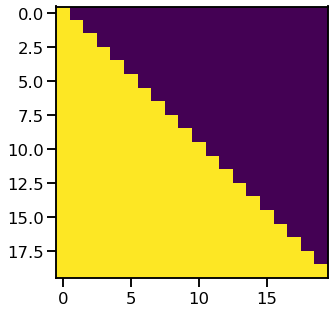

In [74]:
plt.figure(figsize=(5,5))
plt.imshow(subsequent_mask(20)[0])

## **6.8 마지막 Linear Layer와 Softmax Layer**

여러 개의 디코더를 거치고 나온 후에는 소수로 이루어진 벡터가 남습니다. 이를 단어로 바꾸기 위해 마지막으로 linear layer와 softmax를 거칩니다. 

linear layer는 FC 신경망으로 디코더가 마지막으로 출력한 벡터를 그보다 훨씬 더 큰 사이즈의 벡터인 logits 벡터로 투영시킵니다. 이때 logits 벡터의 크기는 우리가 가진 사전의 크기, 즉 모델이 학습한 단어의 총 개수가 됩니다. 각 인덱스마다 단어에 대한 점수가 매겨집니다.

이를 바탕으로 softmax를 통해 확률로 변환해주고 가장 높은 확률을 가진 단어를 출력하게 됩니다.

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_decoder_output_softmax.png">

## **6.9 전체적인 학습 과정**

트랜스포머에 대해 순차적으로 알아봤습니다. 이제 이를 어떻게 학습시키는지 알아보겠습니다.

### **1) Pre-processing**

먼저 학습 시작 전에 output vocabulary가 있어야 합니다. 6단어만 있다고 가정하겠습니다. 그리고 이 사전을 이용해 각 단어에 매칭되는 원-핫 벡터를 만들 수 있습니다. 

<img src = "https://nlpinkorean.github.io/images/transformer/one-hot-vocabulary-example.png">

### **2) Loss Function**

모델을 학습하는 가장 첫번째 단계라고 가정합시다. 그리고 학습을 위해 "merci"라는 프랑스어를 "thanks"로 번역하는 간단한 예시를 생각하겠습니다. 즉, 모델의 출력은 "thanks"라는 단어를 가리키는 확률 벡터라는 의미입니다. 그러나 모델이 학습되지 않았기에 출력이 제대로 나올 확률은 희박합니다.

<img src = "https://nlpinkorean.github.io/images/transformer/transformer_logits_output_and_label.png">

학습이 시작될 때, 모델의 parameter(가중치 행렬 등)이 무작위로 값이 부여되기에 그저 임의의 값만 출력할 뿐입니다. 이 출력된 값을 실제 값과 비교하면서 얻은 차이와 역전파 알고리즘을 이용해 현재 모델의 가중치들을 조절해 원하는 출력값에 가까워지도록 만듭니다. 

두 확률 벡터를 비교할 때는 cross-entropy나 Kullback-Leibler divergence를 이용합니다.

하지만 주의해야 할 것은 예제가 지나치게 단순하다는 것입니다. 현실적인 예제는 한 단어보다 긴 문장을 이용하겠습니다. 입력은 “je suis étudiant”이며 바라는 출력은 “i am a student”입니다. 

- 각 단어에 대한 확률 분포는 output vocabulary의 크기를 가집니다. 
- decoder가 첫번째로 출력하는 확률 분포는 "i"라는 단어와 연관이 있는 cell에 가장 높은 확률을 줘야 합니다.
- 두번째로 출력하는 확률 분포는 "am"이라는 단어와 연관이 있는 cell에 가장 높은 확률을 줘야 합니다.
- 이와 동일하게 마지막 "\<end of sentence>"를 나타내는 다섯번째 출력까지 이 과정은 반복됩니다. 
- 이때 \<eos> 또한 그에 해당하는 cell을 벡터에서 가집니다. 

<img src = "https://nlpinkorean.github.io/images/transformer/output_target_probability_distributions.png">

위 그림은 학습에서 목표로 하는 확률 분포를 나타낸 것입니다. 

모델을 큰 사이즈의 데이터 셋에서 충분히 학습시키고 나면, 그 결과로 생성되는 확률 분포들은 다음과 같아질 것입니다.

<img src = "https://nlpinkorean.github.io/images/transformer/output_trained_model_probability_distributions.png">

학습 과정 후, 모델은 정확한 번역을 출력할 것입니다. 

여기서 특이한 점 하나는 아무리 다른 단어들이 최종 출력될 확률이 거의 없다 해도 0보다는 조금 큰 값을 가진다는 것입니다. 이는 softmax layer의 유용한 성질입니다. 

모델은 한 스텝 당 확률이 가장 높은 단어 하나를 출력하기에 다른 단어는 버린다고 생각하기 쉽습니다. 그러나 그것은 `greedy decoding`이라는 한가지 방법에 불과하며 다른 방법들도 존재합니다. 예를 들어 가장 확률이 높은 두 개의 단어를 저장할 수 있습니다. (위 예시로 보자면 "i"와 "student") 그렇다면 우리는 모델을 두 번 돌리게 됩니다. 한 번은 출력이 'i'라고 가정하고 두번째는 출력이 'student'라고 가정하는 것입니다. 이렇게 나온 결과에서 첫번째 출력 단어와 두번째 출력 단어를 동시에 고려했을 때, 더 낮은 에러를 보이는 결과의 첫번째 단어가 실제 출력으로 선택됩니다. 이를 마지막 단계까지 반복합니다. 이러한 방법을 `beam search`라고 부르며, 고려하는 단어의 수를 beam size, 고려하는 미래 출력 개수를 top_beam이라고 합니다. 우리의 예제에서는 두 개의 단어를 저장했으므로 beam size는 2이며 두번째 단계까지 고려했으므로 top_beam 역시 2입니다. 이때 beam size와 top_beam은 우리가 지정할 수 있는 하이퍼파라미터입니다.

## **6.10 모델 구현**

## Reference

- https://wikidocs.net/31379
- http://nlp.seas.harvard.edu/2018/04/03/attention.html
- https://nlpinkorean.github.io/illustrated-transformer/

# **7. Tokenization**

Tokenization은 NLP 전처리에 해당하는 과정으로 text를 여러 개의 token으로 나누는 것을 말합니다. 어떤 기준으로 나누는지에 따라 크게 3개의 방법으로 나뉩니다.

## **7.1 Word-based Tokenizer**

![wbt](_image/4-7-1.PNG)

위 그림처럼 단어로 나누는 것이 Word-absed Tokenizer입니다. 영어의 경우, 띄어쓰기로 대부분 tokenization이 끝나기에 간단합니다. 

그러나 단어 기반의 tokenizer는 필연적으로 OOV(Out-of-Vocabulart) 문제를 가져옵니다. 이는 세상의 단어가 너무 많기에 그 단어를 모두 저장하고 임베딩하려면 전체 모델 메모리에서 차지하는 비중이 기하급수적으로(거의 90% 이상의) 증가하기에 정작 모델의 파라미터에 큰 비중을 쓰지 못합니다. 또한 아무리 많은 단어를 저장해도 세상의 모든 단어를 저장할 수 없다는 단점이 있습니다. 

단어를 줄인다 하여도 모르는 단어가 많아져 \<unk> 토큰이 많아지고 이는 성능의 저하로 이어집니다.

## **7.2 Chracter-based Tokenizer**

![cbt](_image/4-7-2.PNG)

이름 그대로 철자로 쪼개는 방식의 tokenizer입니다. 영어의 경우 알파벳, 한글의 경우 음절로 나누기에 워드 임베딩의 크기가 크게 줄어듭니다. 

그러나 철자 하나가 가져야하는 정보가 너무 많아지고 길이가 너무 길어지게 됩니다. 이는 필연적으로 성능 저하를 불러옵니다.

## **7.3 Subword-based Tokenizer**

위 두 가지 방법은 너무 뚜렷한 단점을 가지고 있습니다. 그렇기에 대부분 subword-based tokenizer를 많이 사용합니다.

![sbt](_image/4-7-3.PNG)

위 그림처럼 단어와 철자 사이의 subword를 토큰으로 사용합니다. 접두사, 접미사, 어근 등도 토큰으로 사용됩니다. 이를 기반으로 BPE, WordPiece, Unigram, SentencePiece 등이 있으며 현재는 WordPiece와 SentencePiece가 많이 쓰이는 추세입니다.

먼저 간단하게 살펴보겠습니다.

- BPE(Byte-pair Encoding): 통계적 방법, GPT 등이 이 방법을 사용
- WordPiece: BERT 등 트랜스포머 기반의 모델에서 사용, P('ug') / P('u' then 'g')와 같이 간단한 알고리즘은 공개되었으나 모든 알고리즘이 공개되어있지 않다.
- Unigram: 가장 많이 사용된 단어들과 substring들을 다듬으며 시작
- SentencePiece: 공백도 토큰으로 사용한다

## 실습1. Subword tokenization의 필요성

### **1) Intro**

In [15]:
import os, sys

# 데이터가 저장된 드라이브를 마운트하여 데이터를 불러올 수 있는 경로를 준비합니다.
#from google.colab import drive
#dirve.mount('/content/drive')

PATH = os.getcwd() # 현재 경로
PATH

'c:\\Users\\delphinus\\Desktop\\Workspace\\Python\\goorm\\AI기술 자연어 처리 전문가 양성 과정'

In [16]:
os.chdir(PATH)

- 이번 실습은 Subword tokenization의 필요성을 확인하는 것이 목적입니다.
- Subword tokenization 기반 language model을 구현하면서 이전 과제의 Word-level language model과 비교해보겠습니다.
- Subword-level language model을 구현하고, 주어진 데이터를 가공하여 모델을 학습한 후, 학습된 언어 모델을 이용해 문장을 생성합니다.

### **2) Subword tokenization이 필요한 이유**

word tokenization 코드를 불러와 subword의 필요성을 확인해보겠습니다.

In [17]:
from io import open
import torch

In [18]:
class Dictionary(object):
    def __init__(self):
        self.word2idx = {'<unk>': 0}
        self.idx2word = ['<unk>']
    
    def add_word(self, word):
        if word not in self.word2idx:
            self.idx2word.append(word)
            self.word2idx[word] = len(self.idx2word) - 1
        return self.word2idx[word]

    def __len__(self):
        return len(self.idx2word)

In [19]:
class Corpus(object):
    def __init__(self, path):
        self.dictionary = Dictionary()
        """Tokenizes a text file"""
        assert os.path.exists(path)
        
        # Add words to the dictionary
        with open(os.path.join(path, 'train.txt'), 'r', encoding="utf-8") as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    self.dictionary.add_word(word)
        
        self.train = self.tokenize(os.path.join(path, 'train.txt'))
        self.valid = self.tokenize(os.path.join(path, 'valid.txt'))
        self.test = self.tokenize(os.path.join(path, 'test.txt'))
    
    def tokenize(self, path):
        # Tokenize file content
        with open(path, 'r', encoding="utf8") as f:
            idss = []
            for line in f:
                words = line.split() + ['<eos>']
                ids = []
                for word in words:
                    try:
                        ids.append(self.dictionary.word2idx[word])
                    except:
                        print(word)
                        ids.append(0)
                idss.append(torch.tensor(ids).type(torch.int64))
            ids = torch.cat(idss)
        
        return ids

In [49]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

class RNNModel(nn.Module):
    """Container module with an encoder, a recurrent module and a decoder"""
    
    def __init__(self, rnn_type, ntoken, ninp, nhid, nlayers, dropout=0.5):
        super(RNNModel, self).__init__()
        self.ntoken = ntoken
        self.drop = nn.Dropout(dropout)
        self.encoder = nn.Embedding(ntoken, ninp)
        if rnn_type in ['LSTM', 'GRU']:
            self.rnn = getattr(nn, rnn_type)(ninp, nhid, nlayers, dropout=dropout)
        else:
            try:
                nonlinearity = {"RNN_TANH": "tanh", "RNN_RELU": "relu"}[rnn_type]
            except KeyError:
                raise ValueError("""An invalid option for '--model' was supplied,
                                options are ['LSTM', 'GRU', 'RNN_TANH' or 'RNN_RELU']""")
            self.rnn = nn.RNN(ninp, nhid, nlayers, nonlinearity=nonlinearity, dropout=dropout)
        self.decoder = nn.Linear(nhid, ntoken)
        
        self.init_weights()
        
        self.rnn_type = rnn_type
        self.nhid = nhid
        self.nlayers = nlayers
    
    def init_weights(self):
        initrange = 0.1
        nn.init.uniform_(self.encoder.weight, -initrange, initrange)
        nn.init.zeros_(self.decoder.weight)
        nn.init.uniform_(self.encoder.weight, -initrange, initrange)
    
    def forward(self, input, hidden):
        emb = self.drop(self.encoder(input))
        output, hidden = self.rnn(emb, hidden)
        output = self.drop(output)
        decoded = self.decoder(output)
        decoded = decoded.view(-1, self.ntoken)
        return F.log_softmax(decoded, dim=1), hidden
    
    def init_hidden(self, bsz):
        weight = next(self.parameters())
        if self.rnn_type == 'LSTM':
            return (weight.new_zeros(self.nlayers, bsz, self.nhid),
                    weight.new_zeros(self.nlayers, bsz, self.nhid))
        else:
            return weight.new_zeros(self.nlayers, bsz, self.nhid)

In [50]:
import time
import math
import os
import torch
import torch.nn as nn

import easydict
args = easydict.EasyDict({
    "data"    : './data/wikitext-2',    # location of the data corpus
    "model"   : 'RNN_TANH',             # type of recurrent net (RNN_TANH, RNN_RELU, LSTM, GRU)
    "emsize"  : 200,                    # size of word embeddings
    "nhid"    : 512,                    # number of hidden units per layer
    "nlayers" : 2,                      # number of layers
    "lr"      : 20,                     # initial learning rate
    "clip"    : 0.25,                   # gradient clipping
    "epochs"  : 6,                      # upper epoch limit
    "batch_size": 20,                   # batch size
    "bptt"    : 35,                     # sequence length
    "dropout" : 0.2,                    # dropout applied to layers (0 = no dropout)
    "seed"    : 1111,                   # random seed
    "cuda"    : False,                  # unuse CUDA
    "log_interval": 200,                # report interval
    "save"    : 'model.pt',             # path to save the final model
    "dry_run" : True,                   # verify the code and the model

})

# 디바이스 설정
device = torch.device("cuda" if args.cuda else "cpu")

train.txt의 문장들을 word tokenization 해보고 단어들의 개수를 세어보겠습니다.

In [23]:
corpus = Corpus('./data/wikitext-2')
ntokens = len(corpus.dictionary)
print(ntokens)

33278


이전 실습에 사용된 embedding dimension의 크기가 200이므로 word embedding에 사용된 parameter의 수는 33278 x 200 (= 6,655,600개)입니다.

그렇다면 RNN 모델에 사용되는 weight의 paramter 개수는 몇 개인지 간단한 함수를 이용해 확인해보겠습니다.

In [25]:
model = RNNModel(args.model, ntokens, args.emsize, args.nhid, args.nlayers, args.dropout)

In [26]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [27]:
print(f"Word embedding parameter 개수: {count_parameters(model.encoder)}")
print(f"RNN parameter 개수: {count_parameters(model.rnn)}")

Word embedding parameter 개수: 6655600
RNN parameter 개수: 890880


RNN parameter, Word embedding parameter 개수를 비교해보면 word embedding parameter의 개수가 RNN 모델의 paramter의 개수보다 압도적으로 많습니다. word embedding을 사용하는 경우 training에 사용되는 text file의 크기가 커질수록 word embedding paramter는 더 커지게 되고 전체 parameter 대비 word embedding이 차지하는 비중이 매우 커집니다. 

이런 paramter 비중의 비대칭성을 해결하기 위해 처음에는 charater-based tokenization 방법을 주목했습니다. 그러나 앞서 살펴봤듯, 여러 이유로 성능 저하를 보였고 subword를 사용하게 됩니다.

그럼 이제부터 BERT 모델에서 사용한 subword tokenization algorithm을 이용해 language modeling task를 수행해보겠습니다. subword tokenizer는 transformers 라이브러리를 통해 쉽게 불러올 수 있습니다.

In [28]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Downloading: 100%|██████████| 208k/208k [00:00<00:00, 350kB/s]  
Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 14.4kB/s]
Downloading: 100%|██████████| 426k/426k [00:01<00:00, 424kB/s]  
Downloading: 100%|██████████| 570/570 [00:00<00:00, 285kB/s]


In [29]:
# subword tokenization 예시
print(tokenizer.tokenize('Natural language expert training course'))
print(tokenizer.tokenize('Goorm X KAIST'))

['Natural', 'language', 'expert', 'training', 'course']
['Go', '##orm', 'X', 'K', '##A', '##IS', '##T']


In [51]:
class Corpus(object):
    def __init__(self, path):
        self.dictionary = Dictionary()
        self.train = self.tokenize(os.path.join(path, 'train.txt'))
        self.valid = self.tokenize(os.path.join(path, 'valid.txt'))
        self.test = self.tokenize(os.path.join(path, 'test.txt'))

    def tokenize(self, path):
        assert os.path.exists(path)
        # Add words to the dictionary
        with open(path, 'r', encoding="utf8") as f:
            for line in f:
                words = tokenizer.tokenize(line.strip()) + ['<eos>']
                for word in words:
                    self.dictionary.add_word(word)

        # Tokenize file content
        with open(path, 'r', encoding="utf8") as f:
            idss = []
            for line in f:
                words = tokenizer.tokenize(line.strip()) + ['<eos>']
                ids = []
                for word in words:
                    ids.append(self.dictionary.word2idx[word])
                idss.append(torch.tensor(ids).type(torch.int64))
            ids = torch.cat(idss)

        return ids

그러면 이제 모델을 다시 선언하고 paramter의 개수를 확인하겠습니다.

In [52]:
subword_corpus = Corpus('./data/wikitext-2')
ntokens = len(subword_corpus.dictionary)
subwordmodel = RNNModel(args.model, ntokens, args.emsize, args.nhid, args.nlayers, args.dropout)

In [53]:
print(f"Word embedding parameter 개수: {count_parameters(subwordmodel.encoder)}")
print(f"RNN parameter 개수: {count_parameters(subwordmodel.rnn)}")

Word embedding parameter 개수: 4619000
RNN parameter 개수: 890880


이전에 비해 embedding parameter 개수는 확연히 줄어들었습니다.   
6,655,600개 -> 4,619,000개

그러면 이제 subword 기반의 언어 모델 성능을 살펴보겠습니다.

In [54]:
###############################################################################
# Load data
###############################################################################

# Starting from sequential data, batchify arranges the dataset into columns.
# For instance, with the alphabet as the sequence and batch size 4, we'd get
# ┌ a g m s ┐
# │ b h n t │
# │ c i o u │
# │ d j p v │
# │ e k q w │
# └ f l r x ┘.
# These columns are treated as independent by the model, which means that the
# dependence of e. g. 'g' on 'f' can not be learned, but allows more efficient
# batch processing.

def batchify(data, bsz):
    # Work out how cleanly we can divide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data.narrow(0, 0, nbatch * bsz)
    # Evenly divide the data across the bsz batches.
    data = data.view(bsz, -1).t().contiguous()
    return data.to(device)

eval_batch_size = 10
train_data = batchify(subword_corpus.train, args.batch_size)
val_data = batchify(subword_corpus.valid, eval_batch_size)
test_data = batchify(subword_corpus.test, eval_batch_size)

In [55]:
###############################################################################
# Build the model
###############################################################################

model = RNNModel(args.model, ntokens, args.emsize, args.nhid, args.nlayers, args.dropout).to(device)
criterion = nn.NLLLoss()

In [56]:
###############################################################################
# Training code1 - define functions
###############################################################################

def repackage_hidden(h):
    """Wraps hidden states in new Tensors, to detach them from their history."""

    if isinstance(h, torch.Tensor):
        return h.detach()
    else:
        return tuple(repackage_hidden(v) for v in h)


# get_batch subdivides the source data into chunks of length args.bptt.
# If source is equal to the example output of the batchify function, with
# a bptt-limit of 2, we'd get the following two Variables for i = 0:
# ┌ a g m s ┐ ┌ b h n t ┐
# └ b h n t ┘ └ c i o u ┘
# Note that despite the name of the function, the subdivison of data is not
# done along the batch dimension (i.e. dimension 1), since that was handled
# by the batchify function. The chunks are along dimension 0, corresponding
# to the seq_len dimension in the LSTM.

def get_batch(source, i):
    seq_len = min(args.bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].view(-1)
    return data, target


def evaluate(data_source):
    # Turn on evaluation mode which disables dropout.
    model.eval()
    total_loss = 0.
    ntokens = len(subword_corpus.dictionary)
    hidden = model.init_hidden(eval_batch_size)
    with torch.no_grad():
        for i in range(0, data_source.size(0) - 1, args.bptt):
            data, targets = get_batch(data_source, i)
            output, hidden = model(data, hidden)
            hidden = repackage_hidden(hidden)
            total_loss += len(data) * criterion(output, targets).item()
    return total_loss / (len(data_source) - 1)


def train():
    # Turn on training mode which enables dropout.
    model.train()
    total_loss = 0.
    start_time = time.time()
    ntokens = len(subword_corpus.dictionary)
    hidden = model.init_hidden(args.batch_size)
    for batch, i in enumerate(range(0, train_data.size(0) - 1, args.bptt)):
        data, targets = get_batch(train_data, i)
        # Starting each batch, we detach the hidden state from how it was previously produced.
        # If we didn't, the model would try backpropagating all the way to start of the dataset.
        model.zero_grad()

        hidden = repackage_hidden(hidden)
        output, hidden = model(data, hidden)

        loss = criterion(output, targets)
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        for p in model.parameters():
            p.data.add_(p.grad, alpha=-lr)

        total_loss += loss.item()

        if batch % args.log_interval == 0 and batch > 0:
            cur_loss = total_loss / args.log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | lr {:02.2f} | ms/batch {:5.2f} | '
                    'loss {:5.2f} | ppl {:8.2f}'.format(
                epoch, batch, len(train_data) // args.bptt, lr,
                elapsed * 1000 / args.log_interval, cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()
        if args.dry_run:
            break

In [57]:
###############################################################################
# Training code2 - run 
###############################################################################

# Loop over epochs.
lr = args.lr
best_val_loss = None

# At any point you can hit Ctrl + C to break out of training early.
try:
    for epoch in range(1, args.epochs+1):
        epoch_start_time = time.time()
        train()
        val_loss = evaluate(val_data)
        print('-' * 89)
        print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
                'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                            val_loss, math.exp(val_loss)))
        print('-' * 89)
        # Save the model if the validation loss is the best we've seen so far.
        if not best_val_loss or val_loss < best_val_loss:
            with open(args.save, 'wb') as f:
                torch.save(model, f)
            best_val_loss = val_loss
        else:
            # Anneal the learning rate if no improvement has been seen in the validation dataset.
            lr /= 4.0
except KeyboardInterrupt:
    print('-' * 89)
    print('Exiting from training early')

# Load the best saved model.
with open(args.save, 'rb') as f:
    model = torch.load(f)
    # after load the rnn params are not a continuous chunk of memory
    # this makes them a continuous chunk, and will speed up forward pass
    # Currently, only rnn model supports flatten_parameters function.
    if args.model in ['RNN_TANH', 'RNN_RELU', 'LSTM', 'GRU']:
        model.rnn.flatten_parameters()

# Run on test data.
test_loss = evaluate(test_data)
print('=' * 89)
print('| End of training | test loss {:5.2f} | test ppl {:8.2f}'.format(
    test_loss, math.exp(test_loss)))
print('=' * 89)

-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 254.02s | valid loss  9.37 | valid ppl 11752.85
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
| end of epoch   2 | time: 184.04s | valid loss 14.65 | valid ppl 2314637.74
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
| end of epoch   3 | time: 190.28s | valid loss 10.87 | valid ppl 52374.79
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
| end of epoch   4 | time: 182.13s | valid loss  9.01 | valid ppl  8167.95
--------------------------------------------------------------------

### **3) 학습한 언어 모델로 문장 생성**

- 학습이 완료된 모델을 불러와 임의의 한 단어를 입력으로 넣어준 후, 정해진 개수의 단어를 생성합니다.
- 생성한 문장을 decode하여 generate.txt 파일에 저장합니다.

In [60]:
###############################################################################
# Language Modeling on Wikitext-2
#
# This file generates new sentences sampled from the language model
#
###############################################################################

import torch

# Model parameters.
test_args = easydict.EasyDict({
    "data"      : './data/wikitext-2',  # location of data corpus
    "checkpoint": './model.pt',         # model checkpoint to use
    "outf"      : 'generate.txt',       # output file for generated text
    "words"     : 1000,                 # number of words to generate
    "seed"      : 1111,                 # random seed
    "cuda"      : False,                # unuse CUDA
    "temperature": 1.0,                 # temperature - higher will increase diversity
    "log_interval": 100                 # reporting interval
})

# Set the random seed manually for reproducibility.
torch.manual_seed(test_args.seed)
if torch.cuda.is_available():
    if not test_args.cuda:
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")

device = torch.device("cuda" if test_args.cuda else "cpu")

if test_args.temperature < 1e-3:
    parser.error("--temperature has to be greater or equal 1e-3")

with open(test_args.checkpoint, 'rb') as f:
    model = torch.load(f).to(device)
model.eval()

# corpus = Corpus(test_args.data)
# ntokens = len(subword_corpus.dictionary)

hidden = model.init_hidden(1)
input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)

with open(test_args.outf, 'w', encoding="UTF-8") as outf:
    with torch.no_grad():  # no tracking history
        for i in range(test_args.words):
            output, hidden = model(input, hidden)
            word_weights = output.squeeze().div(test_args.temperature).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0]
            input.fill_(word_idx)

            word = subword_corpus.dictionary.idx2word[word_idx]

            outf.write(word + ('\n' if i % 20 == 19 else ' '))

            if i % test_args.log_interval == 0:
                print('| Generated {}/{} words'.format(i, test_args.words))

| Generated 0/1000 words
| Generated 100/1000 words
| Generated 200/1000 words
| Generated 300/1000 words
| Generated 400/1000 words
| Generated 500/1000 words
| Generated 600/1000 words
| Generated 700/1000 words
| Generated 800/1000 words
| Generated 900/1000 words


## Reference
[Pytorch Language Model](https://github.com/pytorch/examples/tree/master/word_language_model)

# **8. Byte-Pair Encoding**

## **8.1 BPE 알고리즘**

BPE 알고리즘은 1994년에 제안된 데이터 압축 알고리즘입니다. 이를 후에 자연어 처리의 서브워드 분리 알고리즘으로 응용한 것입니다. 자연어 처리에서 사용되는 것을 알아보기 전에 먼저 기존의 BPE 작동 방법을 알아보겠습니다. 

> aaabdaaabac

위와 같은 문자열이 주어졌습니다. 이때 BPE는 연속적으로 가장 많이 등장한 글자의 쌍을 찾아서 하나의 글자로 병합하는 방식을 수행합니다. 위 문자에서 가장 많이 등장한 문자의 쌍은 'aa'입니다. 이를 'Z'로 치환하겠습니다.

> ZabdZabac  
> Z = aa  

치환 후, 가장 많이 등장하는 문자의 쌍은 'ab'입니다. 'ab'는 'Y'로 치환하겠습니다.

> ZYdZYac  
> Y = ab  
> Z = aa  

이번엔 'ZY'가 가장 많이 나타납니다. 이를 'X'로 치환하겠습니다.

> XdXac  
> X = ZY  
> Y = ab  
> Z = aa  

이제 더이상 병합할 것이 없습니다. 그렇기에 위 결과를 최종 결과로 출력합니다.

## **8.2 자연어 처리에서의 BPE**

[자연어 처리에서의 BPE](https://arxiv.org/abs/1508.07909)는 subword-based tokenizer의 일종으로 글자 단위에서 점차적으로 단어 집합을 만들어내는 bottom up 방식을 사용합니다. 우선 훈련 데이터에 있는 단어들을 모든 글자 또는 유니코드 단위로 단어 집합을 만들고 가장 많이 등장하는 유니그램을 하나의 유니그램으로 통합합니다. 

논문에서 나오는 코드를 조금 수정한 코드로 동작하는 과정을 알아보겠습니다.

In [9]:
import re, collections
from IPython.display import display, Markdown, Latex

num_merges = 10
dictionary = {'l o w </w>' : 5,
        'l o w e r </w>' : 2,
        'n e w e s t </w>':6,
        'w i d e s t </w>':3
        }

def get_stats(dictionary):
    # 유니그램의 pair들의 빈도수를 카운트
    pairs = collections.defaultdict(int)
    for word, freq in dictionary.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    print('현재 pair들의 빈도수 :', dict(pairs))
    return pairs

def merge_dictionary(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

bpe_codes = {}
bpe_codes_reverse = {}

for i in range(num_merges):
    display(Markdown("### Iteration {}".format(i + 1)))
    pairs = get_stats(dictionary)
    best = max(pairs, key=pairs.get)
    dictionary = merge_dictionary(best, dictionary)

    bpe_codes[best] = i
    bpe_codes_reverse[best[0] + best[1]] = best

    print("new merge: {}".format(best))
    print("dictionary: {}".format(dictionary))

### Iteration 1

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


### Iteration 2

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


### Iteration 3

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 4

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('l', 'o')
dictionary: {'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 5

현재 pair들의 빈도수 : {('lo', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('lo', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 6

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('n', 'e')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}


### Iteration 7

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('ne', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('ne', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'new est</w>': 6, 'w i d est</w>': 3}


### Iteration 8

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('new', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('new', 'est</w>')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 9

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('low', '</w>')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 10

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('w', 'i')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}


vocab은 나오는 단어들을 키, 출현 빈도수를 값으로 가지는 사전입니다. 처음 입력되는 단어들은 모두 철자입니다. `get_stats`함수를 거치면서 앞뒤로 근접한 한 쌍의 단어들의 조합 빈도수가 저장된 pairs을 리턴합니다. 예를 들어 [l o w </w>]가 들어가면 [lo], [ow], [w</w>]의 빈도수가 각각 저장되는 것입니다. 이렇게 리턴된 pairs에서 빈도수가 가장 높은 것을 `merge_dictionary`을 통해 vocab에 저장합니다. 그리고 이를 num_merges만큼 반복하는 것입니다. 

위 출력은 매 iteration마다 합쳐진 단어들이고 마지막은 최종 vocab입니다. 

<img src = "https://wikidocs.net/images/page/22592/%EA%B7%B8%EB%A6%BC.png">

위 그림은 BPE는 OOV의 문제를 해결하는 동작 과정입니다. 모르는 단어 'lowest'가 들어왔을 때, vocab 안에 있는 두 토큰의 합으로 표현한 것을 알 수 있습니다. 이 역시 코드로 구현해보겠습니다.

In [12]:
def get_pairs(word):
    """
    Return set of symbol pairs in a word.
    Word is represented as a tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def encode(orig):
    """Encode word based on list of BPE merge operations, which are applied consecutively"""

    word = tuple(orig) + ('</w>',)
    display(Markdown("__word split into characters:__ <tt>{}</tt>".format(word)))

    pairs = get_pairs(word)    

    if not pairs:
        return orig

    iteration = 0
    while True:
        iteration += 1
        display(Markdown("__Iteration {}:__".format(iteration)))

        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
        print("candidate for merging: {}".format(bigram))
        if bigram not in bpe_codes:
            display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
            break
        first, second = bigram
        new_word = []
        i = 0
        while i < len(word):
            try:
                j = word.index(first, i)
                new_word.extend(word[i:j])
                i = j
            except:
                new_word.extend(word[i:])
                break

            if word[i] == first and i < len(word)-1 and word[i+1] == second:
                new_word.append(first+second)
                i += 2
            else:
                new_word.append(word[i])
                i += 1
        new_word = tuple(new_word)
        word = new_word
        print("word after merging: {}".format(word))
        if len(word) == 1:
            break
        else:
            pairs = get_pairs(word)

    # 특별 토큰인 </w>는 출력하지 않는다.
    if word[-1] == '</w>':
        word = word[:-1]
    elif word[-1].endswith('</w>'):
        word = word[:-1] + (word[-1].replace('</w>',''),)

    return word

In [13]:
encode("loki")

__word split into characters:__ <tt>('l', 'o', 'k', 'i', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('i', '</w>'), ('o', 'k'), ('k', 'i'), ('l', 'o')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'k', 'i', '</w>')


__Iteration 2:__

bigrams in the word: {('i', '</w>'), ('lo', 'k'), ('k', 'i')}
candidate for merging: ('i', '</w>')


__Candidate not in BPE merges, algorithm stops.__

('lo', 'k', 'i')

In [14]:
encode("lowest")

__word split into characters:__ <tt>('l', 'o', 'w', 'e', 's', 't', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('e', 's'), ('o', 'w'), ('s', 't'), ('w', 'e'), ('t', '</w>'), ('l', 'o')}
candidate for merging: ('e', 's')
word after merging: ('l', 'o', 'w', 'es', 't', '</w>')


__Iteration 2:__

bigrams in the word: {('o', 'w'), ('w', 'es'), ('es', 't'), ('t', '</w>'), ('l', 'o')}
candidate for merging: ('es', 't')
word after merging: ('l', 'o', 'w', 'est', '</w>')


__Iteration 3:__

bigrams in the word: {('o', 'w'), ('w', 'est'), ('l', 'o'), ('est', '</w>')}
candidate for merging: ('est', '</w>')
word after merging: ('l', 'o', 'w', 'est</w>')


__Iteration 4:__

bigrams in the word: {('o', 'w'), ('w', 'est</w>'), ('l', 'o')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'est</w>')


__Iteration 5:__

bigrams in the word: {('lo', 'w'), ('w', 'est</w>')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'est</w>')


__Iteration 6:__

bigrams in the word: {('low', 'est</w>')}
candidate for merging: ('low', 'est</w>')


__Candidate not in BPE merges, algorithm stops.__

('low', 'est')

간단하게 BPT에 대해 보았습니다. BPT를 사용한 대표적인 모델인 GPT 등에 대해선 이후 챕터에서 살펴보겠습니다.

## **8.3 Issue**

BPE에 여러 트릭을 이용해 성능을 개선하는 방법을 적용하고 있습니다. 예를 들어 첫 시작으로 철자 단위로 나눌 때, 공백 역시 '_' 등의 문자로 치환하여 함께 토큰화 시키는 방법이 있습니다. 

또한 "학교에"라는 단어가 들어왔고 사전에 [학교, 교에, 학, 교, 에]가 있다면 어떻게 토큰화할 것인지에 대한 방법론도 있습니다. 생각만 해보면 [학, 교에], [학교, 에], [학, 교, 에] 세 가지 방법으로 토큰화시킬 수 있습니다. 마지막 방법은 토큰화의 의미가 없으니 제외하고 나머지 두 개만 살펴보겠습니다.

먼저 오른쪽으로부터 탐색하는 방법입니다. 가장 오른쪽인 '에'를 보고 사전에 존재하면 이어서 '교에'를 확인합니다. 이 또한 존재하면 '학교에'를 확인합니다. 이런식으로 공백이 나올때까지 쭉 이어집니다. 위같은 예시라면 [학, 교에]라는 결과를 출력할 것입니다. 

위와 반대로 왼쪽부터 탐색하는 방법도 있습니다. 그렇다면 [학교, 에]라는 결과를 출력할 것입니다. 대체적으로 왼쪽부터 탐색하는 방법을 사용하고 있습니다.

##  **Reference**

https://wikidocs.net/22592

# **9.**